# 🚪 Configuração do Ambiente no Google Colab

### 🤖Montando Driver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 👾Instalar a biblioteca tmdbv3api

In [ ]:
pip install tmdbv3api

# 💭Carregamento e Exploração Inicial dos Dados (CSV)

In [ ]:
import pandas as pd

# Caminho para o seu arquivo CSV no Google Drive /Zuum Notebooks/Analise Oscar/Dataset/Dataset_Add.csv
caminho_csv = '\Dataset\Dataset_ADD.csv'

# Tente carregar o CSV especificando o separador como ponto e vírgula
try:
    df_brasileiros_inicial = pd.read_csv(caminho_csv, sep=';') # <<< ADICIONE sep=';' AQUI
    print("Arquivo CSV carregado com sucesso!")
    print("Primeiras linhas do seu CSV:")
    print(df_brasileiros_inicial.head()) # Mostra as 5 primeiras linhas
    print("\nInformações sobre as colunas:")
    df_brasileiros_inicial.info() # Mostra os tipos de dados e valores não nulos
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em {caminho_csv}")
    print("Verifique o caminho e o nome do arquivo.")
except pd.errors.ParserError as pe:
    print(f"Erro de parsing ao carregar o CSV: {pe}")
    print("Isso pode acontecer se o número de colunas variar entre as linhas, mesmo com o separador correto.")
    print("Verifique a linha mencionada no erro (se houver) no seu arquivo CSV original.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o CSV: {e}")

Arquivo CSV carregado com sucesso!
Primeiras linhas do seu CSV:
   id                                              title  cinematografia_num  \
0 NaN                             O Pagador de Promessas                 9.5   
1 NaN        Divorzio all'italiana (Divórcio à Italiana)                 9.0   
2 NaN  Les dimanches de Ville d'Avray (Sinfonia de um...                 8.5   
3 NaN                                  Elektra (Electra)                 8.5   
4 NaN                                           Tlayucan                 8.0   

   narrativa_impact_num  reconhe_buzz_num  marketing_num  elegibilidade_num  \
0                   9.5              10.0            8.5                9.0   
1                   9.0               9.5            9.0                9.5   
2                   8.8               9.0            8.5                9.0   
3                   8.8               8.0            7.5                8.5   
4                   8.5               7.0            7.0    

# 📦Coleta de Dados Adicionais com a API do TMDB

In [ ]:
from tmdbv3api import TMDb, Movie
import time # Para adicionar pausas e evitar sobrecarregar a API

tmdb = TMDb()
# Sua chave da API (API Key)
tmdb.api_key = '5968e0e2ae961359489ef818f486a395'
tmdb.language = 'pt-BR' # Definir o idioma para português do Brasil

movie_api = Movie()

# 🎞️Foco na Lista Específica de Filmes e Coleta de Dados do TMDB via ID

In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie
import time

# --- Bloco de Configuração da API (IMPORTANTE REEXECUTAR SE FOR UMA NOVA SESSÃO) ---
tmdb_api = TMDb()
tmdb_api.api_key = '5968e0e2ae961359489ef818f486a395' # Sua chave da API
tmdb_api.language = 'pt-BR'
movie_api = Movie()
print("Configuração da API TMDB realizada/verificada.")
# --- Fim do Bloco de Configuração da API ---

# SUA NOVA LISTA VALIDADA DE IDs e títulos de referência:
filmes_selecionados_data = {
    'id_tmdb_fornecido': [
        59990, 43001, 47447, 194163, 67617, 880, 27098, 124617, 37975,
        21253, 17139, 312, 92603, 46187, 666, 637, 69851, 21334,
        223706, 150540, 291270, 263109, 242828, 1000837, 1232827,
        974950, 1278263, 823219
    ],
    'titulo_referencia': [ # Estes títulos são apenas para nossa referência ao ver a lista
        "O Pagador de Promessas", "Les dimanches de Ville d'Avray (Sinfonia de um Amor)",
        "Elektra (Electra)", "Tlayucan", "O Quatrilho",
        "A Excêntrica Família de Antônia", "All Things Fair", "Dust of Life",
        "O Homem das Estrelas", "O Que É Isso, Companheiro?", "Caráter (Karakter)",
        "A Música e o Silêncio (Jenseits der Stille)", "Segredos do Coração (Secretos del corazón)",
        "O Ladrão (Vor)", "Central do Brasil", "A Vida é Bela (La vita è bella)",
        "O Avô (El abuelo)", "Filhos do Céu (Bacheha-ye âsmân)", "O Menino e o Mundo",
        "Divertida Mente (Inside Out)", "Anomalisa", "Shaun, o Carneiro: O Filme (Shaun the Sheep Movie)",
        "As Memórias de Marnie (Omoide no Marnie)", "Ainda Estou Aqui (2024)",
        "The Girl With The Needle (2024)", "Emilia Pérez (2024)",
        "The Seed of the Sacred Fig (2024)", "Flow (2024)"

    ]
}

# Verificação rápida do alinhamento das listas
if len(filmes_selecionados_data['id_tmdb_fornecido']) != len(filmes_selecionados_data['titulo_referencia']):
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!! ATENÇÃO: O número de IDs não bate com o número de títulos de referência !!!")
    print(f"!!! IDs fornecidos: {len(filmes_selecionados_data['id_tmdb_fornecido'])}")
    print(f"!!! Títulos de referência: {len(filmes_selecionados_data['titulo_referencia'])}")
    print("!!! Por favor, corrija o dicionário 'filmes_selecionados_data' para que as listas tenham o mesmo tamanho.")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    # Interromper a execução ou tratar o erro como preferir, aqui estou apenas imprimindo um aviso.
    # Você pode querer adicionar um 'raise ValueError("Listas desalinhadas")' aqui.
else:
    print("Listas de IDs e títulos de referência parecem alinhadas. Prosseguindo.")


df_filmes_base = pd.DataFrame(filmes_selecionados_data)
print("\nUsando a SEGUINTE LISTA (SUA NOVA LISTA VALIDADA) de IDs para buscar detalhes no TMDB:")
print(df_filmes_base)

# Função para buscar detalhes do filme no TMDB usando o ID (mesma função robusta de antes)
def buscar_detalhes_por_id_tmdb(id_filme_tmdb, titulo_ref=""):
    try:
        detalhes_filme = movie_api.details(id_filme_tmdb) # Busca direta pelo ID
        if detalhes_filme:
            diretores = []
            # Adicionando verificação se 'credits' existe antes de tentar acessar 'crew'
            if hasattr(detalhes_filme, 'credits') and isinstance(detalhes_filme.credits, dict) and 'crew' in detalhes_filme.credits:
                diretores = [crew_member['name'] for crew_member in detalhes_filme.credits['crew'] if crew_member['job'] == 'Director']

            paises_producao = []
            if hasattr(detalhes_filme, 'production_countries'):
                paises_producao = [country['iso_3166_1'] for country in detalhes_filme.production_countries]

            generos_filme = []
            if hasattr(detalhes_filme, 'genres'):
                generos_filme = [genre['name'] for genre in detalhes_filme.genres]

            empresas_producao = []
            if hasattr(detalhes_filme, 'production_companies'):
                empresas_producao = [company['name'] for company in detalhes_filme.production_companies]

            elenco_principal = []
            # Adicionando verificação se 'credits' existe antes de tentar acessar 'cast'
            if hasattr(detalhes_filme, 'credits') and isinstance(detalhes_filme.credits, dict) and 'cast' in detalhes_filme.credits:
                elenco_principal = [cast_member['name'] for cast_member in detalhes_filme.credits['cast'][:5]]

            return {
                'id_tmdb': detalhes_filme.id,
                'titulo_tmdb': detalhes_filme.title,
                'titulo_original_tmdb': detalhes_filme.original_title,
                'sinopse': getattr(detalhes_filme, 'overview', ''),
                'data_lancamento': getattr(detalhes_filme, 'release_date', None),
                'generos': generos_filme,
                'orcamento': getattr(detalhes_filme, 'budget', 0),
                'receita': getattr(detalhes_filme, 'revenue', 0),
                'popularidade': getattr(detalhes_filme, 'popularity', 0),
                'media_votos': getattr(detalhes_filme, 'vote_average', 0),
                'total_votos': getattr(detalhes_filme, 'vote_count', 0),
                'idioma_original': getattr(detalhes_filme, 'original_language', ''),
                'paises_producao': paises_producao,
                'empresas_producao': empresas_producao,
                'duracao_min': getattr(detalhes_filme, 'runtime', 0),
                'diretores': diretores,
                'elenco_principal': elenco_principal,
                'tagline': getattr(detalhes_filme, 'tagline', '')
            }
        else:
            print(f"ID TMDB '{id_filme_tmdb}' (Ref: {titulo_ref}) não retornou detalhes.")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f'FALHA NA BUSCA ID {id_filme_tmdb}', 'titulo_original_tmdb': titulo_ref}
    except Exception as e:
        print(f"Erro ao buscar detalhes para ID TMDB '{id_filme_tmdb}' (Ref: {titulo_ref}): {e}")
        return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f'ERRO NA BUSCA ID {id_filme_tmdb}', 'titulo_original_tmdb': titulo_ref, 'erro_msg': str(e)}

# Buscar dados para cada filme da lista selecionada usando os IDs fornecidos
if len(filmes_selecionados_data['id_tmdb_fornecido']) == len(filmes_selecionados_data['titulo_referencia']):
    dados_tmdb_lista_final = []
    for index, linha in df_filmes_base.iterrows():
        id_filme = linha['id_tmdb_fornecido']
        titulo_ref = linha['titulo_referencia']
        print(f"Buscando dados para o filme ID: {id_filme} (Referência: {titulo_ref})...")
        dados_filme = buscar_detalhes_por_id_tmdb(id_filme, titulo_ref)
        dados_tmdb_lista_final.append(dados_filme)
        time.sleep(0.3) # Pausa para não sobrecarregar a API

    # Criar o DataFrame principal para análise com os filmes selecionados
    df_filmes_analise = pd.DataFrame(dados_tmdb_lista_final)

    print("\nDataFrame 'df_filmes_analise' CRIADO COM A SUA NOVA LISTA DE IDs:")
    if not df_filmes_analise.empty:
        df_filmes_analise.info()
        print(df_filmes_analise[['id_tmdb', 'titulo_tmdb', 'titulo_original_tmdb', 'data_lancamento']].head())

        # Verificar se houve falhas
        falhas = df_filmes_analise[df_filmes_analise['titulo_tmdb'].str.contains("FALHA NA BUSCA|ERRO NA BUSCA", na=False)]
        if not falhas.empty:
            print("\n--- ATENÇÃO: Houve falhas ao buscar detalhes para alguns IDs (VERIFIQUE SE ESSES IDs ESTÃO CORRETOS) ---")
            print(falhas[['id_tmdb', 'titulo_tmdb', 'titulo_original_tmdb']])
        else:
            print("\nTodos os IDs da sua nova lista foram processados para buscar detalhes.")
    else:
        print("O DataFrame df_filmes_analise está vazio. Verifique os passos anteriores.")


else:
    print("A busca não foi iniciada devido ao desalinhamento entre a lista de IDs e títulos. Por favor, corrija.")

Configuração da API TMDB realizada/verificada.
Listas de IDs e títulos de referência parecem alinhadas. Prosseguindo.

Usando a SEGUINTE LISTA (SUA NOVA LISTA VALIDADA) de IDs para buscar detalhes no TMDB:
    id_tmdb_fornecido                                  titulo_referencia
0               59990                             O Pagador de Promessas
1               43001  Les dimanches de Ville d'Avray (Sinfonia de um...
2               47447                                  Elektra (Electra)
3              194163                                           Tlayucan
4               67617                                        O Quatrilho
5                 880                    A Excêntrica Família de Antônia
6               27098                                    All Things Fair
7              124617                                       Dust of Life
8               37975                               O Homem das Estrelas
9               21253                         O Que É Isso, Comp

# 🧹Faxina de Dados:

In [ ]:
# df_filmes_analise já deve existir da célula anterior com os dados dos 28 filmes.
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- Iniciando Passo 4: Limpeza e Preparação dos Dados ---")

    # 1. Converter 'data_lancamento' para datetime e extrair o ano
    #    Verificar se a coluna existe e não está vazia antes de converter
    if 'data_lancamento' in df_filmes_analise.columns and df_filmes_analise['data_lancamento'].notna().any():
        df_filmes_analise['data_lancamento'] = pd.to_datetime(df_filmes_analise['data_lancamento'], errors='coerce')
        df_filmes_analise['ano_lancamento'] = df_filmes_analise['data_lancamento'].dt.year
        # Para anos que não puderam ser convertidos (NaT), preencher com 0 ou outra estratégia
        df_filmes_analise['ano_lancamento'].fillna(0, inplace=True)
        df_filmes_analise['ano_lancamento'] = df_filmes_analise['ano_lancamento'].astype(int)

    else:
        print("Coluna 'data_lancamento' não encontrada ou vazia. Pulando extração de ano.")
        if 'ano_lancamento' not in df_filmes_analise.columns: # Evitar criar coluna se já existir
             df_filmes_analise['ano_lancamento'] = 0 # Criar com valor padrão se não existir

    # 2. Colunas numéricas como 'orcamento', 'receita', 'duracao_min'
    #    A função de busca já definiu 0 para orcamento/receita/duracao_min se não encontrados.
    #    Vamos garantir que são do tipo numérico correto (int ou float).
    cols_to_numeric = ['orcamento', 'receita', 'duracao_min', 'popularidade', 'media_votos', 'total_votos']
    for col in cols_to_numeric:
        if col in df_filmes_analise.columns:
            df_filmes_analise[col] = pd.to_numeric(df_filmes_analise[col], errors='coerce').fillna(0)
        else:
            print(f"Coluna '{col}' não encontrada no DataFrame. Será criada com valor padrão 0.")
            df_filmes_analise[col] = 0 # Cria a coluna com 0 se não existir


    # 3. Criar coluna 'eh_brasileiro'
    #    A API retorna os códigos dos países de produção (ex: 'BR', 'US', 'FR') na coluna 'paises_producao'
    #    Verificar se a coluna existe e não está vazia
    if 'paises_producao' in df_filmes_analise.columns and df_filmes_analise['paises_producao'].notna().any():
        # A coluna 'paises_producao' contém listas. Verificamos se 'BR' está na lista.
        df_filmes_analise['eh_brasileiro'] = df_filmes_analise['paises_producao'].apply(
            lambda x: 'BR' in x if isinstance(x, list) and x else False
        )
    else:
        print("Coluna 'paises_producao' não encontrada ou vazia. Pulando criação de 'eh_brasileiro'.")
        if 'eh_brasileiro' not in df_filmes_analise.columns:
            df_filmes_analise['eh_brasileiro'] = False # Criar com valor padrão se não existir

    print("\nInformações do DataFrame após limpeza e preparação:")
    df_filmes_analise.info()

    print("\nPrimeiras linhas do DataFrame 'df_filmes_analise' limpo e preparado (colunas selecionadas):")
    colunas_preview = ['id_tmdb', 'titulo_tmdb', 'ano_lancamento', 'orcamento', 'receita', 'media_votos', 'eh_brasileiro', 'paises_producao', 'generos']
    colunas_preview_existentes = [col for col in colunas_preview if col in df_filmes_analise.columns]
    print(df_filmes_analise[colunas_preview_existentes].head())

    # Contagem de filmes brasileiros e estrangeiros na sua lista
    if 'eh_brasileiro' in df_filmes_analise.columns:
      print("\nContagem de filmes brasileiros vs. estrangeiros na sua lista selecionada:")
      print(df_filmes_analise['eh_brasileiro'].value_counts())

    # Salvar o DataFrame limpo para um novo CSV (opcional, mas recomendado)
    try:
        caminho_csv_limpo = 'Dataset\Dataset_Oscar_Filmes_Limp_Analis.csv'
        df_filmes_analise.to_csv(caminho_csv_limpo, index=False, sep=';')
        print(f"\nDataFrame limpo e preparado foi salvo em: {caminho_csv_limpo}")
    except Exception as e:
        print(f"\nErro ao tentar salvar o DataFrame limpo: {e}")
        print("Certifique-se de que seu Google Drive está montado e o caminho está correto.")

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute a célula anterior para buscar os dados primeiro.")

--- Iniciando Passo 4: Limpeza e Preparação dos Dados ---

Informações do DataFrame após limpeza e preparação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_tmdb               28 non-null     int64         
 1   titulo_tmdb           28 non-null     object        
 2   titulo_original_tmdb  28 non-null     object        
 3   sinopse               28 non-null     object        
 4   data_lancamento       28 non-null     datetime64[ns]
 5   generos               28 non-null     object        
 6   orcamento             28 non-null     int64         
 7   receita               28 non-null     int64         
 8   popularidade          28 non-null     float64       
 9   media_votos           28 non-null     float64       
 10  total_votos           28 non-null     int64         
 11  idioma_original       28 no

<ipython-input-8-f858adbb5aa2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filmes_analise['ano_lancamento'].fillna(0, inplace=True)


# ✔️Instalando (ou garantindo que estão instaladas) as bibliotecas de visualização

--- Iniciando Passo 5: Análise Exploratória dos Dados (EDA) ---


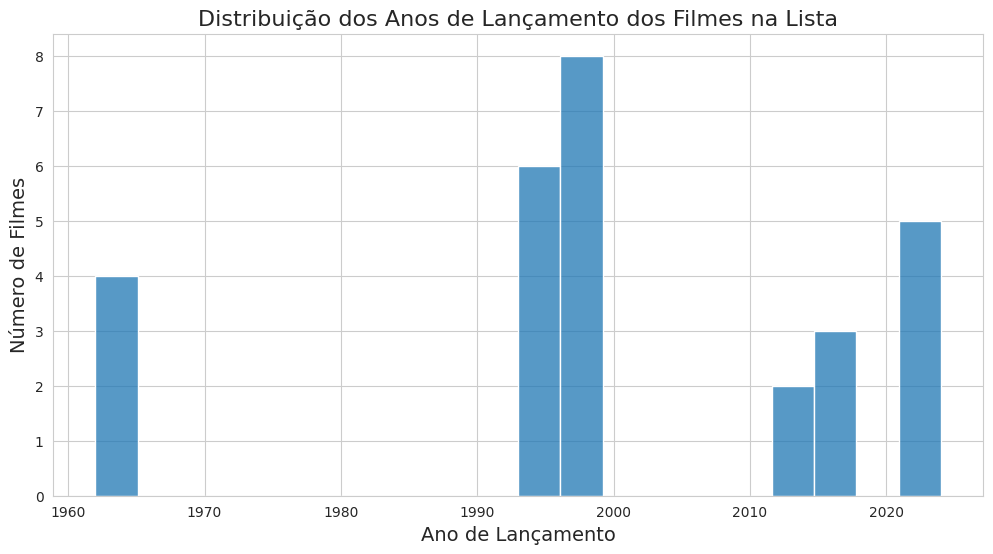

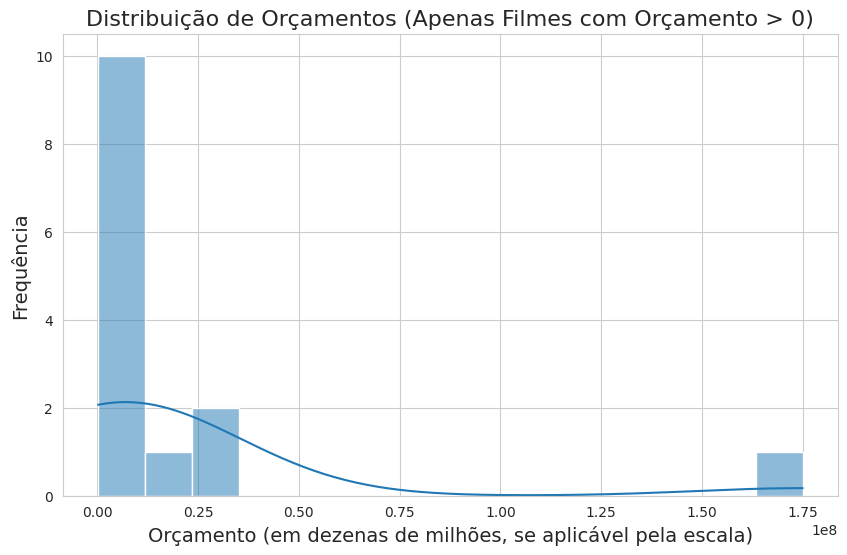

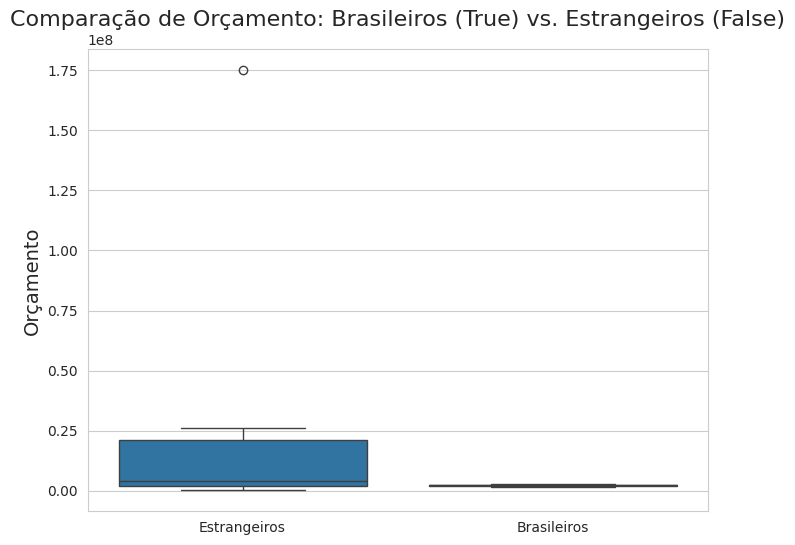

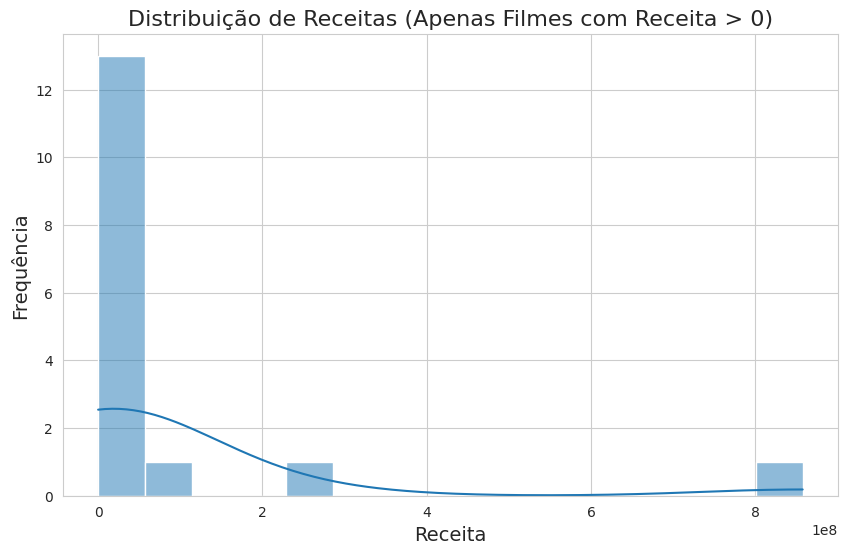

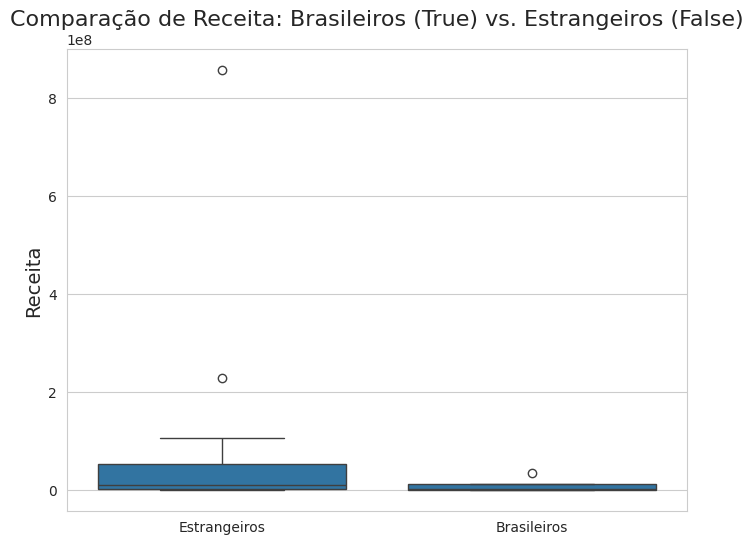

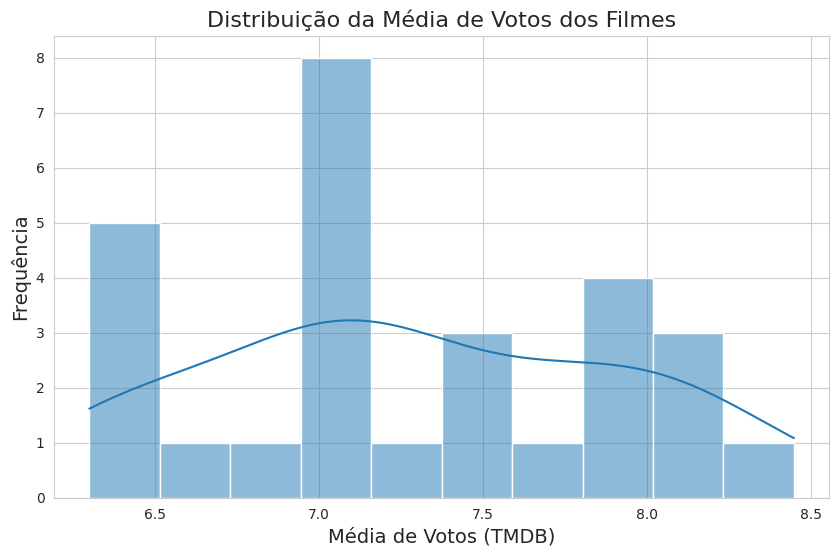

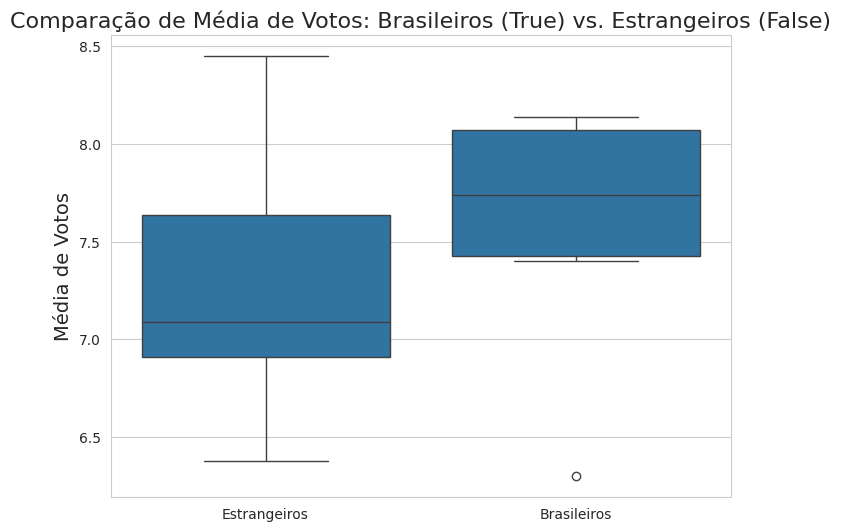


Estatísticas da Média de Votos:
               count      mean       std    min    25%     50%     75%    max
eh_brasileiro                                                                
False           22.0  7.205500  0.596793  6.377  6.911  7.0875  7.6355  8.448
True             6.0  7.568833  0.694920  6.300  7.425  7.7370  8.0685  8.139


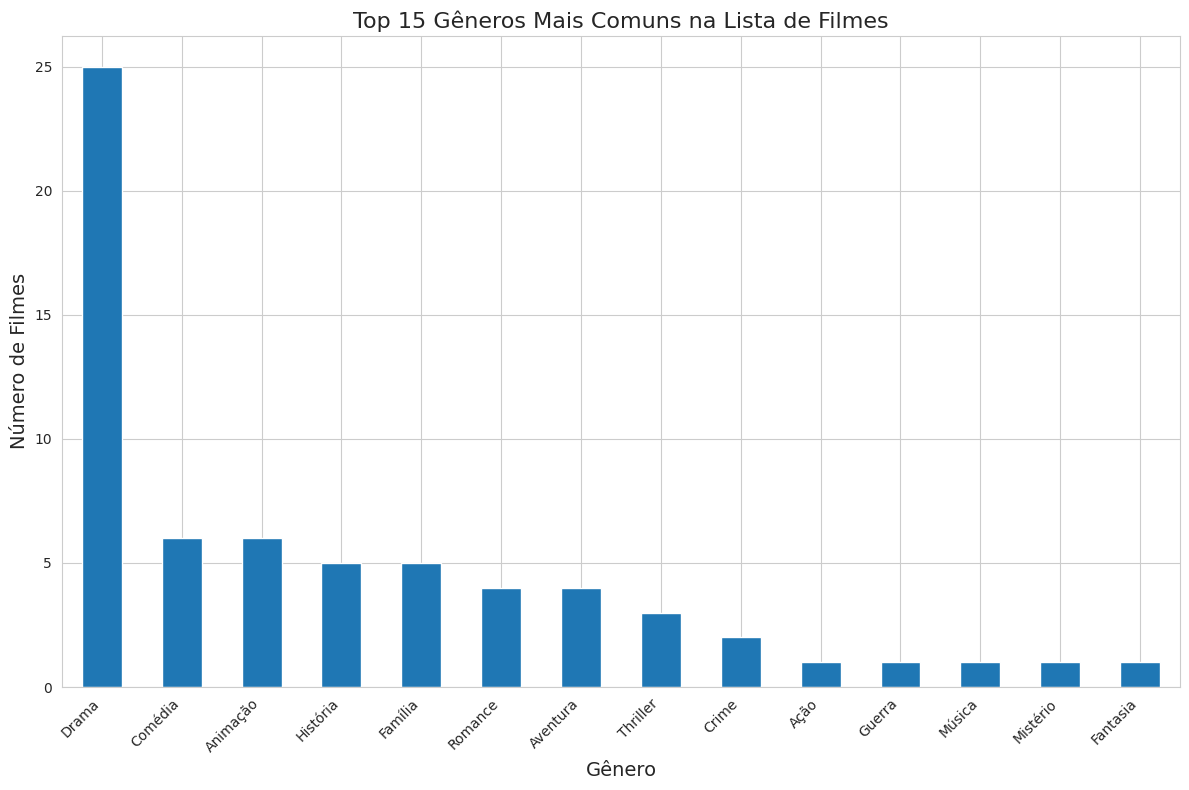

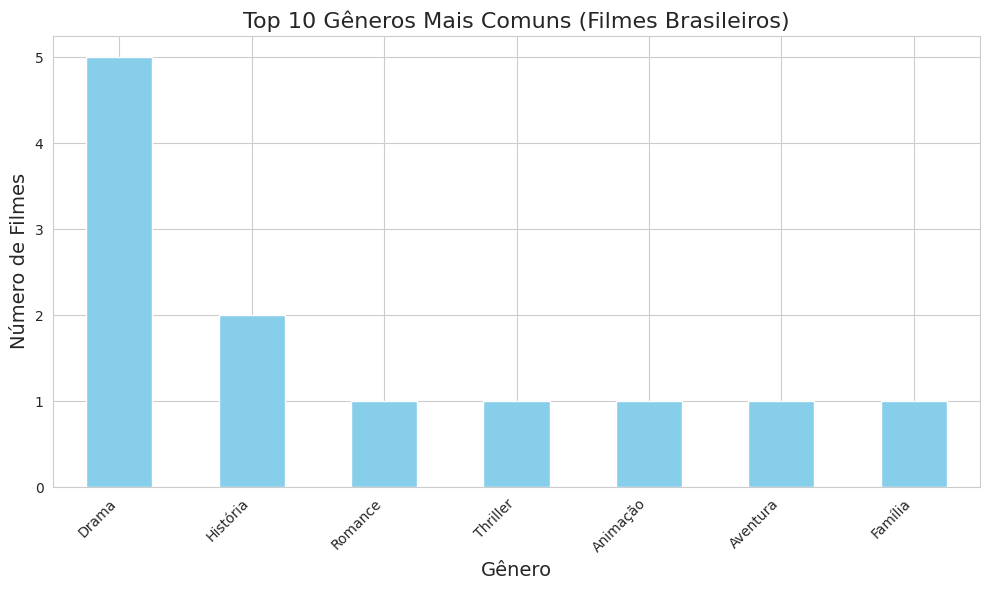

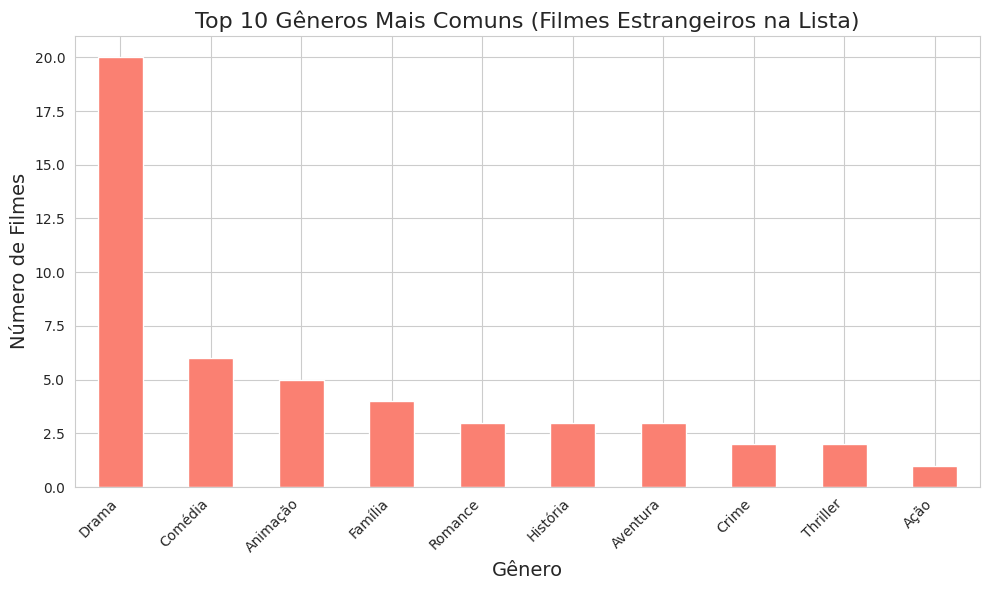

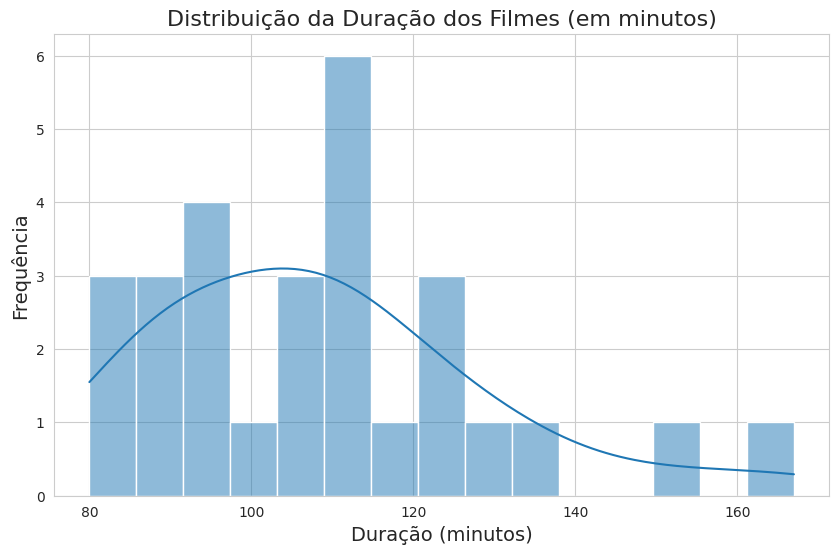

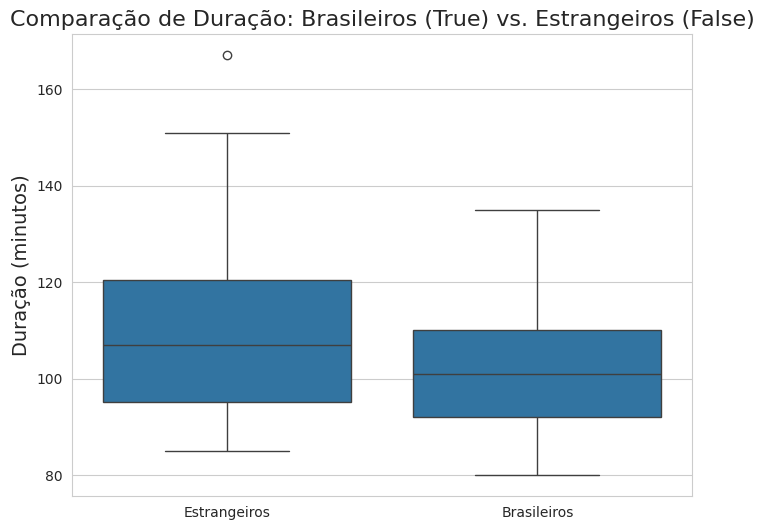

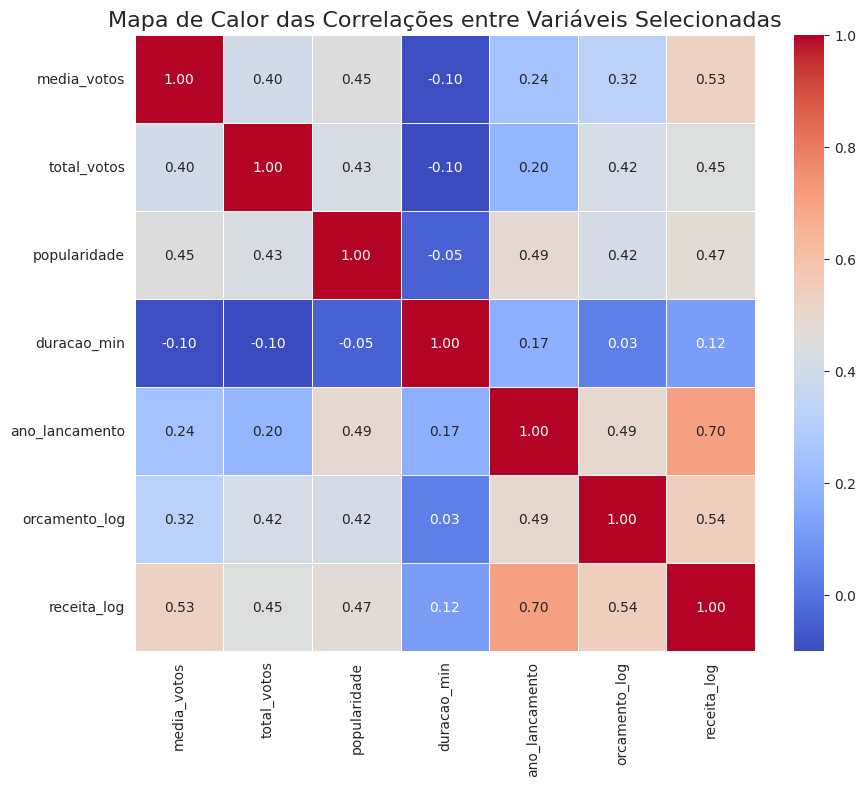

In [ ]:
# df_filmes_analise já deve existir e estar limpo da célula anterior.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Para lidar com possíveis valores infinitos ou zeros em log transformações

# Configurações para os gráficos (opcional, melhora a aparência)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Tamanho padrão das figuras
plt.rcParams['axes.titlesize'] = 16 # Tamanho do título dos eixos
plt.rcParams['axes.labelsize'] = 14 # Tamanho dos labels dos eixos

if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- Iniciando Passo 5: Análise Exploratória dos Dados (EDA) ---")

    # 1. Distribuição de Anos de Lançamento
    if 'ano_lancamento' in df_filmes_analise.columns and df_filmes_analise['ano_lancamento'].nunique() > 1:
        plt.figure(figsize=(12,6))
        sns.histplot(df_filmes_analise[df_filmes_analise['ano_lancamento'] > 0]['ano_lancamento'], kde=False, bins=20)
        plt.title('Distribuição dos Anos de Lançamento dos Filmes na Lista')
        plt.xlabel('Ano de Lançamento')
        plt.ylabel('Número de Filmes')
        plt.show()
    else:
        print("Não há dados suficientes ou variados de 'ano_lancamento' para plotar a distribuição.")

    # 2. Análise de Orçamento (Budget)
    # Filtrar orçamentos maiores que zero para uma melhor visualização, especialmente se muitos são 0.
    orcamentos_validos = df_filmes_analise[df_filmes_analise['orcamento'] > 0]['orcamento']
    if not orcamentos_validos.empty:
        plt.figure(figsize=(10,6))
        sns.histplot(orcamentos_validos, kde=True, bins=15)
        plt.title('Distribuição de Orçamentos (Apenas Filmes com Orçamento > 0)')
        plt.xlabel('Orçamento (em dezenas de milhões, se aplicável pela escala)')
        plt.ylabel('Frequência')
        plt.show()

        # Comparação de Orçamento: Brasileiros vs. Estrangeiros (usando boxplot)
        if 'eh_brasileiro' in df_filmes_analise.columns:
            plt.figure(figsize=(8,6))
            sns.boxplot(x='eh_brasileiro', y='orcamento', data=df_filmes_analise[df_filmes_analise['orcamento'] > 0])
            plt.title('Comparação de Orçamento: Brasileiros (True) vs. Estrangeiros (False)')
            plt.xticks([0, 1], ['Estrangeiros', 'Brasileiros'])
            plt.ylabel('Orçamento')
            plt.xlabel('')
            plt.show()
    else:
        print("Não há filmes com orçamento maior que zero para analisar a distribuição.")


    # 3. Análise de Receita (Revenue)
    receitas_validas = df_filmes_analise[df_filmes_analise['receita'] > 0]['receita']
    if not receitas_validas.empty:
        plt.figure(figsize=(10,6))
        sns.histplot(receitas_validas, kde=True, bins=15)
        plt.title('Distribuição de Receitas (Apenas Filmes com Receita > 0)')
        plt.xlabel('Receita')
        plt.ylabel('Frequência')
        plt.show()

        if 'eh_brasileiro' in df_filmes_analise.columns:
            plt.figure(figsize=(8,6))
            sns.boxplot(x='eh_brasileiro', y='receita', data=df_filmes_analise[df_filmes_analise['receita'] > 0])
            plt.title('Comparação de Receita: Brasileiros (True) vs. Estrangeiros (False)')
            plt.xticks([0, 1], ['Estrangeiros', 'Brasileiros'])
            plt.ylabel('Receita')
            plt.xlabel('')
            plt.show()
    else:
        print("Não há filmes com receita maior que zero para analisar a distribuição.")

    # 4. Análise da Média de Votos (Avaliação)
    if 'media_votos' in df_filmes_analise.columns and df_filmes_analise['media_votos'].notna().any():
        plt.figure(figsize=(10,6))
        sns.histplot(df_filmes_analise[df_filmes_analise['media_votos'] > 0]['media_votos'], kde=True, bins=10) # Média de votos geralmente de 0 a 10
        plt.title('Distribuição da Média de Votos dos Filmes')
        plt.xlabel('Média de Votos (TMDB)')
        plt.ylabel('Frequência')
        plt.show()

        if 'eh_brasileiro' in df_filmes_analise.columns:
            plt.figure(figsize=(8,6))
            sns.boxplot(x='eh_brasileiro', y='media_votos', data=df_filmes_analise[df_filmes_analise['media_votos'] > 0])
            plt.title('Comparação de Média de Votos: Brasileiros (True) vs. Estrangeiros (False)')
            plt.xticks([0, 1], ['Estrangeiros', 'Brasileiros'])
            plt.ylabel('Média de Votos')
            plt.xlabel('')
            plt.show()

            # Estatísticas descritivas da média de votos por grupo
            print("\nEstatísticas da Média de Votos:")
            print(df_filmes_analise.groupby('eh_brasileiro')['media_votos'].describe())
    else:
        print("Não há dados suficientes de 'media_votos' para plotar a distribuição.")


    # 5. Análise de Gêneros
    if 'generos' in df_filmes_analise.columns and df_filmes_analise['generos'].notna().any():
        # A coluna 'generos' contém listas de strings. Precisamos "explodir" para contar cada gênero.
        todos_generos = []
        for lista_generos_filme in df_filmes_analise['generos'].dropna():
            if isinstance(lista_generos_filme, list):
                todos_generos.extend(lista_generos_filme)

        if todos_generos:
            contagem_generos = pd.Series(todos_generos).value_counts()

            plt.figure(figsize=(12,8))
            contagem_generos.head(15).plot(kind='bar') # Top 15 gêneros
            plt.title('Top 15 Gêneros Mais Comuns na Lista de Filmes')
            plt.xlabel('Gênero')
            plt.ylabel('Número de Filmes')
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout() # Ajusta o layout para não cortar os labels
            plt.show()

            # Gêneros mais comuns em filmes brasileiros vs. estrangeiros
            if 'eh_brasileiro' in df_filmes_analise.columns:
                generos_br = []
                for _, row in df_filmes_analise[df_filmes_analise['eh_brasileiro'] == True].iterrows():
                    if isinstance(row['generos'], list):
                        generos_br.extend(row['generos'])

                generos_outros = []
                for _, row in df_filmes_analise[df_filmes_analise['eh_brasileiro'] == False].iterrows():
                    if isinstance(row['generos'], list):
                        generos_outros.extend(row['generos'])

                if generos_br:
                    contagem_generos_br = pd.Series(generos_br).value_counts()
                    plt.figure(figsize=(10,6))
                    contagem_generos_br.head(10).plot(kind='bar', color='skyblue')
                    plt.title('Top 10 Gêneros Mais Comuns (Filmes Brasileiros)')
                    plt.xlabel('Gênero')
                    plt.ylabel('Número de Filmes')
                    plt.xticks(rotation=45, ha="right")
                    plt.tight_layout()
                    plt.show()

                if generos_outros:
                    contagem_generos_outros = pd.Series(generos_outros).value_counts()
                    plt.figure(figsize=(10,6))
                    contagem_generos_outros.head(10).plot(kind='bar', color='salmon')
                    plt.title('Top 10 Gêneros Mais Comuns (Filmes Estrangeiros na Lista)')
                    plt.xlabel('Gênero')
                    plt.ylabel('Número de Filmes')
                    plt.xticks(rotation=45, ha="right")
                    plt.tight_layout()
                    plt.show()
        else:
            print("Não foi possível extrair dados de gênero para análise.")
    else:
        print("Coluna 'generos' não encontrada ou vazia.")

    # 6. Duração dos Filmes
    if 'duracao_min' in df_filmes_analise.columns and df_filmes_analise['duracao_min'].notna().any():
        plt.figure(figsize=(10,6))
        sns.histplot(df_filmes_analise[df_filmes_analise['duracao_min'] > 0]['duracao_min'], kde=True, bins=15)
        plt.title('Distribuição da Duração dos Filmes (em minutos)')
        plt.xlabel('Duração (minutos)')
        plt.ylabel('Frequência')
        plt.show()

        if 'eh_brasileiro' in df_filmes_analise.columns:
            plt.figure(figsize=(8,6))
            sns.boxplot(x='eh_brasileiro', y='duracao_min', data=df_filmes_analise[df_filmes_analise['duracao_min'] > 0])
            plt.title('Comparação de Duração: Brasileiros (True) vs. Estrangeiros (False)')
            plt.xticks([0, 1], ['Estrangeiros', 'Brasileiros'])
            plt.ylabel('Duração (minutos)')
            plt.xlabel('')
            plt.show()
    else:
        print("Não há dados suficientes de 'duracao_min' para plotar a distribuição.")

    # 7. Correlações (Mapa de Calor)
    # Selecionar apenas colunas numéricas para o mapa de correlação
    colunas_numericas_corr = ['orcamento', 'receita', 'popularidade', 'media_votos', 'total_votos', 'duracao_min', 'ano_lancamento']
    # Filtrar para garantir que as colunas existem no dataframe
    colunas_numericas_corr_existentes = [col for col in colunas_numericas_corr if col in df_filmes_analise.columns]

    if colunas_numericas_corr_existentes:
        df_corr = df_filmes_analise[colunas_numericas_corr_existentes].copy()
        # Considerar apenas valores > 0 para orçamento e receita na correlação para evitar distorções pelo excesso de zeros
        df_corr['orcamento_log'] = np.log1p(df_corr['orcamento']) # Usar log para normalizar e lidar com zeros. 1p adiciona 1 antes do log.
        df_corr['receita_log'] = np.log1p(df_corr['receita'])

        # Recalcular correlações com as colunas transformadas (se existirem)
        cols_para_heatmap = ['media_votos', 'total_votos', 'popularidade', 'duracao_min', 'ano_lancamento']
        if 'orcamento_log' in df_corr.columns and df_corr['orcamento_log'].nunique() > 1 : # Apenas se houver variação
             cols_para_heatmap.append('orcamento_log')
        if 'receita_log' in df_corr.columns and df_corr['receita_log'].nunique() > 1:
             cols_para_heatmap.append('receita_log')

        if len(cols_para_heatmap) > 1: # Precisa de pelo menos duas colunas para correlação
            correlacoes = df_corr[cols_para_heatmap].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
            plt.title('Mapa de Calor das Correlações entre Variáveis Selecionadas')
            plt.show()
        else:
            print("Não há colunas numéricas com variação suficiente para calcular correlações significativas.")
    else:
        print("Não há colunas numéricas suficientes para calcular correlações.")

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

# ⚙️Zona de Analise Simples


## 📊 1. Visão Geral do Conjunto de Dados

In [ ]:
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    total_filmes = len(df_filmes_analise)
    print(f"🎬 Número total de filmes na sua lista: {total_filmes}")

    if 'eh_brasileiro' in df_filmes_analise.columns:
        contagem_nacionalidade = df_filmes_analise['eh_brasileiro'].value_counts()
        filmes_brasileiros = contagem_nacionalidade.get(True, 0) # Pega o valor para True, ou 0 se não existir
        filmes_estrangeiros = contagem_nacionalidade.get(False, 0) # Pega o valor para False, ou 0 se não existir
        print(f"🇧🇷 Filmes brasileiros: {filmes_brasileiros}")
        print(f"🌍 Filmes estrangeiros: {filmes_estrangeiros}")
    else:
        print("⚠️ Coluna 'eh_brasileiro' não encontrada para contagem de nacionalidade.")

    if 'ano_lancamento' in df_filmes_analise.columns:
        ano_min = df_filmes_analise[df_filmes_analise['ano_lancamento'] > 0]['ano_lancamento'].min()
        ano_max = df_filmes_analise[df_filmes_analise['ano_lancamento'] > 0]['ano_lancamento'].max()
        if pd.notna(ano_min) and pd.notna(ano_max):
            print(f"🗓️ Período dos filmes (ano de lançamento): de {int(ano_min)} a {int(ano_max)}")
        else:
            print("🗓️ Não foi possível determinar o período dos anos de lançamento (anos podem ser 0 ou ausentes).")
    else:
        print("⚠️ Coluna 'ano_lancamento' não encontrada para análise de período.")
else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

🎬 Número total de filmes na sua lista: 28
🇧🇷 Filmes brasileiros: 6
🌍 Filmes estrangeiros: 22
🗓️ Período dos filmes (ano de lançamento): de 1962 a 2024


## 💰 2. Análise Financeira (Orçamento e Receita)

In [ ]:
import pandas as pd
import numpy as np # Usaremos para NaN em alguns casos

# Certifique-se de que df_filmes_analise está carregado e limpo como no Passo 4
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- 💸 Análise Financeira APRIMORADA E DETALHADA ---")

    # ==============================================================================
    # PARTE 1: ESTATÍSTICAS AGREGADAS (Resumo Geral)
    # ==============================================================================
    print("\n PARTE 1: ESTATÍSTICAS FINANCEIRAS AGREGADAS (Resumo Geral) ".center(70, "="))

    # Filtrando para filmes com dados financeiros > 0 para estatísticas mais significativas
    df_com_orcamento = df_filmes_analise[df_filmes_analise['orcamento'] > 0].copy() # Usar .copy() para evitar SettingWithCopyWarning
    df_com_receita = df_filmes_analise[df_filmes_analise['receita'] > 0].copy()

    print("\n💴 ORÇAMENTO (Budget)")
    if not df_com_orcamento.empty:
        print("\n>> Todos os filmes com orçamento > 0:")
        # Usar .loc para atribuição para evitar SettingWithCopyWarning ao formatar, ou aplicar na impressão
        desc_orc_todos = df_com_orcamento['orcamento'].describe()
        print(desc_orc_todos.apply(lambda x: f"{x:,.0f}")) # Formato sem casas decimais

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS com orçamento > 0:")
            desc_orc_br = df_com_orcamento[df_com_orcamento['eh_brasileiro'] == True]['orcamento'].describe()
            if not desc_orc_br.empty:
                print(desc_orc_br.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme brasileiro com orçamento > 0 para exibir estatísticas.")

            print("\n>> Filmes ESTRANGEIROS com orçamento > 0:")
            desc_orc_est = df_com_orcamento[df_com_orcamento['eh_brasileiro'] == False]['orcamento'].describe()
            if not desc_orc_est.empty:
                print(desc_orc_est.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com orçamento > 0 para exibir estatísticas.")
    else:
        print("   ℹ️ Nenhum filme na lista possui dados de orçamento > 0 informados para estatísticas agregadas.")

    print("\n----------------------------------------------------")
    print("💹 RECEITA (Revenue)")
    if not df_com_receita.empty:
        print("\n>> Todos os filmes com receita > 0:")
        desc_rec_todos = df_com_receita['receita'].describe()
        print(desc_rec_todos.apply(lambda x: f"{x:,.0f}"))

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS com receita > 0:")
            desc_rec_br = df_com_receita[df_com_receita['eh_brasileiro'] == True]['receita'].describe()
            if not desc_rec_br.empty:
                print(desc_rec_br.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme brasileiro com receita > 0 para exibir estatísticas.")

            print("\n>> Filmes ESTRANGEIROS com receita > 0:")
            desc_rec_est = df_com_receita[df_com_receita['eh_brasileiro'] == False]['receita'].describe()
            if not desc_rec_est.empty:
                print(desc_rec_est.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com receita > 0 para exibir estatísticas.")
    else:
        print("   ℹ️ Nenhum filme na lista possui dados de receita > 0 informados para estatísticas agregadas.")

    # ==============================================================================
    # PARTE 2: DETALHES FINANCEIROS POR FILME
    # ==============================================================================
    print("\n\n PARTE 2: DETALHES FINANCEIROS POR FILME ".center(70, "="))

    # Selecionando colunas relevantes e formatando os valores monetários
    df_detalhes_financeiros = df_filmes_analise[['titulo_tmdb', 'ano_lancamento', 'orcamento', 'receita', 'eh_brasileiro']].copy()
    df_detalhes_financeiros['orcamento_fmt'] = df_detalhes_financeiros['orcamento'].apply(lambda x: f"{x:,.0f}" if x > 0 else "Não informado")
    df_detalhes_financeiros['receita_fmt'] = df_detalhes_financeiros['receita'].apply(lambda x: f"{x:,.0f}" if x > 0 else "Não informado")

    print("\n📋 Lista de Orçamento e Receita para cada filme:")
    print("   (Valores em 'Não informado' significam que o TMDB retornou 0 ou o dado não estava disponível)")

    # Imprimindo de forma mais legível
    for index, row in df_detalhes_financeiros.sort_values(by='orcamento', ascending=False).iterrows():
        nacionalidade = "🇧🇷 (Brasileiro)" if row['eh_brasileiro'] else "🌍 (Estrangeiro)"
        print(f"\nFilme: {row['titulo_tmdb']} ({row['ano_lancamento']}) {nacionalidade}")
        print(f"  Orçamento: {row['orcamento_fmt']}")
        print(f"  Receita:   {row['receita_fmt']}")

    # ==============================================================================
    # PARTE 3: ANÁLISE DE RENTABILIDADE ESTIMADA (Lucro/Prejuízo)
    # ==============================================================================
    print("\n\n PARTE 3: ANÁLISE DE RENTABILIDADE ESTIMADA ".center(70, "="))

    # Calcula o lucro/prejuízo APENAS se orçamento e receita forem > 0
    # Caso contrário, o resultado seria enganoso.
    # Se o orçamento for 0, não podemos calcular lucro de forma significativa.
    # Se a receita for 0 mas o orçamento > 0, é um prejuízo do total do orçamento.

    df_filmes_analise['lucro_estimado'] = np.nan # Começa com NaN

    # Condição 1: Orçamento > 0 e Receita > 0
    cond1 = (df_filmes_analise['orcamento'] > 0) & (df_filmes_analise['receita'] > 0)
    df_filmes_analise.loc[cond1, 'lucro_estimado'] = df_filmes_analise['receita'] - df_filmes_analise['orcamento']

    # Condição 2: Orçamento > 0 e Receita == 0 (ou não informada, que já é 0 no nosso df)
    cond2 = (df_filmes_analise['orcamento'] > 0) & (df_filmes_analise['receita'] == 0)
    df_filmes_analise.loc[cond2, 'lucro_estimado'] = -df_filmes_analise['orcamento'] # Prejuízo total do orçamento

    df_rentabilidade = df_filmes_analise[df_filmes_analise['lucro_estimado'].notna()].copy() # Filmes onde o lucro pôde ser estimado

    if not df_rentabilidade.empty:
        df_rentabilidade['lucro_estimado_fmt'] = df_rentabilidade['lucro_estimado'].apply(lambda x: f"{x:,.0f}")
        df_rentabilidade_sorted = df_rentabilidade.sort_values(by='lucro_estimado', ascending=False)

        print("\n📈 Filmes por Lucro/Prejuízo Estimado (onde calculável):")
        print("   (Lucro = Receita - Orçamento. Calculado apenas se orçamento > 0)")
        for index, row in df_rentabilidade_sorted.iterrows():
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['lucro_estimado_fmt']}")

        print("\n>> Estatísticas do Lucro Estimado (onde calculável):")
        print(df_rentabilidade['lucro_estimado'].describe().apply(lambda x: f"{x:,.0f}"))

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Lucro Estimado - Filmes BRASILEIROS (onde calculável):")
            desc_lucro_br = df_rentabilidade[df_rentabilidade['eh_brasileiro'] == True]['lucro_estimado'].describe()
            if not desc_lucro_br.empty:
                print(desc_lucro_br.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme brasileiro com lucro estimado calculável.")

            print("\n>> Lucro Estimado - Filmes ESTRANGEIROS (onde calculável):")
            desc_lucro_est = df_rentabilidade[df_rentabilidade['eh_brasileiro'] == False]['lucro_estimado'].describe()
            if not desc_lucro_est.empty:
                print(desc_lucro_est.apply(lambda x: f"{x:,.0f}"))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com lucro estimado calculável.")
    else:
        print("   ℹ️ Não foi possível calcular a rentabilidade estimada para nenhum filme (orcamento > 0 necessário).")

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

--- 💸 Análise Financeira APRIMORADA E DETALHADA ---
====
 PARTE 1: ESTATÍSTICAS FINANCEIRAS AGREGADAS (Resumo Geral) =====

💴 ORÇAMENTO (Budget)

>> Todos os filmes com orçamento > 0:
count             14
mean      19,599,071
std       45,635,373
min          180,000
25%        1,795,250
50%        3,350,000
75%       17,000,000
max      175,000,000
Name: orcamento, dtype: object

>> Filmes BRASILEIROS com orçamento > 0:
count            2
mean     2,190,000
std      1,004,092
min      1,480,000
25%      1,835,000
50%      2,190,000
75%      2,545,000
max      2,900,000
Name: orcamento, dtype: object

>> Filmes ESTRANGEIROS com orçamento > 0:
count             12
mean      22,500,583
std       48,957,728
min          180,000
25%        1,931,750
50%        4,100,000
75%       21,250,000
max      175,000,000
Name: orcamento, dtype: object

----------------------------------------------------
💹 RECEITA (Revenue)

>> Todos os filmes com receita > 0:
count             16
mean      82,719,0

## ⭐ 3. Análise de Avaliação (Média de Votos)

In [ ]:
import pandas as pd

# Certifique-se de que df_filmes_analise está carregado e limpo como no Passo 4
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- ⭐ Análise de Avaliação APRIMORADA (Média e Total de Votos TMDB) ---")

    # Formatadores para os outputs do .describe()
    format_media_votos = lambda x: f"{x:.2f}" # Duas casas decimais para média de votos
    format_total_votos = lambda x: f"{x:,.0f}" # Separador de milhar para total de votos

    # ==============================================================================
    # PARTE 1: ESTATÍSTICAS AGREGADAS
    # ==============================================================================
    print("\n PARTE 1: ESTATÍSTICAS DE AVALIAÇÃO AGREGADAS ".center(70, "="))

    # --- Média de Votos ---
    print("\n📊 MÉDIA DE VOTOS (TMDB)")
    # Considerar filmes com alguma avaliação (media_votos > 0)
    # Usar .copy() para evitar SettingWithCopyWarning ao adicionar colunas ou filtrar posteriormente
    df_avaliados = df_filmes_analise[df_filmes_analise['media_votos'] > 0].copy()

    if not df_avaliados.empty:
        print("\n>> Todos os filmes (com média de votos > 0):")
        desc_media_todos = df_avaliados['media_votos'].describe().apply(format_media_votos)
        print(desc_media_todos)

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS (com média de votos > 0):")
            desc_media_br = df_avaliados[df_avaliados['eh_brasileiro'] == True]['media_votos'].describe()
            if not desc_media_br.empty:
                print(desc_media_br.apply(format_media_votos))
            else:
                print("   ℹ️ Nenhum filme brasileiro com média de votos > 0 para exibir estatísticas.")

            print("\n>> Filmes ESTRANGEIROS (com média de votos > 0):")
            desc_media_est = df_avaliados[df_avaliados['eh_brasileiro'] == False]['media_votos'].describe()
            if not desc_media_est.empty:
                print(desc_media_est.apply(format_media_votos))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com média de votos > 0 para exibir estatísticas.")
    else:
        print("   ℹ️ Nenhum filme na lista possui dados de média de votos > 0 para estatísticas agregadas.")

    # --- Total de Votos ---
    print("\n----------------------------------------------------")
    print("🗳️ TOTAL DE VOTOS (TMDB)")
    # Para total_votos, podemos analisar todos, mesmo que a média seja 0 (embora raro)
    if 'total_votos' in df_filmes_analise.columns:
        print("\n>> Todos os filmes:")
        desc_total_votos_todos = df_filmes_analise['total_votos'].describe().apply(format_total_votos)
        print(desc_total_votos_todos)

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS:")
            desc_total_votos_br = df_filmes_analise[df_filmes_analise['eh_brasileiro'] == True]['total_votos'].describe()
            if not desc_total_votos_br.empty:
                print(desc_total_votos_br.apply(format_total_votos))
            else:
                print("   ℹ️ Nenhum filme brasileiro para exibir estatísticas de total de votos.")

            print("\n>> Filmes ESTRANGEIROS:")
            desc_total_votos_est = df_filmes_analise[df_filmes_analise['eh_brasileiro'] == False]['total_votos'].describe()
            if not desc_total_votos_est.empty:
                print(desc_total_votos_est.apply(format_total_votos))
            else:
                print("   ℹ️ Nenhum filme estrangeiro para exibir estatísticas de total de votos.")
    else:
        print("   ℹ️ Coluna 'total_votos' não encontrada.")


    # ==============================================================================
    # PARTE 2: DETALHES DE AVALIAÇÃO POR FILME
    # ==============================================================================
    print("\n\n PARTE 2: DETALHES DE AVALIAÇÃO POR FILME ".center(70, "="))

    df_detalhes_avaliacao = df_filmes_analise[['titulo_tmdb', 'ano_lancamento', 'media_votos', 'total_votos', 'eh_brasileiro']].copy()
    df_detalhes_avaliacao_sorted = df_detalhes_avaliacao.sort_values(by='media_votos', ascending=False)

    print("\n📋 Lista de Média de Votos e Total de Votos para cada filme (ordenado por Média de Votos):")
    for index, row in df_detalhes_avaliacao_sorted.iterrows():
        nacionalidade = "🇧🇷 (Brasileiro)" if row['eh_brasileiro'] else "🌍 (Estrangeiro)"
        alerta_votos = "⚠️ (Poucos Votos!)" if row['total_votos'] < 50 else "" # Exemplo de alerta para menos de 50 votos

        print(f"\nFilme: {row['titulo_tmdb']} ({row['ano_lancamento']}) {nacionalidade}")
        print(f"  Média de Votos: {row['media_votos']:.2f}") # Formata para 2 casas decimais
        print(f"  Total de Votos: {row['total_votos']:,.0f} {alerta_votos}")


    # ==============================================================================
    # PARTE 3: DESTAQUES NAS AVALIAÇÕES
    # ==============================================================================
    print("\n\n PARTE 3: DESTAQUES NAS AVALIAÇÕES ".center(70, "="))

    # Top 5 Filmes por Média de Votos (com pelo menos um número razoável de votos, ex: >= 50)
    min_votos_para_top = 50
    df_top_avaliados = df_filmes_analise[df_filmes_analise['total_votos'] >= min_votos_para_top].sort_values(by='media_votos', ascending=False)

    print(f"\n🏆 Top 5 Filmes por Média de Votos (com no mínimo {min_votos_para_top} votos):")
    if not df_top_avaliados.empty:
        for index, row in df_top_avaliados.head(5).iterrows():
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  {index+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['media_votos']:.2f} (Votos: {row['total_votos']:,.0f})")
    else:
        print(f"   ℹ️ Nenhum filme atende ao critério de no mínimo {min_votos_para_top} votos.")

    # Top 5 Filmes Brasileiros por Média de Votos (com pelo menos um número razoável de votos)
    if 'eh_brasileiro' in df_filmes_analise.columns:
        df_br_top_avaliados = df_filmes_analise[
            (df_filmes_analise['eh_brasileiro'] == True) &
            (df_filmes_analise['total_votos'] >= min_votos_para_top)
        ].sort_values(by='media_votos', ascending=False)

        print(f"\n🏆🇧🇷 Top Filmes Brasileiros por Média de Votos (com no mínimo {min_votos_para_top} votos):")
        if not df_br_top_avaliados.empty:
            for index, row in df_br_top_avaliados.head(5).iterrows(): # Mostra até 5, ou menos se não houver
                 print(f"  - {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['media_votos']:.2f} (Votos: {row['total_votos']:,.0f})")
        else:
            print(f"   ℹ️ Nenhum filme brasileiro atende ao critério de no mínimo {min_votos_para_top} votos.")

    # Filmes com Maior Número de Votos
    df_mais_votados = df_filmes_analise.sort_values(by='total_votos', ascending=False)
    print("\n🗣️ Top 5 Filmes com Maior Número de Votos:")
    if not df_mais_votados.empty:
        for index, row in df_mais_votados.head(5).iterrows():
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  {index+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['total_votos']:,.0f} (Média: {row['media_votos']:.2f})")
    else:
        print("   ℹ️ Não há filmes para listar por número de votos.")

    # Filmes com Menos de X votos (ex: 50) para destacar avaliações menos robustas
    votos_minimos_confiaveis = 50
    df_poucos_votos = df_filmes_analise[df_filmes_analise['total_votos'] < votos_minimos_confiaveis]
    print(f"\n🤔 Filmes com Menos de {votos_minimos_confiaveis} Votos (avaliação pode ser menos robusta):")
    if not df_poucos_votos.empty:
        for index, row in df_poucos_votos.iterrows():
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  - {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['total_votos']:,.0f} votos (Média: {row['media_votos']:.2f})")
    else:
        print(f"   👍 Todos os filmes têm {votos_minimos_confiaveis} ou mais votos.")

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

--- ⭐ Análise de Avaliação APRIMORADA (Média e Total de Votos TMDB) ---
 PARTE 1: ESTATÍSTICAS DE AVALIAÇÃO AGREGADAS ============

📊 MÉDIA DE VOTOS (TMDB)

>> Todos os filmes (com média de votos > 0):
count    28.00
mean      7.28
std       0.62
min       6.30
25%       6.94
50%       7.10
75%       7.90
max       8.45
Name: media_votos, dtype: object

>> Filmes BRASILEIROS (com média de votos > 0):
count    6.00
mean     7.57
std      0.69
min      6.30
25%      7.43
50%      7.74
75%      8.07
max      8.14
Name: media_votos, dtype: object

>> Filmes ESTRANGEIROS (com média de votos > 0):
count    22.00
mean      7.21
std       0.60
min       6.38
25%       6.91
50%       7.09
75%       7.64
max       8.45
Name: media_votos, dtype: object

----------------------------------------------------
🗳️ TOTAL DE VOTOS (TMDB)

>> Todos os filmes:
count        28
mean      1,740
std       4,784
min           7
25%          69
50%         168
75%       1,072
max      22,512
Name: total_votos, d

## ⏳ 4. Análise de Duração dos Filmes

In [ ]:
import pandas as pd

# Certifique-se de que df_filmes_analise está carregado e limpo como no Passo 4
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- ⏳ Análise de Duração dos Filmes APRIMORADA (em minutos) ---")

    # Formatador para os outputs do .describe()
    format_duracao = lambda x: f"{x:.0f} min"

    # ==============================================================================
    # PARTE 1: ESTATÍSTICAS DE DURAÇÃO AGREGADAS
    # ==============================================================================
    print("\n PARTE 1: ESTATÍSTICAS DE DURAÇÃO AGREGADAS ".center(70, "="))

    # Considerar filmes com duração informada (duracao_min > 0)
    # Usar .copy() para evitar SettingWithCopyWarning
    df_com_duracao = df_filmes_analise[df_filmes_analise['duracao_min'] > 0].copy()

    if not df_com_duracao.empty:
        print("\n>> Todos os filmes (com duração > 0):")
        desc_duracao_todos = df_com_duracao['duracao_min'].describe().apply(format_duracao)
        print(desc_duracao_todos)

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS (com duração > 0):")
            desc_duracao_br = df_com_duracao[df_com_duracao['eh_brasileiro'] == True]['duracao_min'].describe()
            if not desc_duracao_br.empty:
                print(desc_duracao_br.apply(format_duracao))
            else:
                print("   ℹ️ Nenhum filme brasileiro com duração > 0 para exibir estatísticas.")

            print("\n>> Filmes ESTRANGEIROS (com duração > 0):")
            desc_duracao_est = df_com_duracao[df_com_duracao['eh_brasileiro'] == False]['duracao_min'].describe()
            if not desc_duracao_est.empty:
                print(desc_duracao_est.apply(format_duracao))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com duração > 0 para exibir estatísticas.")
    else:
        print("   ℹ️ Nenhum filme na lista possui dados de duração > 0 informados para estatísticas agregadas.")

    # ==============================================================================
    # PARTE 2: DETALHES DE DURAÇÃO POR FILME
    # ==============================================================================
    print("\n\n PARTE 2: DETALHES DE DURAÇÃO POR FILME ".center(70, "="))

    df_detalhes_duracao = df_filmes_analise[['titulo_tmdb', 'ano_lancamento', 'duracao_min', 'eh_brasileiro']].copy()
    # Ordenar por duração, do mais longo para o mais curto
    df_detalhes_duracao_sorted = df_detalhes_duracao.sort_values(by='duracao_min', ascending=False)

    print("\n📋 Lista de Duração para cada filme (ordenado por Duração, decrescente):")
    for index, row in df_detalhes_duracao_sorted.iterrows():
        nacionalidade = "🇧🇷 (Brasileiro)" if row['eh_brasileiro'] else "🌍 (Estrangeiro)"
        duracao_filme_min = row['duracao_min']

        if duracao_filme_min > 0:
            horas = int(duracao_filme_min // 60)
            minutos = int(duracao_filme_min % 60)
            duracao_formatada = f"{horas}h {minutos:02d}min" if horas > 0 else f"{minutos}min"
            duracao_output = f"{duracao_filme_min:.0f} min ({duracao_formatada})"
        else:
            duracao_output = "Não informada"

        print(f"\nFilme: {row['titulo_tmdb']} ({row['ano_lancamento']}) {nacionalidade}")
        print(f"  Duração: {duracao_output}")

    # ==============================================================================
    # PARTE 3: DESTAQUES NA DURAÇÃO
    # ==============================================================================
    print("\n\n PARTE 3: DESTAQUES NA DURAÇÃO ".center(70, "="))

    # Filmes mais longos (considerando apenas os que têm duração > 0)
    df_mais_longos = df_com_duracao.sort_values(by='duracao_min', ascending=False)

    print("\n🎬 Top 5 Filmes Mais Longos:")
    if not df_mais_longos.empty:
        for i, (index, row) in enumerate(df_mais_longos.head(5).iterrows()):
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            horas = int(row['duracao_min'] // 60)
            minutos = int(row['duracao_min'] % 60)
            duracao_formatada = f"{horas}h {minutos:02d}min" if horas > 0 else f"{minutos}min"
            print(f"  {i+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['duracao_min']:.0f} min ({duracao_formatada})")
    else:
        print("   ℹ️ Nenhum filme com duração > 0 para listar os mais longos.")

    # Filmes mais curtos (considerando apenas os que têm duração > 0)
    df_mais_curtos = df_com_duracao.sort_values(by='duracao_min', ascending=True)
    print("\n⏱️ Top 5 Filmes Mais Curtos (com duração > 0):")
    if not df_mais_curtos.empty:
        for i, (index, row) in enumerate(df_mais_curtos.head(5).iterrows()):
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            horas = int(row['duracao_min'] // 60)
            minutos = int(row['duracao_min'] % 60)
            duracao_formatada = f"{horas}h {minutos:02d}min" if horas > 0 else f"{minutos}min"
            print(f"  {i+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['duracao_min']:.0f} min ({duracao_formatada})")
    else:
        print("   ℹ️ Nenhum filme com duração > 0 para listar os mais curtos.")

    # Duração média de filmes brasileiros vs estrangeiros (já coberto na Parte 1, mas podemos reiterar)
    if 'eh_brasileiro' in df_com_duracao.columns and not df_com_duracao.empty:
        media_duracao_br = df_com_duracao[df_com_duracao['eh_brasileiro'] == True]['duracao_min'].mean()
        media_duracao_est = df_com_duracao[df_com_duracao['eh_brasileiro'] == False]['duracao_min'].mean()

        print("\n Média de Duração Comparativa (para filmes com duração > 0) ".center(70, "-"))
        if pd.notna(media_duracao_br):
             print(f"  🇧🇷 Duração Média (Brasileiros): {media_duracao_br:.0f} min")
        else:
             print("  🇧🇷 Duração Média (Brasileiros): Não calculável (sem dados ou apenas um filme)")
        if pd.notna(media_duracao_est):
            print(f"  🌍 Duração Média (Estrangeiros): {media_duracao_est:.0f} min")
        else:
            print("  🌍 Duração Média (Estrangeiros): Não calculável (sem dados ou apenas um filme)")

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

--- ⏳ Análise de Duração dos Filmes APRIMORADA (em minutos) ---
 PARTE 1: ESTATÍSTICAS DE DURAÇÃO AGREGADAS =============

>> Todos os filmes (com duração > 0):
count     28 min
mean     109 min
std       20 min
min       80 min
25%       92 min
50%      107 min
75%      118 min
max      167 min
Name: duracao_min, dtype: object

>> Filmes BRASILEIROS (com duração > 0):
count      6 min
mean     103 min
std       19 min
min       80 min
25%       92 min
50%      101 min
75%      110 min
max      135 min
Name: duracao_min, dtype: object

>> Filmes ESTRANGEIROS (com duração > 0):
count     22 min
mean     110 min
std       21 min
min       85 min
25%       95 min
50%      107 min
75%      120 min
max      167 min
Name: duracao_min, dtype: object

 PARTE 2: DETALHES DE DURAÇÃO POR FILME ==============

📋 Lista de Duração para cada filme (ordenado por Duração, decrescente):

Filme: A Semente do Fruto Sagrado (2024) 🌍 (Estrangeiro)
  Duração: 167 min (2h 47min)

Filme: El abuelo (1998) 🌍 (Es

## 🎭 5. Análise de Gêneros

In [ ]:
import pandas as pd
from collections import Counter # Para contagem eficiente

# Certifique-se de que df_filmes_analise está carregado e limpo como no Passo 4
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- 🎭 Análise de Gêneros APRIMORADA ---")

    if 'generos' in df_filmes_analise.columns and df_filmes_analise['generos'].notna().any():

        # Função auxiliar para extrair e achatar a lista de todos os gêneros de um DataFrame filtrado
        def extrair_lista_plana_generos(df_filtrado):
            lista_plana = []
            for generos_filme in df_filtrado['generos'].dropna():
                if isinstance(generos_filme, list):
                    lista_plana.extend(generos_filme)
            return lista_plana

        # ==============================================================================
        # PARTE 1: CONTAGEM GERAL DE GÊNEROS (com porcentagens)
        # ==============================================================================
        print("\n PARTE 1: CONTAGEM GERAL DE GÊNEROS ".center(70, "="))

        todos_generos_lista_geral = extrair_lista_plana_generos(df_filmes_analise)

        if todos_generos_lista_geral:
            total_ocorrencias_geral = len(todos_generos_lista_geral)
            contagem_geral_generos = pd.Series(todos_generos_lista_geral).value_counts()

            print(f"\n🎬 Top 10 Gêneros Mais Comuns (Geral - de {total_ocorrencias_geral} ocorrências de gênero):")
            for genero, contagem in contagem_geral_generos.head(10).items():
                percentual = (contagem / total_ocorrencias_geral) * 100
                print(f"  - {genero}: {contagem} ocorrências ({percentual:.1f}%)")
        else:
            print("   ℹ️ Não foi possível extrair dados de gênero para a análise geral.")

        # ==============================================================================
        # PARTE 2: CONTAGEM DE GÊNEROS POR NACIONALIDADE (com porcentagens)
        # ==============================================================================
        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n\n PARTE 2: CONTAGEM DE GÊNEROS POR NACIONALIDADE ".center(70, "="))

            # Filmes Brasileiros
            df_br = df_filmes_analise[df_filmes_analise['eh_brasileiro'] == True]
            generos_br_lista = extrair_lista_plana_generos(df_br)
            if generos_br_lista:
                total_ocorrencias_br = len(generos_br_lista)
                contagem_generos_br = pd.Series(generos_br_lista).value_counts()
                print(f"\n🇧🇷 Top 5 Gêneros Mais Comuns (Filmes Brasileiros - de {total_ocorrencias_br} ocorrências de gênero):")
                for genero, contagem in contagem_generos_br.head(5).items():
                    percentual = (contagem / total_ocorrencias_br) * 100
                    print(f"  - {genero}: {contagem} ocorrências ({percentual:.1f}%)")
            else:
                print("\n🇧🇷 ℹ️ Não foi possível extrair gêneros para filmes brasileiros ou não há filmes brasileiros.")

            # Filmes Estrangeiros
            df_est = df_filmes_analise[df_filmes_analise['eh_brasileiro'] == False]
            generos_est_lista = extrair_lista_plana_generos(df_est)
            if generos_est_lista:
                total_ocorrencias_est = len(generos_est_lista)
                contagem_generos_est = pd.Series(generos_est_lista).value_counts()
                print(f"\n🌍 Top 5 Gêneros Mais Comuns (Filmes Estrangeiros na Lista - de {total_ocorrencias_est} ocorrências de gênero):")
                for genero, contagem in contagem_generos_est.head(5).items():
                    percentual = (contagem / total_ocorrencias_est) * 100
                    print(f"  - {genero}: {contagem} ocorrências ({percentual:.1f}%)")
            else:
                print("\n🌍 ℹ️ Não foi possível extrair gêneros para filmes estrangeiros ou não há filmes estrangeiros.")

        # ==============================================================================
        # PARTE 3: GÊNEROS POR FILME BRASILEIRO
        # ==============================================================================
        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n\n PARTE 3: LISTA DE GÊNEROS POR FILME BRASILEIRO ".center(70, "="))
            df_filmes_brasileiros = df_filmes_analise[df_filmes_analise['eh_brasileiro'] == True]
            if not df_filmes_brasileiros.empty:
                for index, row in df_filmes_brasileiros.iterrows():
                    generos_str = ", ".join(row['generos']) if isinstance(row['generos'], list) and row['generos'] else "Não informado"
                    print(f"🎬 {row['titulo_tmdb']} ({row['ano_lancamento']}): {generos_str}")
            else:
                print("   ℹ️ Nenhum filme brasileiro na lista para detalhar os gêneros.")

        # ==============================================================================
        # PARTE 4: NÚMERO DE GÊNEROS POR FILME
        # ==============================================================================
        print("\n\n PARTE 4: ANÁLISE DO NÚMERO DE GÊNEROS POR FILME ".center(70, "="))

        # Calcula o número de gêneros para cada filme
        # Garante que df_filmes_analise['generos'] não tenha NaNs antes de aplicar len, ou substitua NaNs por lista vazia
        df_filmes_analise_temp = df_filmes_analise.copy() # Evitar SettingWithCopyWarning
        df_filmes_analise_temp['num_generos'] = df_filmes_analise_temp['generos'].apply(lambda x: len(x) if isinstance(x, list) else 0)

        print("\n>> Estatísticas do Número de Gêneros por Filme (Geral):")
        print(df_filmes_analise_temp['num_generos'].describe().apply(lambda x: f"{x:.1f}"))

        if 'eh_brasileiro' in df_filmes_analise_temp.columns:
            print("\n>> Número de Gêneros por Filme (Brasileiros):")
            desc_num_gen_br = df_filmes_analise_temp[df_filmes_analise_temp['eh_brasileiro'] == True]['num_generos'].describe()
            if not desc_num_gen_br.empty:
                print(desc_num_gen_br.apply(lambda x: f"{x:.1f}"))
            else:
                 print("   ℹ️ Nenhum filme brasileiro para calcular estatísticas de número de gêneros.")

            print("\n>> Número de Gêneros por Filme (Estrangeiros):")
            desc_num_gen_est = df_filmes_analise_temp[df_filmes_analise_temp['eh_brasileiro'] == False]['num_generos'].describe()
            if not desc_num_gen_est.empty:
                print(desc_num_gen_est.apply(lambda x: f"{x:.1f}"))
            else:
                print("   ℹ️ Nenhum filme estrangeiro para calcular estatísticas de número de gêneros.")

            # Filmes com maior e menor número de gêneros
            df_sorted_num_generos = df_filmes_analise_temp.sort_values(by='num_generos', ascending=False)
            print("\n🎬 Filmes com Maior Número de Gêneros Atribuídos (Top 3):")
            for i, (index, row) in enumerate(df_sorted_num_generos.head(3).iterrows()):
                print(f"  {i+1}. {row['titulo_tmdb']}: {row['num_generos']} gêneros ({', '.join(row['generos'])})")

            print("\n🎬 Filmes com Menor Número de Gêneros Atribuídos (Bottom 3, com pelo menos 1 gênero):")
            for i, (index, row) in enumerate(df_sorted_num_generos[df_sorted_num_generos['num_generos'] > 0].tail(3).iloc[::-1].iterrows()): # inverte para pegar os menores primeiro
                print(f"  {i+1}. {row['titulo_tmdb']}: {row['num_generos']} gênero(s) ({', '.join(row['generos'])})")

    else:
        print("⚠️ Coluna 'generos' não encontrada ou vazia. Análise de gêneros não pode prosseguir.")
else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

--- 🎭 Análise de Gêneros APRIMORADA ---
 PARTE 1: CONTAGEM GERAL DE GÊNEROS =================

🎬 Top 10 Gêneros Mais Comuns (Geral - de 65 ocorrências de gênero):
  - Drama: 25 ocorrências (38.5%)
  - Comédia: 6 ocorrências (9.2%)
  - Animação: 6 ocorrências (9.2%)
  - História: 5 ocorrências (7.7%)
  - Família: 5 ocorrências (7.7%)
  - Romance: 4 ocorrências (6.2%)
  - Aventura: 4 ocorrências (6.2%)
  - Thriller: 3 ocorrências (4.6%)
  - Crime: 2 ocorrências (3.1%)
  - Ação: 1 ocorrências (1.5%)

 PARTE 2: CONTAGEM DE GÊNEROS POR NACIONALIDADE ==========

🇧🇷 Top 5 Gêneros Mais Comuns (Filmes Brasileiros - de 12 ocorrências de gênero):
  - Drama: 5 ocorrências (41.7%)
  - História: 2 ocorrências (16.7%)
  - Romance: 1 ocorrências (8.3%)
  - Thriller: 1 ocorrências (8.3%)
  - Animação: 1 ocorrências (8.3%)

🌍 Top 5 Gêneros Mais Comuns (Filmes Estrangeiros na Lista - de 53 ocorrências de gênero):
  - Drama: 20 ocorrências (37.7%)
  - Comédia: 6 ocorrências (11.3%)
  - Animação: 5 ocorrên

## ✨ 6. Análise de Popularidade (TMDB)

In [ ]:
import pandas as pd

# Certifique-se de que df_filmes_analise está carregado e limpo como no Passo 4
if 'df_filmes_analise' in locals() and not df_filmes_analise.empty:
    print("--- ✨ Análise de Popularidade APRIMORADA (TMDB) ---")

    # Formatador para os outputs do .describe() para popularidade
    format_popularidade = lambda x: f"{x:.2f}" # Duas casas decimais para popularidade

    # ==============================================================================
    # PARTE 1: ESTATÍSTICAS DE POPULARIDADE AGREGADAS
    # ==============================================================================
    print("\n PARTE 1: ESTATÍSTICAS DE POPULARIDADE AGREGADAS ".center(70, "="))

    # Considerar filmes com popularidade > 0 (geralmente todos terão algum valor, mas é uma boa prática)
    # Usar .copy() para evitar SettingWithCopyWarning
    df_com_popularidade = df_filmes_analise[df_filmes_analise['popularidade'] > 0].copy()

    if not df_com_popularidade.empty:
        print("\n>> Todos os filmes (com popularidade > 0):")
        desc_pop_todos = df_com_popularidade['popularidade'].describe().apply(format_popularidade)
        print(desc_pop_todos)

        if 'eh_brasileiro' in df_filmes_analise.columns:
            print("\n>> Filmes BRASILEIROS (com popularidade > 0):")
            desc_pop_br = df_com_popularidade[df_com_popularidade['eh_brasileiro'] == True]['popularidade'].describe()
            if not desc_pop_br.empty:
                print(desc_pop_br.apply(format_popularidade))
            else:
                print("   ℹ️ Nenhum filme brasileiro com popularidade > 0 para exibir estatísticas.")

            print("\n>> Filmes ESTRANGEIROS (com popularidade > 0):")
            desc_pop_est = df_com_popularidade[df_com_popularidade['eh_brasileiro'] == False]['popularidade'].describe()
            if not desc_pop_est.empty:
                print(desc_pop_est.apply(format_popularidade))
            else:
                print("   ℹ️ Nenhum filme estrangeiro com popularidade > 0 para exibir estatísticas.")
    else:
        print("   ℹ️ Nenhum filme na lista possui dados de popularidade > 0 para estatísticas agregadas.")

    # ==============================================================================
    # PARTE 2: DETALHES DE POPULARIDADE POR FILME
    # ==============================================================================
    print("\n\n PARTE 2: DETALHES DE POPULARIDADE POR FILME ".center(70, "="))

    df_detalhes_popularidade = df_filmes_analise[['titulo_tmdb', 'ano_lancamento', 'popularidade', 'eh_brasileiro']].copy()
    # Ordenar por popularidade, da maior para a menor
    df_detalhes_popularidade_sorted = df_detalhes_popularidade.sort_values(by='popularidade', ascending=False)

    print("\n📋 Lista de Popularidade para cada filme (ordenado por Popularidade, decrescente):")
    for index, row in df_detalhes_popularidade_sorted.iterrows():
        nacionalidade = "🇧🇷 (Brasileiro)" if row['eh_brasileiro'] else "🌍 (Estrangeiro)"
        popularidade_filme = row['popularidade']

        print(f"\nFilme: {row['titulo_tmdb']} ({row['ano_lancamento']}) {nacionalidade}")
        print(f"  Popularidade TMDB: {popularidade_filme:.3f}") # 3 casas decimais para mais precisão na visualização

    # ==============================================================================
    # PARTE 3: DESTAQUES NA POPULARIDADE
    # ==============================================================================
    print("\n\n PARTE 3: DESTAQUES NA POPULARIDADE ".center(70, "="))

    # Filmes mais populares
    df_mais_populares = df_com_popularidade.sort_values(by='popularidade', ascending=False)

    print("\n🚀 Top 5 Filmes Mais Populares na Lista:")
    if not df_mais_populares.empty:
        for i, (index, row) in enumerate(df_mais_populares.head(5).iterrows()):
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  {i+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['popularidade']:.3f}")
    else:
        print("   ℹ️ Nenhum filme com popularidade > 0 para listar os mais populares.")

    # Filmes brasileiros mais populares
    if 'eh_brasileiro' in df_mais_populares.columns:
        df_br_mais_populares = df_mais_populares[df_mais_populares['eh_brasileiro'] == True]
        print("\n🚀🇧🇷 Top Filmes Brasileiros Mais Populares na Lista:")
        if not df_br_mais_populares.empty:
            for i, (index, row) in enumerate(df_br_mais_populares.head(5).iterrows()): # Top 5 ou menos, se houver menos de 5 BR
                print(f"  {i+1}. {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['popularidade']:.3f}")
        else:
            print("   ℹ️ Nenhum filme brasileiro com popularidade > 0 para listar.")


    # Filmes menos populares (mas com popularidade > 0)
    df_menos_populares = df_com_popularidade.sort_values(by='popularidade', ascending=True)
    print("\n🐌 Top 5 Filmes Menos Populares na Lista (com popularidade > 0):")
    if not df_menos_populares.empty:
        for i, (index, row) in enumerate(df_menos_populares.head(5).iterrows()):
            nacionalidade = "🇧🇷" if row['eh_brasileiro'] else "🌍"
            print(f"  {i+1}. {nacionalidade} {row['titulo_tmdb']} ({row['ano_lancamento']}): {row['popularidade']:.3f}")
    else:
        print("   ℹ️ Nenhum filme com popularidade > 0 para listar os menos populares.")

    print("\n" + "".center(70, "-"))
    print("💡 Nota sobre a Popularidade do TMDB: Esta métrica é calculada com base em")
    print("   diferentes fatores de atividade na plataforma, como número de votos no dia,")
    print("   visualizações da página do filme, adições a listas de usuários, etc.")
    print("   Ela é dinâmica e reflete o 'interesse' recente ou contínuo por um filme no TMDB.")
    print("".center(70, "-"))

else:
    print("DataFrame 'df_filmes_analise' não encontrado. Execute as células anteriores primeiro.")

--- ✨ Análise de Popularidade APRIMORADA (TMDB) ---
 PARTE 1: ESTATÍSTICAS DE POPULARIDADE AGREGADAS ==========

>> Todos os filmes (com popularidade > 0):
count    28.00
mean      5.25
std       9.79
min       0.13
25%       0.48
50%       0.88
75%       5.58
max      47.38
Name: popularidade, dtype: object

>> Filmes BRASILEIROS (com popularidade > 0):
count     6.00
mean      3.00
std       5.18
min       0.29
25%       0.71
50%       0.81
75%       1.61
max      13.52
Name: popularidade, dtype: object

>> Filmes ESTRANGEIROS (com popularidade > 0):
count    22.00
mean      5.87
std      10.73
min       0.13
25%       0.46
50%       1.29
75%       5.92
max      47.38
Name: popularidade, dtype: object

 PARTE 2: DETALHES DE POPULARIDADE POR FILME ============

📋 Lista de Popularidade para cada filme (ordenado por Popularidade, decrescente):

Filme: Flow (2024) 🌍 (Estrangeiro)
  Popularidade TMDB: 47.383

Filme: Divertida Mente (2015) 🌍 (Estrangeiro)
  Popularidade TMDB: 22.410

Filme

# 🔎Analise do Oscar:

## 📂Carregar e Verificar o CSV

In [ ]:
import pandas as pd

caminho_novo_csv = 'Dataset\Dataset_Oscar.csv'

try:
    # Tente carregar o CSV. Assumindo que o separador seja ponto e vírgula (';').
    # Se for vírgula ou outro, ajuste o parâmetro sep=',' por exemplo.
    df_metricas_usuario_csv = pd.read_csv(caminho_novo_csv, sep=';')
    print(f"✅ Arquivo CSV '{caminho_novo_csv}' carregado com sucesso!")
    print("\n--- Primeiras 5 linhas do seu NOVO CSV ('Dataset_Oscar.csv') ---")
    print(df_metricas_usuario_csv.head())
    print("\n--- Informações Gerais do seu NOVO CSV ---")
    df_metricas_usuario_csv.info()
    print("\n--- Nomes das Colunas do seu NOVO CSV ---")
    colunas_do_novo_csv = list(df_metricas_usuario_csv.columns)
    print(colunas_do_novo_csv)

    # Vamos verificar novamente as colunas de métricas que você mencionou
    colunas_metricas_num_esperadas = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    print("\n--- Verificação das Colunas de Métricas Numéricas no NOVO CSV ---")
    colunas_num_presentes_novo_csv = [col for col in colunas_metricas_num_esperadas if col in colunas_do_novo_csv]
    colunas_num_ausentes_novo_csv = [col for col in colunas_metricas_num_esperadas if col not in colunas_do_novo_csv]

    if colunas_num_presentes_novo_csv:
        print(f"✅ Colunas numéricas de métricas encontradas no NOVO CSV: {colunas_num_presentes_novo_csv}")
    if colunas_num_ausentes_novo_csv:
        print(f"⚠️ Colunas numéricas de métricas NÃO encontradas no NOVO CSV: {colunas_num_ausentes_novo_csv}")
        print("   Se estas colunas são essenciais, a análise com elas não poderá prosseguir como planejado.")

except FileNotFoundError:
    print(f"🚨 Erro: Arquivo não encontrado em '{caminho_novo_csv}'")
    print("   Por favor, verifique o caminho e se o Google Drive está montado corretamente.")
    df_metricas_usuario_csv = None
except Exception as e:
    print(f"🚨 Ocorreu um erro inesperado ao carregar o NOVO CSV: {e}")
    print("   Verifique se o arquivo CSV está formatado corretamente e se o separador (sep=';') está correto.")
    df_metricas_usuario_csv = None

✅ Arquivo CSV '/content/drive/MyDrive/Faculdade/Python BIG DATA/Zuum Notebooks/Analise Oscar/Dataset/Dataset_Oscar.csv' carregado com sucesso!

--- Primeiras 5 linhas do seu NOVO CSV ('Dataset_Oscar.csv') ---
         id                                              title  \
0   59990.0                             O Pagador de Promessas   
1   43001.0  Les dimanches de Ville d'Avray (Sinfonia de um...   
2   47447.0                                  Elektra (Electra)   
3  194163.0                                           Tlayucan   
4       NaN                                                NaN   

   cinematografia_num  narrativa_impact_num  reconhe_buzz_num  marketing_num  \
0                 9.5                   9.5              10.0            8.5   
1                 8.5                   8.8               9.0            8.5   
2                 8.5                   8.8               8.0            7.5   
3                 8.0                   8.5               7.0            7

## 📫Código para Análise Comparativa:

### 👑(Oscar 1963)

In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie
import time
import numpy as np # Para np.nan

if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Oscar 1963 (Filmes de 1962) ---")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    filmes_para_analise_1963_data = {
        'titulo_referencia': [ # Títulos de referência mais estáveis
            "O Pagador de Promessas",
            "Sundays and Cybele", # Nome internacional de Les dimanches de Ville d'Avray
            "Elektra", # O ano (1962) será pego do TMDB ou corrigido se necessário
            "Tlayucan",
            "The Four Days of Naples" # Nome internacional de Le quattro giornate di Napoli
        ],
        'id_tmdb': [59990, 43001, 47447, 194163, 70957],
        'pais_filme': ["Brasil", "França", "Grécia", "México", "Itália"],
        'vencedor_categoria': [False, True, False, False, False]
    }
    df_lista_filmes_1963 = pd.DataFrame(filmes_para_analise_1963_data)

    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""):
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except: # Se falhar, mantém 0
                        pass
                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0}

    print("Buscando dados do TMDB para os filmes de 1963...")
    dados_tmdb_coletados = []
    for index, row in df_lista_filmes_1963.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        # Adiciona as informações que já temos (id_tmdb, país, vencedor, titulo_referencia) aos dados do TMDB
        data['id_tmdb'] = row['id_tmdb'] # Garante que o ID original seja usado
        data['pais_filme'] = row['pais_filme']
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia'] # Adiciona o título de referência
        dados_tmdb_coletados.append(data)
        time.sleep(0.3)

    df_tmdb_1963 = pd.DataFrame(dados_tmdb_coletados)

    # Tratamento para o filme com ID 70957 (Le quattro giornate di Napoli)
    idx_70957 = df_tmdb_1963[df_tmdb_1963['id_tmdb'] == 70957].index
    if not idx_70957.empty:
        # Se TMDB retornou dados incorretos de ano/título, podemos forçar aqui para consistência na análise
        # O título PT-BR da API para 70957 é "Prisioneiras em Fúria (1983)".
        # Vamos usar o título de referência e o ano correto para exibição e análise se necessário.
        print(f"\n⚠️ Alerta TMDB: Para o ID 70957, TMDB retornou '{df_tmdb_1963.loc[idx_70957[0], 'titulo_tmdb']}' ({df_tmdb_1963.loc[idx_70957[0], 'ano_lancamento_tmdb']}).")
        print(f"   Usaremos '{df_tmdb_1963.loc[idx_70957[0], 'titulo_referencia']}' (1962) como referência.")
        # Corrigindo o ano se estiver errado (TMDB retornou 1983)
        if df_tmdb_1963.loc[idx_70957[0], 'ano_lancamento_tmdb'] != 1962:
            df_tmdb_1963.loc[idx_70957[0], 'ano_lancamento_tmdb'] = 1962


    print("\nDados coletados do TMDB (após verificações):")
    print(df_tmdb_1963[['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'ano_lancamento_tmdb', 'pais_filme']].head().to_string())


    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")

    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    colunas_metricas_cat_csv_originais = [ # Colunas categóricas que você já tem no CSV
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True)
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int)
    # Mantemos 'id' como nome da coluna no CSV para o merge, especificando left_on e right_on

    ids_para_analise = df_lista_filmes_1963['id_tmdb'].tolist()

    # Colunas a selecionar do SEU CSV (incluindo as categóricas originais)
    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]

    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv # 'title' é a coluna de título do SEU CSV

    df_metricas_csv_filtrado = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado) < len(ids_para_analise):
        ids_encontrados_csv = df_metricas_csv_filtrado['id'].unique()
        ids_faltantes = [id_tmdb for id_tmdb in ids_para_analise if id_tmdb not in ids_encontrados_csv]
        print(f"⚠️ Atenção: {len(ids_faltantes)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes}")
        print(f"   Filmes encontrados no CSV para este ano: {len(df_metricas_csv_filtrado)}")

    print(f"\nMétricas do seu CSV para os filmes selecionados de 1963 (antes do merge):")
    print(df_metricas_csv_filtrado.head().to_string())

    df_analise_1963 = pd.merge(
        df_tmdb_1963,
        df_metricas_csv_filtrado,
        left_on='id_tmdb', # Coluna de ID do df_tmdb_1963
        right_on='id',     # Coluna de ID do df_metricas_csv_filtrado
        how='left'
    )
    # Remove a coluna 'id' duplicada do CSV após o merge, se existir, e 'title' do CSV se não for necessária
    df_analise_1963.drop(columns=['id', 'title'], inplace=True, errors='ignore')


    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")

    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)):
            return "N/A"
        if score == 0:
             return "N/A"
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv: # Usa a lista de colunas que realmente existem no CSV
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_1963.columns:
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_1963[col_categorica_nome] = df_analise_1963[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_1963 para categorização (pós-merge).")
    else:
        print("   ℹ️ Nenhuma coluna numérica de métrica do CSV encontrada para categorizar.")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA - OSCAR 1963 (Filmes de 1962) ---")

    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    # Adicionar as colunas de métricas numéricas e as categóricas GERADAS
    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_1963.columns: # Checa se a coluna numérica existe no df_analise_1963
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_1963.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    # Adicionar as colunas categóricas ORIGINAIS do seu CSV, se você quiser vê-las também
    # for col_cat_original in colunas_cat_reais_no_csv:
    #    if col_cat_original in df_analise_1963.columns:
    #        colunas_para_exibir.append(col_cat_original)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_1963.columns]

    if not df_analise_1963.empty:
        df_display = df_analise_1963[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display.columns:
            df_display['orcamento_tmdb'] = df_display['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display.columns:
            df_display['receita_tmdb'] = df_display['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display.columns:
             df_display['media_votos_tmdb'] = df_display['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        # Correção final do título e ano para exibição do filme italiano (ID 70957)
        # Usaremos o 'titulo_referencia' que já está em df_analise_1963
        idx_70957_display = df_display[df_display['id_tmdb'] == 70957].index
        if not idx_70957_display.empty:
            titulo_ref_70957 = df_analise_1963.loc[df_analise_1963['id_tmdb'] == 70957, 'titulo_referencia'].iloc[0]
            df_display.loc[idx_70957_display[0], 'titulo_tmdb'] = f"{titulo_ref_70957} (Ref.)" # Indica que é o título de referência
            df_display.loc[idx_70957_display[0], 'ano_lancamento_tmdb'] = 1962 # Garante o ano correto na exibição

        def sort_order(row):
            if row['id_tmdb'] == 59990: return 0
            if row['vencedor_categoria']: return 1
            return 2

        df_display['ordem_sort'] = df_display.apply(sort_order, axis=1)
        df_display_sorted = df_display.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print(df_display_sorted.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Oscar 1963) ---")
        # Usar df_analise_1963 para pegar os dados para descrição, pois df_display pode ter formatação
        pagador_row = df_analise_1963[df_analise_1963['id_tmdb'] == 59990]
        vencedor_row = df_analise_1963[df_analise_1963['vencedor_categoria'] == True]

        if not pagador_row.empty:
            # Usa o título de referência para consistência, caso o da API esteja diferente
            titulo_pagador = pagador_row['titulo_referencia'].iloc[0] if 'titulo_referencia' in pagador_row else pagador_row['titulo_tmdb'].iloc[0]
            print(f"\n🇧🇷 {titulo_pagador} (Brasil):")
            print(f"   - Média de Votos TMDB: {pagador_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv: # Iterar sobre as colunas que existem no CSV
                if col_num in pagador_row.columns: # E que existem no df_analise_1963 após o merge
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = pagador_row[col_num].iloc[0]
                    valor_cat = pagador_row[col_cat_gerada].iloc[0] if col_cat_gerada in pagador_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if not vencedor_row.empty:
            titulo_vencedor = vencedor_row['titulo_referencia'].iloc[0] if 'titulo_referencia' in vencedor_row else vencedor_row['titulo_tmdb'].iloc[0]
            print(f"\n🏆 Vencedor: {titulo_vencedor} ({vencedor_row['pais_filme'].iloc[0]}):")
            print(f"   - Média de Votos TMDB: {vencedor_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in vencedor_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = vencedor_row[col_num].iloc[0]
                    valor_cat = vencedor_row[col_cat_gerada].iloc[0] if col_cat_gerada in vencedor_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if colunas_num_reais_no_csv:
            print("\n📊 Comparativo de Médias das Métricas Personalizadas (entre os filmes de 1963 no seu CSV):")
            # Filtra df_analise_1963 para filmes que realmente tiveram métricas do CSV (não NaN para essas colunas)
            df_com_metricas_csv = df_analise_1963.dropna(subset=colunas_num_reais_no_csv)
            if not df_com_metricas_csv.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_csv.columns:
                        scores_validos = df_com_metricas_csv[pd.to_numeric(df_com_metricas_csv[col_num], errors='coerce').fillna(0) > 0][col_num]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0)")
            else:
                print("   Não há filmes com todas as métricas do CSV preenchidas para calcular médias agregadas.")
    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_1963 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")

--- Iniciando Análise Comparativa: Oscar 1963 (Filmes de 1962) ---

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes de 1963...
Buscando: O Pagador de Promessas (ID: 59990)
Buscando: Sundays and Cybele (ID: 43001)
Buscando: Elektra (ID: 47447)
Buscando: Tlayucan (ID: 194163)
Buscando: The Four Days of Naples (ID: 70957)

⚠️ Alerta TMDB: Para o ID 70957, TMDB retornou 'Prisioneiras em Fúria' (1983).
   Usaremos 'The Four Days of Naples' (1962) como referência.

Dados coletados do TMDB (após verificações):
   id_tmdb             titulo_tmdb        titulo_referencia  ano_lancamento_tmdb pais_filme
0    59990  O Pagador de Promessas   O Pagador de Promessas                 1962     Brasil
1    43001     Sempre aos Domingos       Sundays and Cybele                 1962     França
2    47447    Electra, A Vingadora                  Elektra                 1962     Grécia
3   194163                Tlayucan                 Tlayucan               

--- 📊 Gerando Gráficos Comparativos para Oscar 1963 ---


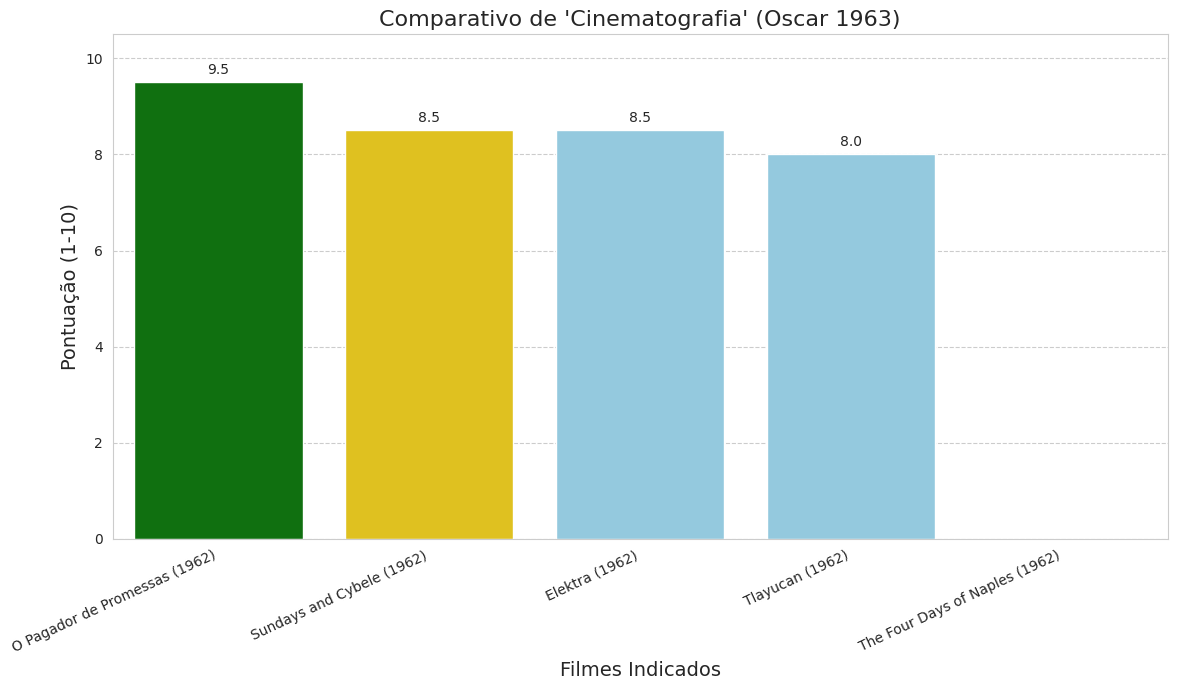

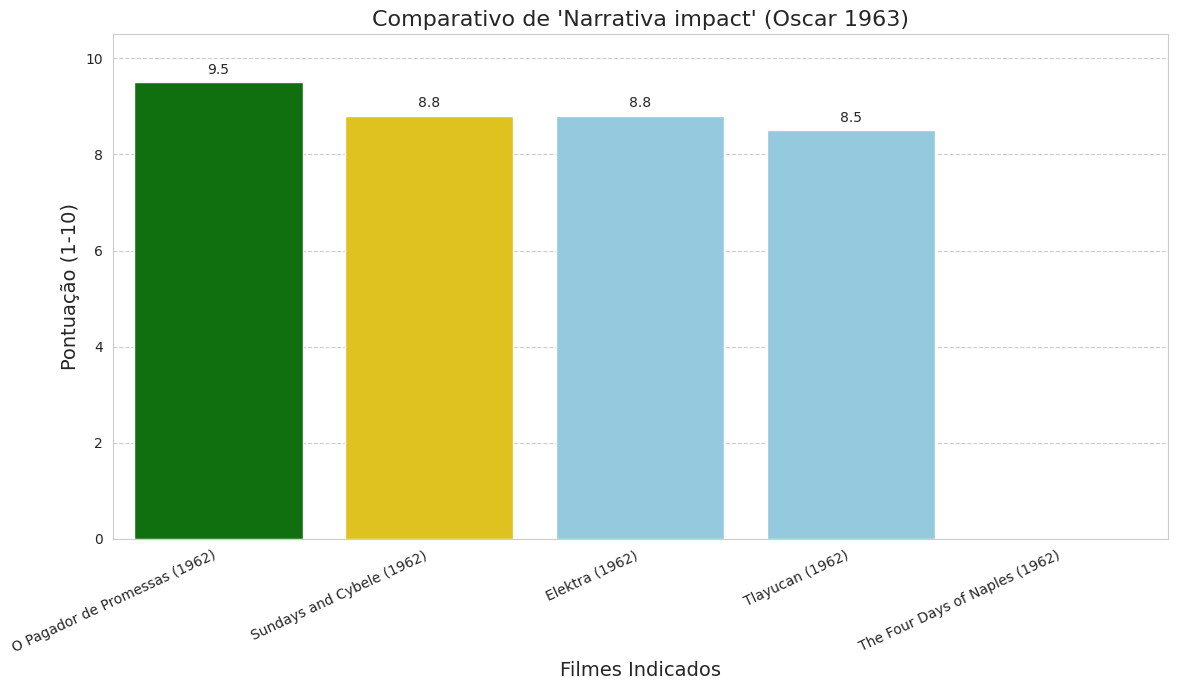

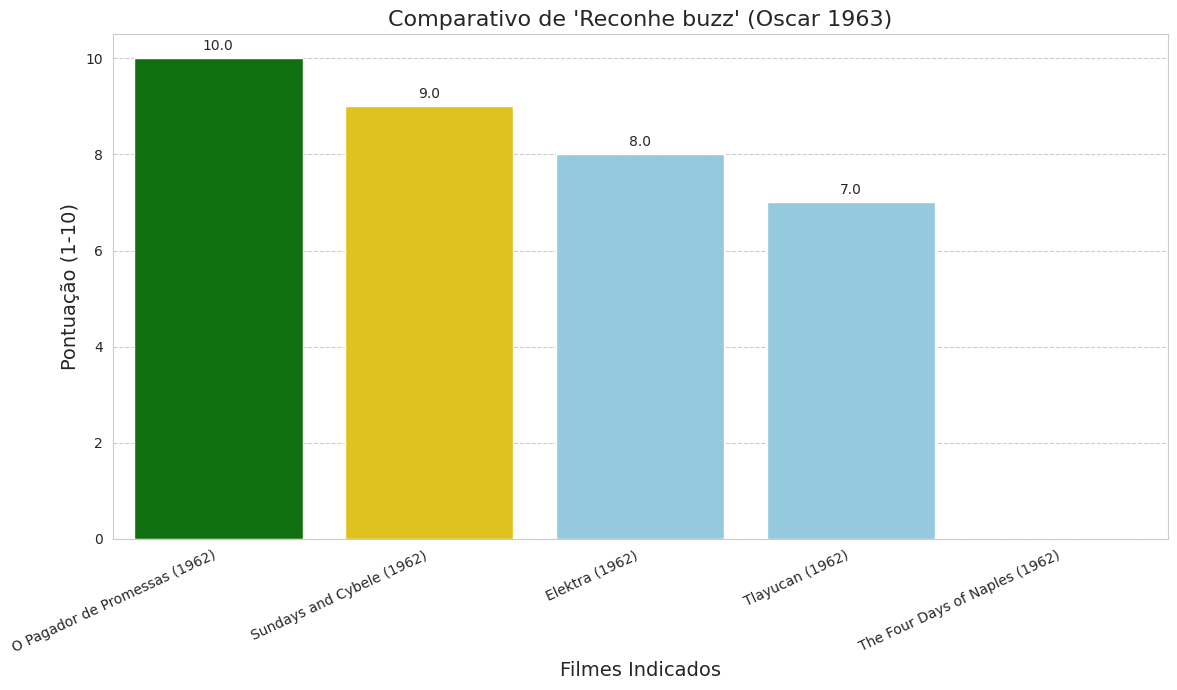

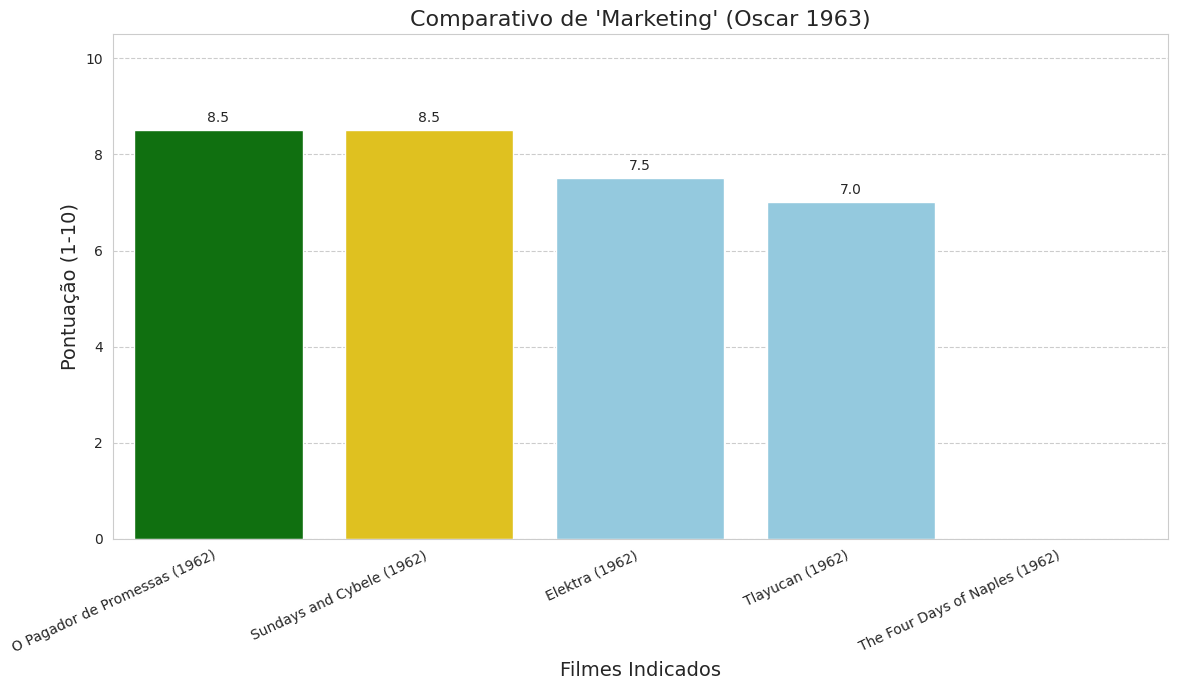

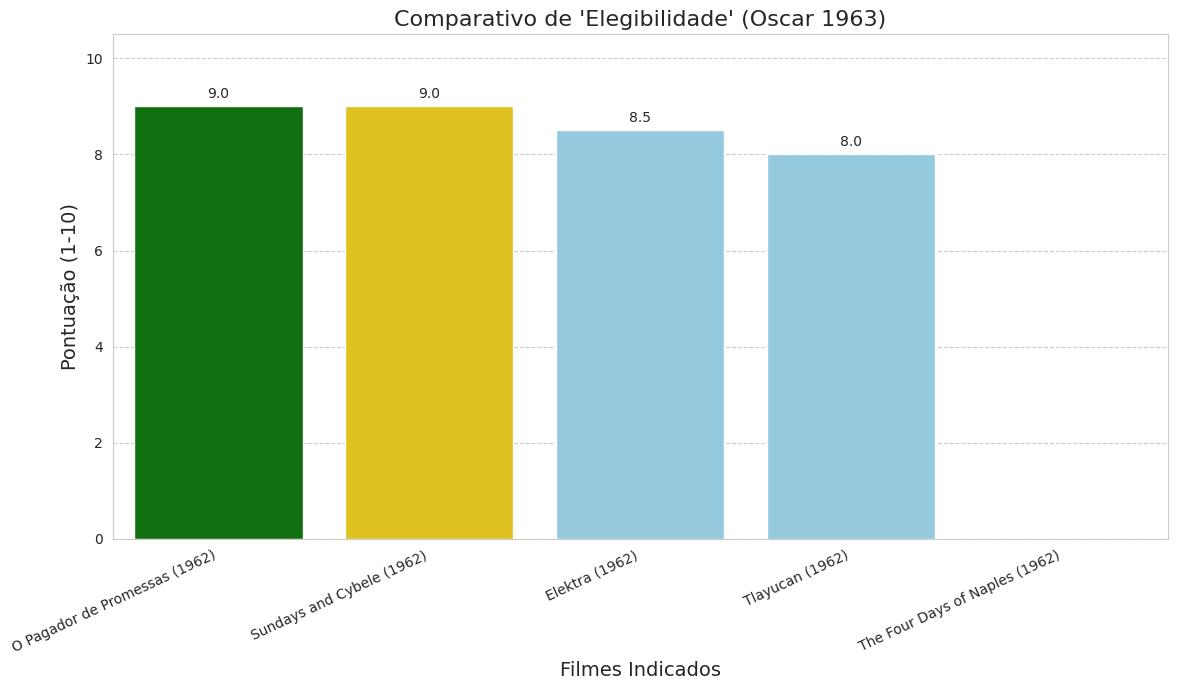

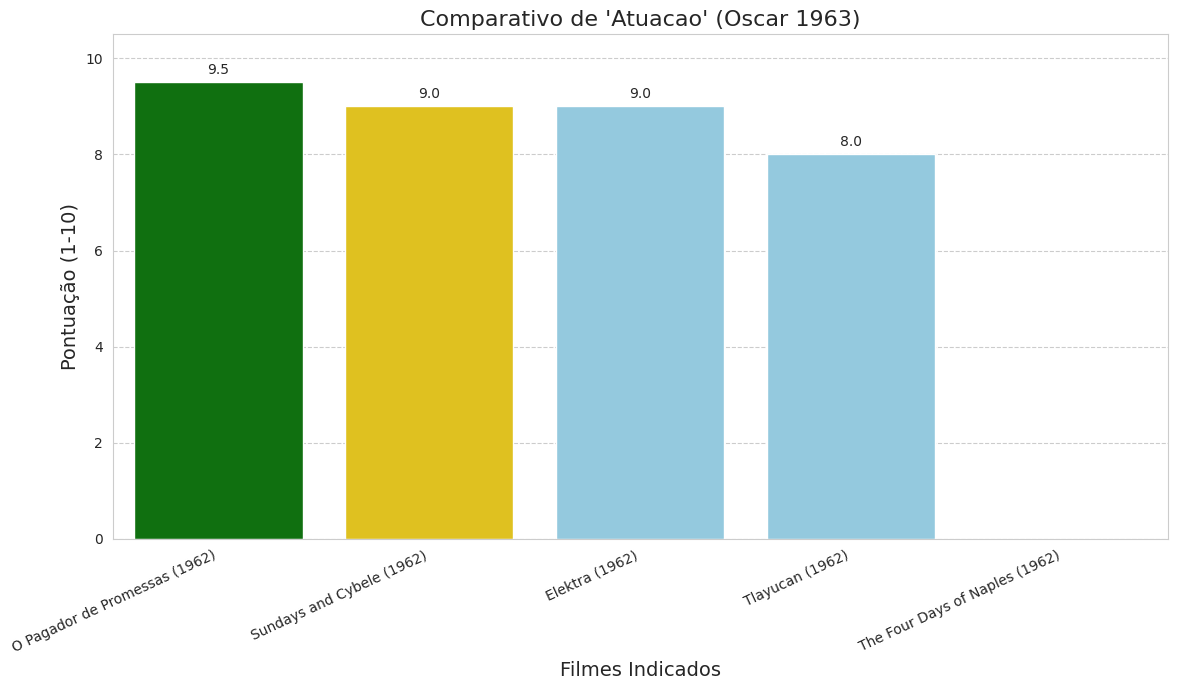


 legenda de cores dos gráficos:
🟩 Verde: O Pagador de Promessas
🌟 Dourado: Filme Vencedor da Categoria
🟦 Azul Claro: Outros Concorrentes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Certifique-se de que df_analise_1963 existe e foi populado pela célula anterior.
if 'df_analise_1963' in locals() and not df_analise_1963.empty:
    print("--- 📊 Gerando Gráficos Comparativos para Oscar 1963 ---")

    # Lista das colunas de métricas numéricas que vieram do seu CSV e estão no df_analise_1963
    # Esta lista foi definida no script anterior como 'colunas_num_reais_no_df_final'
    # Se essa variável não existir, vamos recriá-la com base nas colunas esperadas
    if 'colunas_num_reais_no_df_final' not in locals() or not colunas_num_reais_no_df_final:
        colunas_metricas_num_esperadas = [
            'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
            'marketing_num', 'elegibilidade_num', 'atuacao_num'
        ]
        colunas_num_reais_no_df_final = [col for col in colunas_metricas_num_esperadas if col in df_analise_1963.columns and df_analise_1963[col].dtype in [np.int64, np.float64]]
        if not colunas_num_reais_no_df_final:
            print("⚠️ Nenhuma coluna de métrica numérica customizada encontrada em df_analise_1963 para plotar.")

    if colunas_num_reais_no_df_final:
        # Preparar um DataFrame para plotagem com títulos de exibição consistentes
        df_plot = df_analise_1963.copy()

        # Criar títulos de exibição mais curtos e consistentes para os gráficos
        # Usaremos 'titulo_referencia' que já está mais limpo e o ano correto
        def criar_titulo_display(row):
            titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
            ano = row.get('ano_lancamento_tmdb', '')
            # Para o filme italiano, garantir que estamos usando o nome de referência correto
            if row['id_tmdb'] == 70957: # ID de "Le quattro giornate di Napoli"
                titulo = "The Four Days of Naples" # Usando o título de referência correto
                ano = 1962
            return f"{titulo} ({ano})"

        df_plot['titulo_display_grafico'] = df_plot.apply(criar_titulo_display, axis=1)

        # Definir cores para destaque
        # Cor padrão, cor para 'O Pagador de Promessas', cor para o vencedor
        cores_barras = []
        id_pagador = 59990
        id_vencedor = 43001 # Les dimanches de Ville d'Avray / Sundays and Cybele

        for index, row in df_plot.iterrows():
            if row['id_tmdb'] == id_pagador:
                cores_barras.append('green')  # Cor para O Pagador de Promessas
            elif row['vencedor_categoria'] == True: # Ou row['id_tmdb'] == id_vencedor
                cores_barras.append('gold')   # Cor para o vencedor
            else:
                cores_barras.append('skyblue') # Cor para os outros concorrentes

        # Gerar um gráfico de barras para cada métrica numérica
        for metrica in colunas_num_reais_no_df_final:
            if metrica in df_plot.columns:
                plt.figure(figsize=(12, 7))

                # Ordenar os filmes para o gráfico (opcional, mas pode melhorar a leitura)
                # Aqui, vamos manter a ordem da lista ou você pode ordenar por pontuação, etc.
                # df_plot_sorted = df_plot.sort_values(by=metrica, ascending=False)
                # sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted, palette=cores_barras_sorted)
                # Para manter a ordem original e cores correspondentes:

                barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot,
                                      palette=cores_barras, hue='titulo_display_grafico', dodge=False, legend=False)

                plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Oscar 1963)", fontsize=16)
                plt.xlabel("Filmes Indicados", fontsize=14)
                plt.ylabel("Pontuação (1-10)", fontsize=14)
                plt.xticks(rotation=25, ha="right", fontsize=10) # Rotação para melhor visualização dos títulos
                plt.yticks(fontsize=10)
                plt.ylim(0, 10.5) # Definir limite do eixo Y para escala de 1-10
                plt.grid(axis='y', linestyle='--')

                # Adicionar os valores no topo das barras
                for p in barplot.patches:
                    barplot.annotate(format(p.get_height(), '.1f'), # Formata para 1 casa decimal
                                   (p.get_x() + p.get_width() / 2., p.get_height()),
                                   ha = 'center', va = 'center',
                                   xytext = (0, 9),
                                   textcoords = 'offset points', fontsize=10)

                plt.tight_layout() # Ajusta o layout para não cortar nada
                plt.show()
            else:
                print(f"⚠️ A métrica '{metrica}' não foi encontrada no DataFrame para plotagem (pós-merge).")

        print("\n legenda de cores dos gráficos:")
        print("🟩 Verde: O Pagador de Promessas")
        print("🌟 Dourado: Filme Vencedor da Categoria")
        print("🟦 Azul Claro: Outros Concorrentes")

    else:
        print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada em 'df_analise_1963' para gerar os gráficos.")
        print("   Verifique se o merge com seu CSV ocorreu corretamente e se as colunas _num existem.")

else:
    print("🚨 DataFrame 'df_analise_1963' não encontrado. Execute a célula anterior que cria este DataFrame.")

### 👑(Oscar 1996)

--- Iniciando Análise Comparativa: Oscar 1996 (Filmes de 1995) ---
Foco: O Quatrilho e seus concorrentes

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes do Oscar 1996...
Buscando: O Quatrilho (ID: 67617)
Buscando: Antonia's Line (ID: 880)
Buscando: All Things Fair (ID: 27098)
Buscando: Dust of Life (ID: 124617)
Buscando: The Star Maker (ID: 37975)

Dados coletados do TMDB:
   id_tmdb                      titulo_tmdb  ano_lancamento_tmdb     pais_filme
0    67617                      O Quatrilho                 1995         Brasil
1      880  A Excêntrica Família de Antônia                 1995  Países Baixos
2    27098            Lust och fägring stor                 1995         Suécia
3   124617                Poussières de vie                 1995        Argélia
4    37975             O Homem das Estrelas                 1995         Itália


--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---

Métricas do seu CSV p

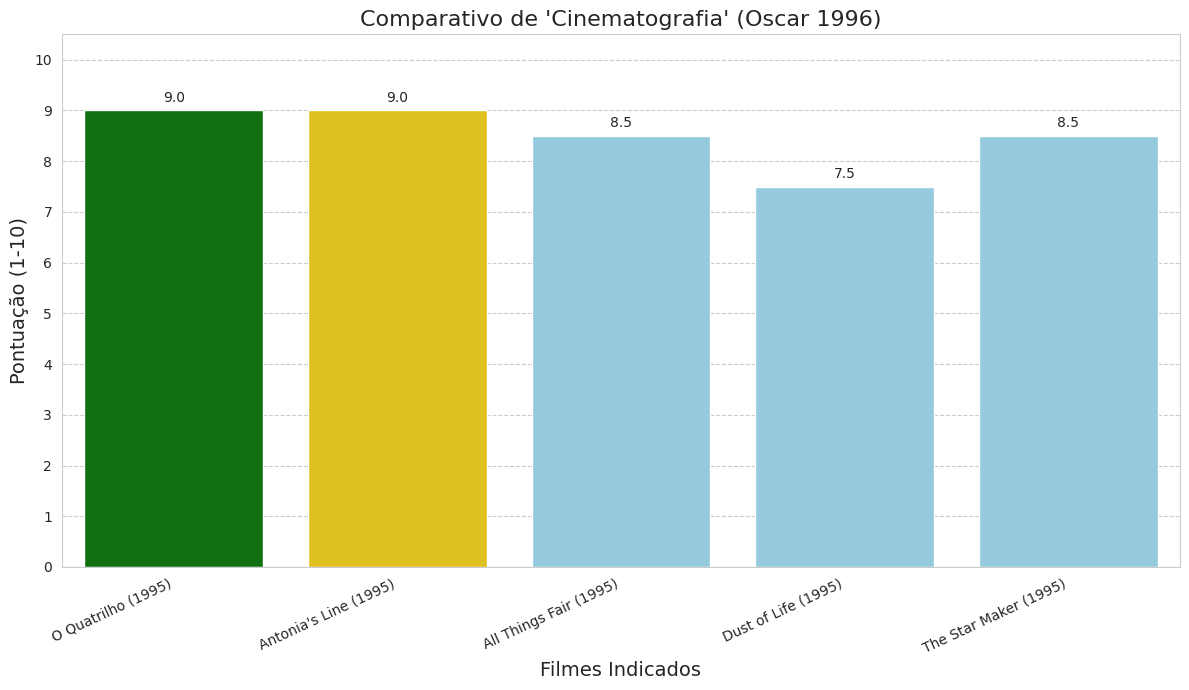

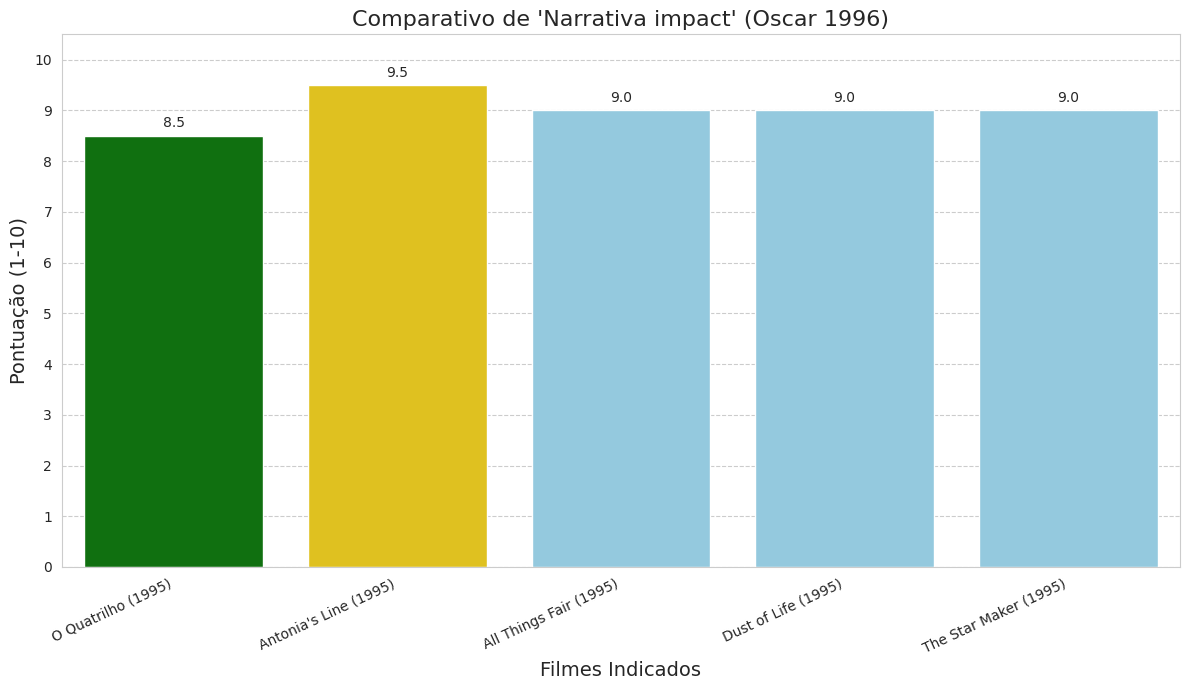

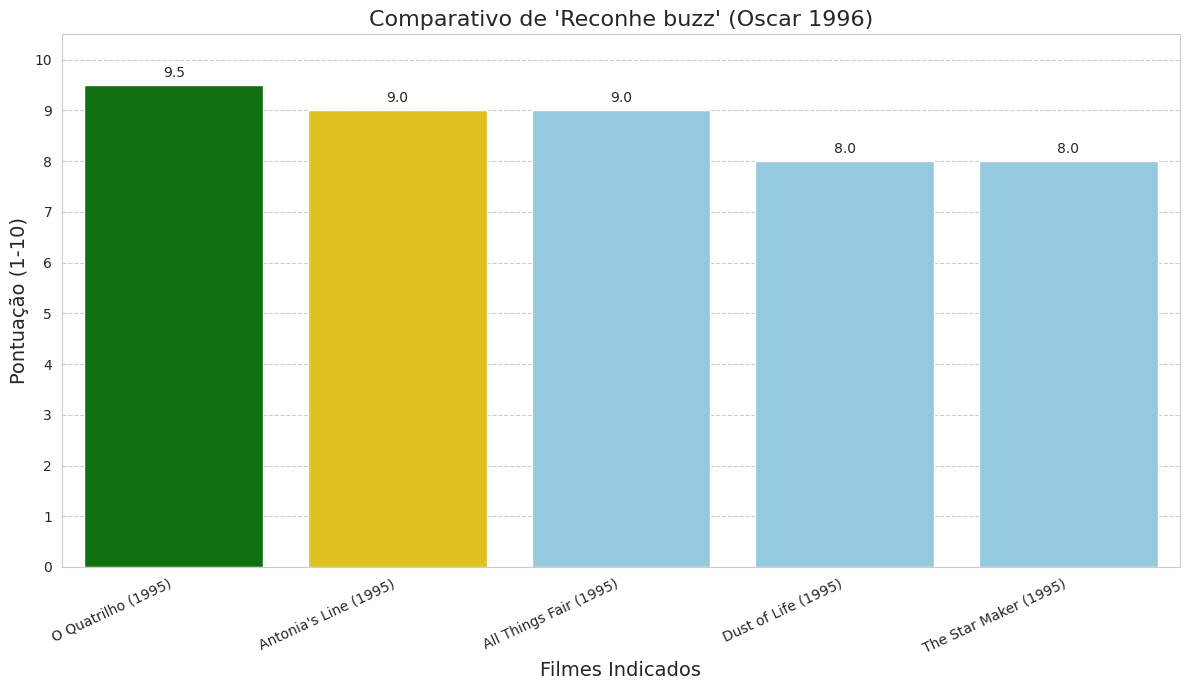

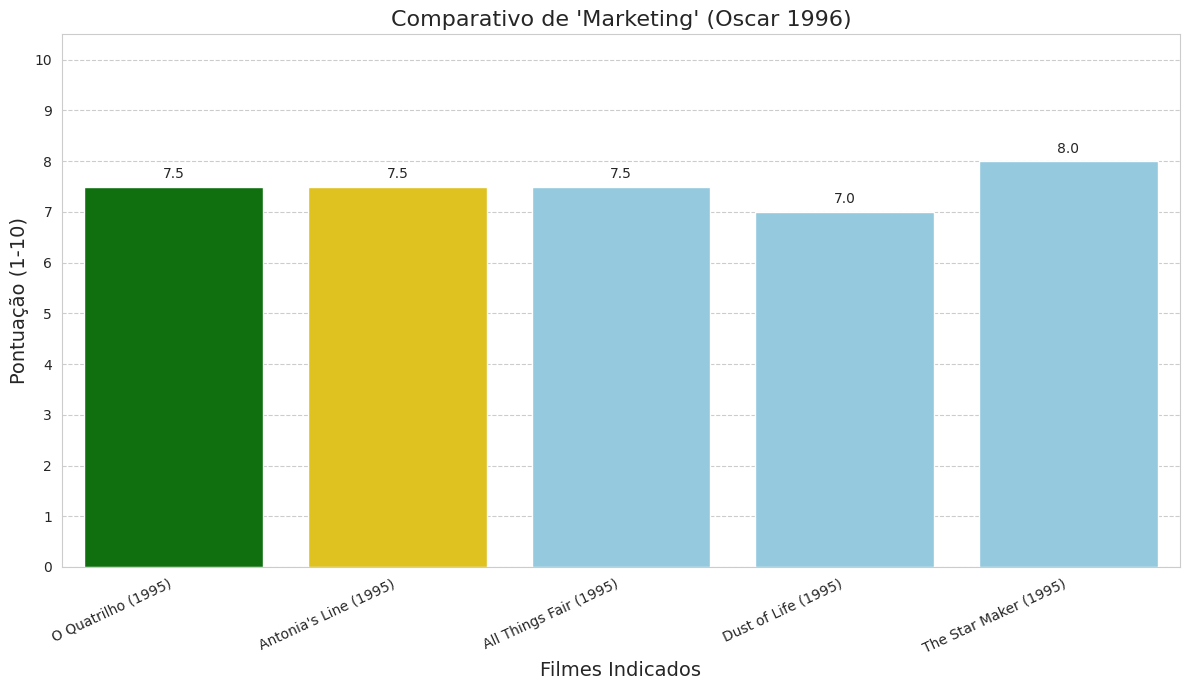

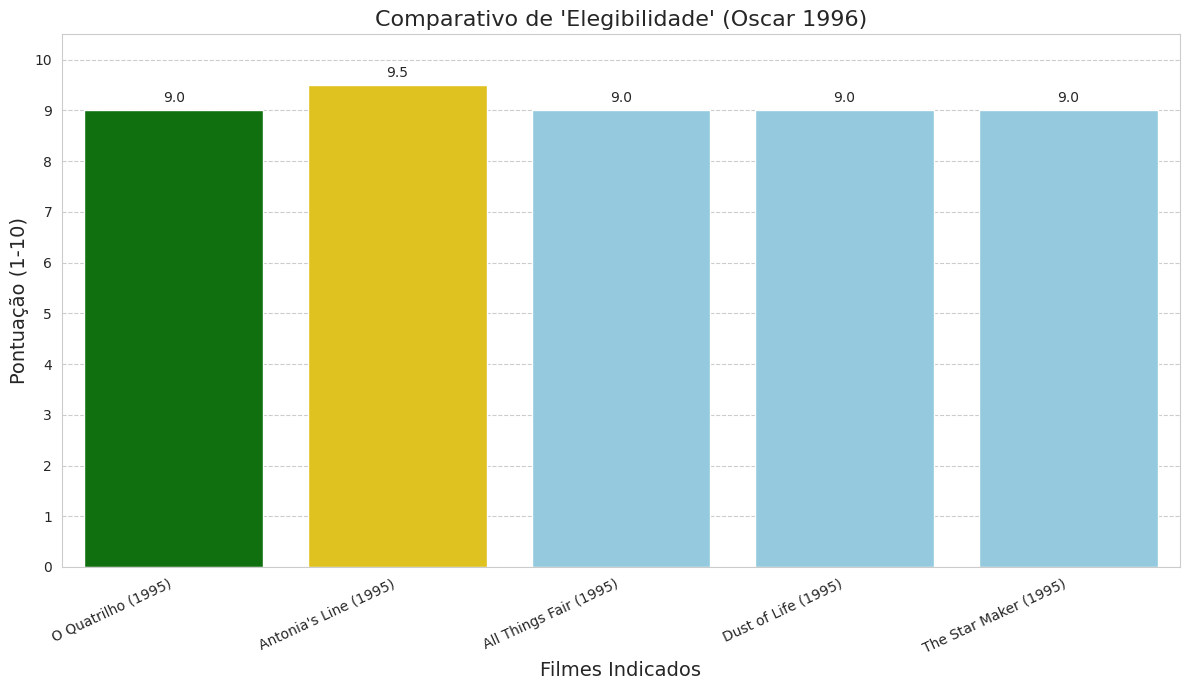

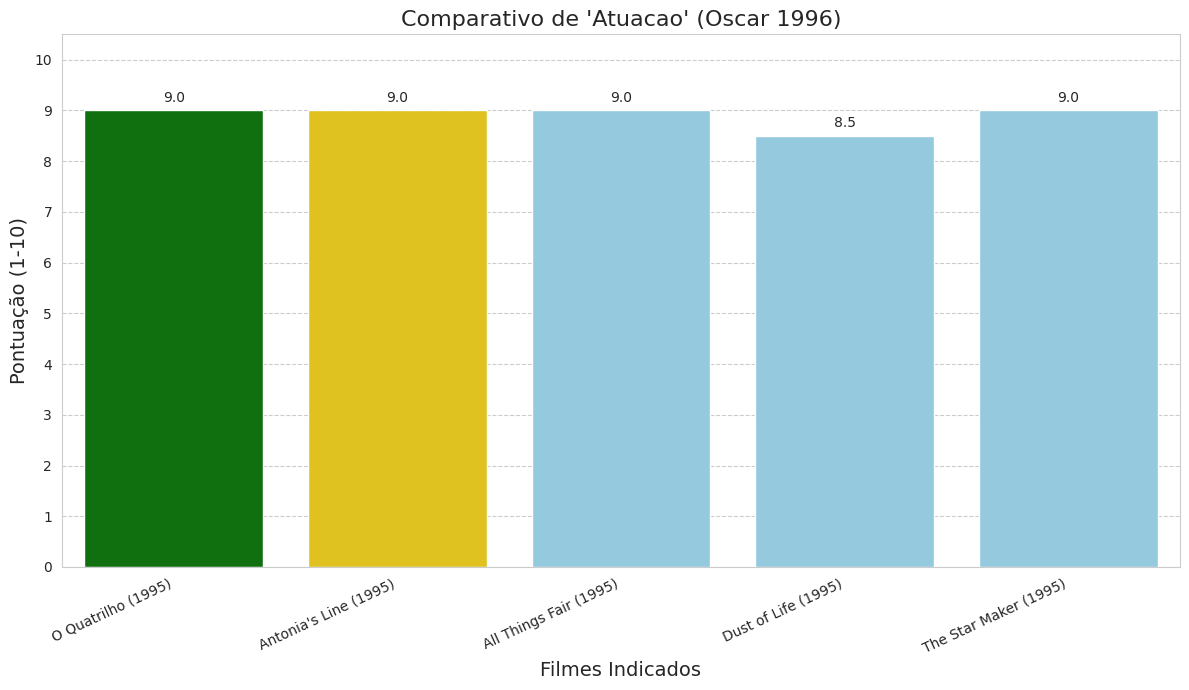


Legenda de cores dos gráficos:
🟩 Verde: O Quatrilho
🌟 Dourado: Filme Vencedor da Categoria
🟦 Azul Claro: Outros Concorrentes


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie # Certifique-se que já importou antes
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Oscar 1996 (Filmes de 1995) ---")
    print("Foco: O Quatrilho e seus concorrentes")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    filmes_para_analise_1996_data = {
        'titulo_referencia': [
            "O Quatrilho",
            "Antonia's Line", # Nome internacional de A Excêntrica Família de Antônia
            "All Things Fair",
            "Dust of Life",
            "The Star Maker"  # Nome internacional de O Homem das Estrelas
        ],
        'id_tmdb': [67617, 880, 27098, 124617, 37975],
        'pais_filme': ["Brasil", "Países Baixos", "Suécia", "Argélia", "Itália"], # Verifique o país de "Dust of Life" se necessário
        'vencedor_categoria': [False, True, False, False, False]
    }
    df_lista_filmes_1996 = pd.DataFrame(filmes_para_analise_1996_data)

    # Reutilizando a função de busca do TMDB
    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""):
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except:
                        pass
                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0}

    print("Buscando dados do TMDB para os filmes do Oscar 1996...")
    dados_tmdb_coletados_1996 = []
    for index, row in df_lista_filmes_1996.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        data['id_tmdb'] = row['id_tmdb']
        data['pais_filme'] = row['pais_filme']
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia']
        dados_tmdb_coletados_1996.append(data)
        time.sleep(0.3)

    df_tmdb_1996 = pd.DataFrame(dados_tmdb_coletados_1996)
    print("\nDados coletados do TMDB:")
    print(df_tmdb_1996[['id_tmdb', 'titulo_tmdb', 'ano_lancamento_tmdb', 'pais_filme']].head().to_string())

    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")
    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    colunas_metricas_cat_csv_originais = [
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True)
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int)

    ids_para_analise_1996 = df_lista_filmes_1996['id_tmdb'].tolist()

    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]
    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv

    df_metricas_csv_filtrado_1996 = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise_1996)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado_1996) < len(ids_para_analise_1996):
        ids_encontrados_csv_1996 = df_metricas_csv_filtrado_1996['id'].unique()
        ids_faltantes_1996 = [id_tmdb for id_tmdb in ids_para_analise_1996 if id_tmdb not in ids_encontrados_csv_1996]
        print(f"⚠️ Atenção: {len(ids_faltantes_1996)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes_1996}")

    print(f"\nMétricas do seu CSV para os filmes selecionados de 1996 (antes do merge):")
    print(df_metricas_csv_filtrado_1996.head().to_string())

    df_analise_1996 = pd.merge(
        df_tmdb_1996,
        df_metricas_csv_filtrado_1996,
        left_on='id_tmdb',
        right_on='id',
        how='left'
    )
    df_analise_1996.drop(columns=['id', 'title'], inplace=True, errors='ignore')

    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")
    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)): return "N/A"
        if score == 0: return "N/A"
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv:
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_1996.columns:
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_1996[col_categorica_nome] = df_analise_1996[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_1996 para categorização (pós-merge).")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA E GRÁFICOS
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA E GRÁFICOS - OSCAR 1996 (Filmes de 1995) ---")
    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_1996.columns:
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_1996.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_1996.columns]

    if not df_analise_1996.empty:
        df_display_1996 = df_analise_1996[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display_1996.columns:
            df_display_1996['orcamento_tmdb'] = df_display_1996['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display_1996.columns:
            df_display_1996['receita_tmdb'] = df_display_1996['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display_1996.columns:
             df_display_1996['media_votos_tmdb'] = df_display_1996['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        def sort_order_1996(row):
            if row['id_tmdb'] == 67617: return 0 # O Quatrilho
            if row['vencedor_categoria']: return 1
            return 2

        df_display_1996['ordem_sort'] = df_display_1996.apply(sort_order_1996, axis=1)
        df_display_sorted_1996 = df_display_1996.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print("\n--- Tabela Comparativa (Oscar 1996) ---")
        print(df_display_sorted_1996.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Oscar 1996) ---")
        quatrilho_row = df_analise_1996[df_analise_1996['id_tmdb'] == 67617]
        vencedor_1996_row = df_analise_1996[df_analise_1996['vencedor_categoria'] == True]

        if not quatrilho_row.empty:
            titulo_quatrilho = quatrilho_row['titulo_referencia'].iloc[0]
            print(f"\n🇧🇷 {titulo_quatrilho} (Brasil):")
            print(f"   - Média de Votos TMDB: {quatrilho_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in quatrilho_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = quatrilho_row[col_num].iloc[0]
                    valor_cat = quatrilho_row[col_cat_gerada].iloc[0] if col_cat_gerada in quatrilho_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if not vencedor_1996_row.empty:
            titulo_vencedor = vencedor_1996_row['titulo_referencia'].iloc[0]
            print(f"\n🏆 Vencedor: {titulo_vencedor} ({vencedor_1996_row['pais_filme'].iloc[0]}):")
            print(f"   - Média de Votos TMDB: {vencedor_1996_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in vencedor_1996_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = vencedor_1996_row[col_num].iloc[0]
                    valor_cat = vencedor_1996_row[col_cat_gerada].iloc[0] if col_cat_gerada in vencedor_1996_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if colunas_num_reais_no_csv:
            print("\n📊 Comparativo de Médias das Métricas Personalizadas (entre os filmes de 1996 no seu CSV):")
            df_com_metricas_csv_1996 = df_analise_1996.dropna(subset=colunas_num_reais_no_csv) # Apenas filmes com todas as métricas
            if not df_com_metricas_csv_1996.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_csv_1996.columns:
                        scores_validos = df_com_metricas_csv_1996[pd.to_numeric(df_com_metricas_csv_1996[col_num], errors='coerce').fillna(0) > 0][col_num]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0)")
            else:
                print("   Não há filmes com todas as métricas do CSV preenchidas para calcular médias agregadas.")

        # --- GRÁFICOS COMPARATIVOS ---
        print("\n\n--- 📊 Gerando Gráficos Comparativos para Oscar 1996 ---")
        if colunas_num_reais_no_csv: # Apenas se houver métricas para plotar
            df_plot_1996 = df_analise_1996.copy()

            def criar_titulo_display_grafico_1996(row):
                titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
                ano = row.get('ano_lancamento_tmdb', '')
                return f"{titulo} ({ano if ano else 'N/A'})" # Adiciona ano ao título do gráfico

            df_plot_1996['titulo_display_grafico'] = df_plot_1996.apply(criar_titulo_display_grafico_1996, axis=1)

            cores_barras_1996 = []
            id_quatrilho = 67617
            # O ID do vencedor é 880 (Antonia's Line)

            for index_plot, row_plot in df_plot_1996.iterrows():
                if row_plot['id_tmdb'] == id_quatrilho:
                    cores_barras_1996.append('green')
                elif row_plot['vencedor_categoria'] == True:
                    cores_barras_1996.append('gold')
                else:
                    cores_barras_1996.append('skyblue')

            for metrica in colunas_num_reais_no_csv:
                if metrica in df_plot_1996.columns and df_plot_1996[metrica].notna().any() and (df_plot_1996[metrica] > 0).any(): # Plotar apenas se houver dados > 0
                    plt.figure(figsize=(12, 7))

                    # Ordenar para o gráfico ou usar a ordem definida
                    df_plot_sorted_metric = df_plot_1996.sort_values(by='id_tmdb',
                                                                    key=lambda x: x.map({id_quatrilho:0, 880:1}.get).fillna(2))


                    # Recriar cores_barras_1996 para a ordem do df_plot_sorted_metric
                    cores_barras_sorted_1996 = []
                    for _, row_sorted in df_plot_sorted_metric.iterrows():
                        if row_sorted['id_tmdb'] == id_quatrilho:
                            cores_barras_sorted_1996.append('green')
                        elif row_sorted['vencedor_categoria'] == True:
                            cores_barras_sorted_1996.append('gold')
                        else:
                            cores_barras_sorted_1996.append('skyblue')


                    barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted_metric,
                                          palette=cores_barras_sorted_1996, hue='titulo_display_grafico', dodge=False, legend=False)

                    plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Oscar 1996)", fontsize=16)
                    plt.xlabel("Filmes Indicados", fontsize=14)
                    plt.ylabel("Pontuação (1-10)", fontsize=14)
                    plt.xticks(rotation=25, ha="right", fontsize=10)
                    plt.yticks(np.arange(0, 11, 1)) # Eixo Y de 0 a 10
                    plt.ylim(0, 10.5)
                    plt.grid(axis='y', linestyle='--')

                    for p in barplot.patches:
                        if p.get_height() > 0: # Só anota se a altura for maior que 0
                            barplot.annotate(format(p.get_height(), '.1f'),
                                           (p.get_x() + p.get_width() / 2., p.get_height()),
                                           ha = 'center', va = 'center',
                                           xytext = (0, 9),
                                           textcoords = 'offset points', fontsize=10)

                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"⚠️ A métrica '{metrica}' não possui dados válidos (>0) para plotagem ou não foi encontrada (pós-merge).")

            print("\nLegenda de cores dos gráficos:")
            print("🟩 Verde: O Quatrilho")
            print("🌟 Dourado: Filme Vencedor da Categoria")
            print("🟦 Azul Claro: Outros Concorrentes")
        else:
            print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada para gerar os gráficos.")

    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_1996 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")
    print("   Por favor, execute a célula anterior para carregar o CSV ou verifique o caminho e o arquivo.")

### 👑(Oscar 1998)

--- Iniciando Análise Comparativa: Oscar 1998 (Filmes de 1997) ---
Foco: O Que É Isso, Companheiro? e seus concorrentes

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes do Oscar 1998...
Buscando: O Que É Isso, Companheiro? (ID: 21253)
Buscando: Karakter (ID: 17139)
Buscando: Jenseits der Stille (ID: 312)
Buscando: Vor (ID: 46187)
Buscando: Secretos del corazón (ID: 92603)

Dados coletados do TMDB:
   id_tmdb                 titulo_tmdb  ano_lancamento_tmdb     pais_filme
0    21253  O Que é Isso, Companheiro?                 1997         Brasil
1    17139                     Caráter                 1997  Países Baixos
2      312         Jenseits der Stille                 1996       Alemanha
3    46187                         Вор                 1997         Rússia
4    92603        Secretos del corazón                 1997        Espanha


--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---

Métricas do seu CSV para os

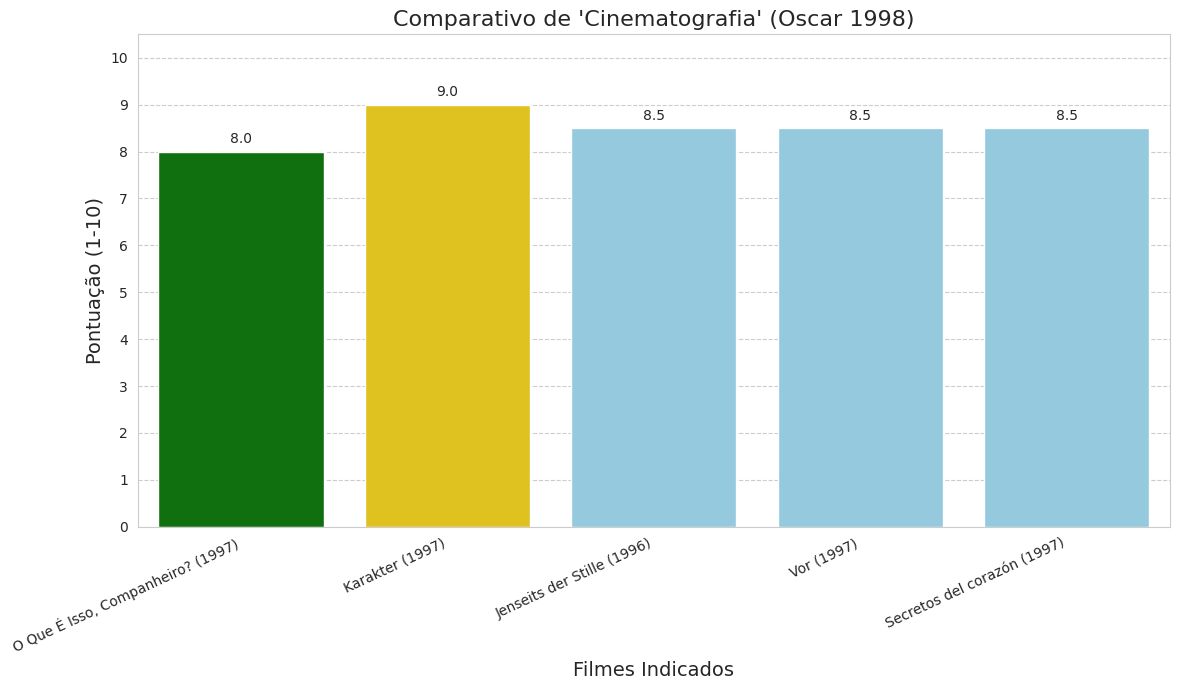

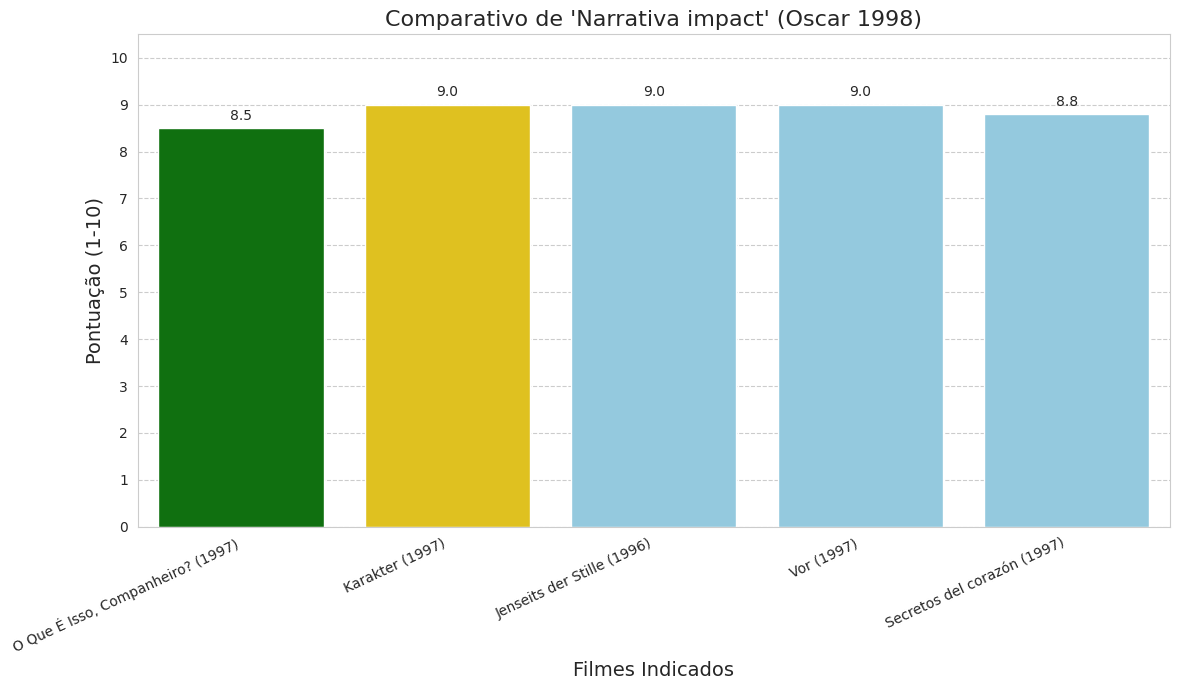

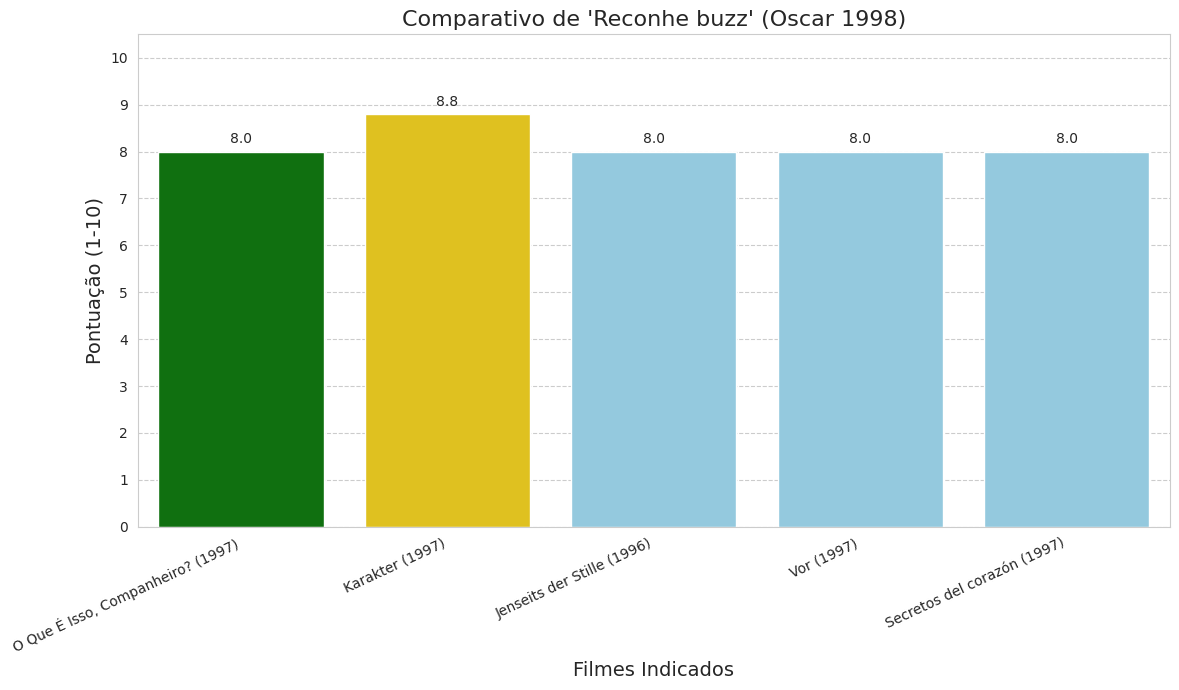

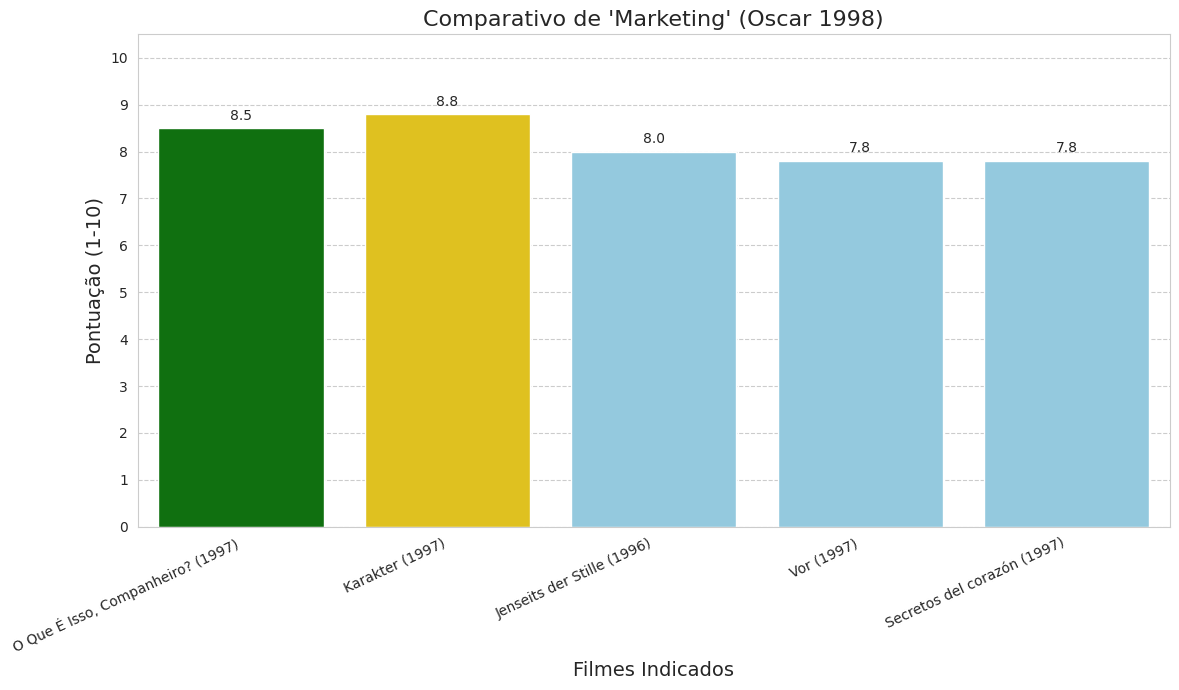

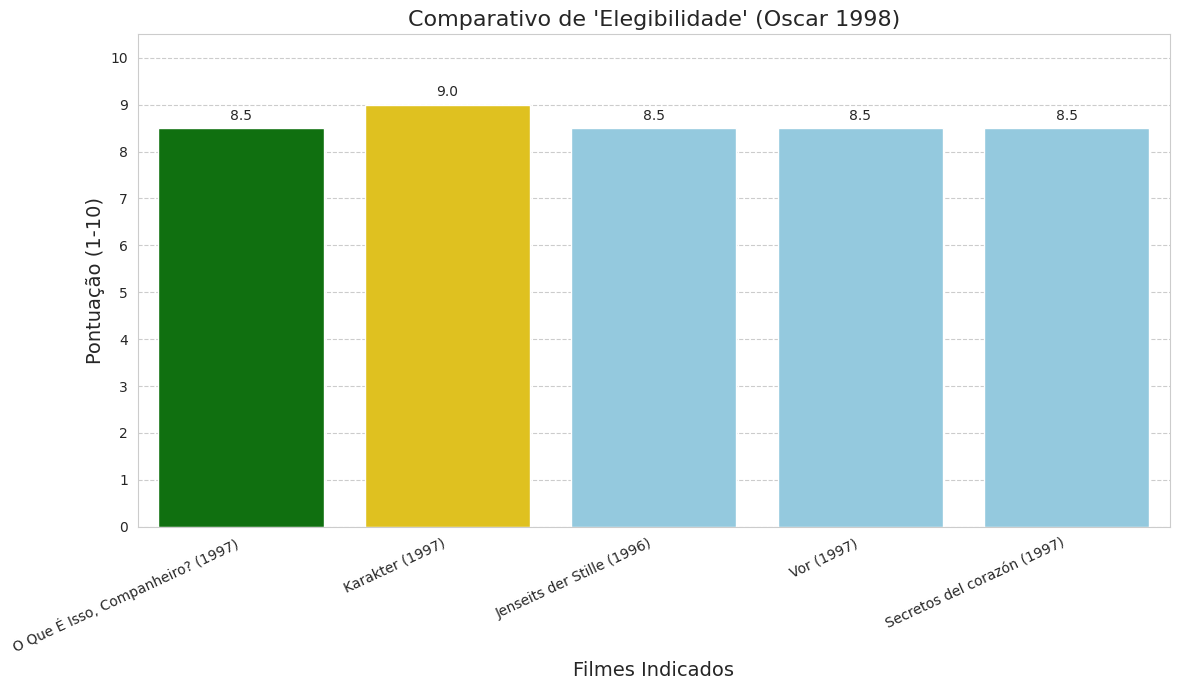

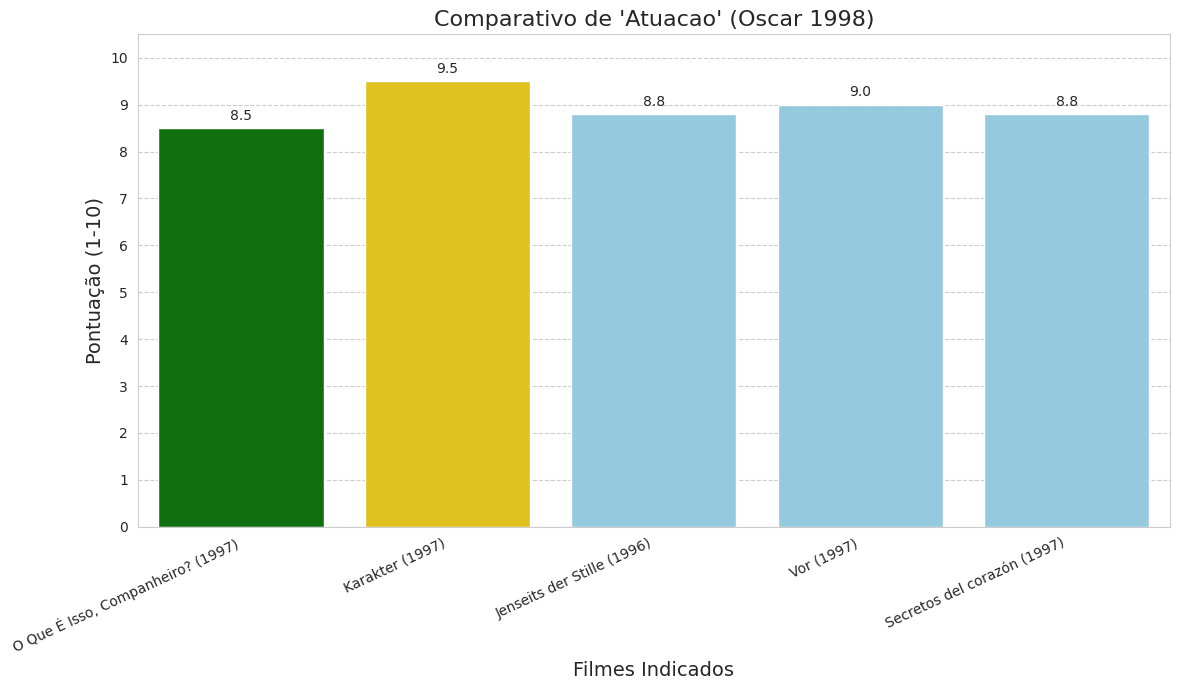


Legenda de cores dos gráficos:
🟩 Verde: O Que É Isso, Companheiro?
🌟 Dourado: Filme Vencedor da Categoria
🟦 Azul Claro: Outros Concorrentes


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie # Certifique-se que já importou antes
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Oscar 1998 (Filmes de 1997) ---")
    print("Foco: O Que É Isso, Companheiro? e seus concorrentes")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    filmes_para_analise_1998_data = {
        'titulo_referencia': [
            "O Que É Isso, Companheiro?",
            "Karakter", # Caráter
            "Jenseits der Stille", # A Música e o Silêncio / Beyond Silence
            "Vor", # O Ladrão / The Thief
            "Secretos del corazón" # Segredos do Coração / Secrets of the Heart
        ],
        'id_tmdb': [21253, 17139, 312, 46187, 92603], # Usando os IDs da sua lista validada
        'pais_filme': ["Brasil", "Países Baixos", "Alemanha", "Rússia", "Espanha"],
        'vencedor_categoria': [False, True, False, False, False]
    }
    df_lista_filmes_1998 = pd.DataFrame(filmes_para_analise_1998_data)

    # Reutilizando a função de busca do TMDB
    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""): # Adicionado titulo_ref para logs
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except:
                        pass # Mantém 0 se falhar
                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0}

    print("Buscando dados do TMDB para os filmes do Oscar 1998...")
    dados_tmdb_coletados_1998 = []
    for index, row in df_lista_filmes_1998.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        data['id_tmdb'] = row['id_tmdb'] # Garante o ID original
        data['pais_filme'] = row['pais_filme']
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia'] # Adiciona o título de referência
        dados_tmdb_coletados_1998.append(data)
        time.sleep(0.3)

    df_tmdb_1998 = pd.DataFrame(dados_tmdb_coletados_1998)
    print("\nDados coletados do TMDB:")
    print(df_tmdb_1998[['id_tmdb', 'titulo_tmdb', 'ano_lancamento_tmdb', 'pais_filme']].head().to_string())

    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")
    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    # Se você também tiver as colunas categóricas descritivas no CSV e quiser usá-las:
    colunas_metricas_cat_csv_originais = [
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True) # Remove linhas onde o ID TMDB do seu CSV é NaN
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int) # Converte ID para int

    ids_para_analise_1998 = df_lista_filmes_1998['id_tmdb'].tolist()

    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]
    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv

    df_metricas_csv_filtrado_1998 = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise_1998)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado_1998) < len(ids_para_analise_1998):
        ids_encontrados_csv_1998 = df_metricas_csv_filtrado_1998['id'].unique()
        ids_faltantes_1998 = [id_tmdb for id_tmdb in ids_para_analise_1998 if id_tmdb not in ids_encontrados_csv_1998]
        print(f"⚠️ Atenção: {len(ids_faltantes_1998)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes_1998}")

    print(f"\nMétricas do seu CSV para os filmes selecionados de 1998 (antes do merge):")
    # Mostra apenas algumas colunas para economizar espaço, ajuste se quiser ver mais
    cols_preview_csv = ['id', 'title'] + [col for col in colunas_num_reais_no_csv if col in df_metricas_csv_filtrado_1998.columns][:2]
    print(df_metricas_csv_filtrado_1998[cols_preview_csv].head().to_string())

    df_analise_1998 = pd.merge(
        df_tmdb_1998,
        df_metricas_csv_filtrado_1998,
        left_on='id_tmdb', # Coluna de ID do df_tmdb_1998
        right_on='id',     # Coluna de ID do df_metricas_csv_filtrado_1998
        how='left'
    )
    # Remove a coluna 'id' duplicada do CSV após o merge e a 'title' do CSV se não for mais necessária
    df_analise_1998.drop(columns=['id', 'title'], inplace=True, errors='ignore')


    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")
    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)): return "N/A"
        if score == 0: return "N/A" # Se você usa 0 como "não informado" no CSV
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv:
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_1998.columns: # Verifica se a coluna existe no df final
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_1998[col_categorica_nome] = df_analise_1998[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_1998 para categorização (pós-merge).")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA E GRÁFICOS
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA E GRÁFICOS - OSCAR 1998 (Filmes de 1997) ---")

    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    # Adicionar as colunas de métricas numéricas e as categóricas GERADAS
    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_1998.columns:
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_1998.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_1998.columns]

    if not df_analise_1998.empty:
        df_display_1998 = df_analise_1998[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display_1998.columns:
            df_display_1998['orcamento_tmdb'] = df_display_1998['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display_1998.columns:
            df_display_1998['receita_tmdb'] = df_display_1998['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display_1998.columns:
             df_display_1998['media_votos_tmdb'] = df_display_1998['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        def sort_order_1998(row):
            if row['id_tmdb'] == 21253: return 0 # O Que É Isso, Companheiro?
            if row['vencedor_categoria']: return 1
            return 2

        df_display_1998['ordem_sort'] = df_display_1998.apply(sort_order_1998, axis=1)
        df_display_sorted_1998 = df_display_1998.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print("\n--- Tabela Comparativa (Oscar 1998) ---")
        print(df_display_sorted_1998.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Oscar 1998) ---")
        companheiro_row = df_analise_1998[df_analise_1998['id_tmdb'] == 21253]
        vencedor_1998_row = df_analise_1998[df_analise_1998['vencedor_categoria'] == True]

        if not companheiro_row.empty:
            titulo_companheiro = companheiro_row['titulo_referencia'].iloc[0]
            print(f"\n🇧🇷 {titulo_companheiro} (Brasil):")
            print(f"   - Média de Votos TMDB: {companheiro_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in companheiro_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = companheiro_row[col_num].iloc[0]
                    valor_cat = companheiro_row[col_cat_gerada].iloc[0] if col_cat_gerada in companheiro_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if not vencedor_1998_row.empty:
            titulo_vencedor = vencedor_1998_row['titulo_referencia'].iloc[0]
            print(f"\n🏆 Vencedor: {titulo_vencedor} ({vencedor_1998_row['pais_filme'].iloc[0]}):")
            print(f"   - Média de Votos TMDB: {vencedor_1998_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in vencedor_1998_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = vencedor_1998_row[col_num].iloc[0]
                    valor_cat = vencedor_1998_row[col_cat_gerada].iloc[0] if col_cat_gerada in vencedor_1998_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if colunas_num_reais_no_csv:
            print("\n📊 Comparativo de Médias das Métricas Personalizadas (entre os filmes de 1998 no seu CSV):")
            df_com_metricas_csv_1998 = df_analise_1998.dropna(subset=colunas_num_reais_no_csv)
            if not df_com_metricas_csv_1998.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_csv_1998.columns:
                        scores_validos = df_com_metricas_csv_1998[pd.to_numeric(df_com_metricas_csv_1998[col_num], errors='coerce').fillna(0) > 0][col_num]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                             print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0)")
            else:
                print("   Não há filmes com todas as métricas do CSV preenchidas para calcular médias agregadas.")

        # --- GRÁFICOS COMPARATIVOS ---
        print("\n\n--- 📊 Gerando Gráficos Comparativos para Oscar 1998 ---")
        # Usar 'colunas_num_reais_no_csv' que contém as colunas que realmente existem no seu CSV e foram mergidas
        if colunas_num_reais_no_csv:
            df_plot_1998 = df_analise_1998.copy()

            def criar_titulo_display_grafico_1998(row):
                titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
                ano = row.get('ano_lancamento_tmdb', '')
                return f"{titulo} ({ano if ano else 'N/A'})"

            df_plot_1998['titulo_display_grafico'] = df_plot_1998.apply(criar_titulo_display_grafico_1998, axis=1)

            id_companheiro = 21253
            id_vencedor_1998 = 17139 # Karakter

            # Ordenar o DataFrame para o gráfico de forma consistente
            # Ordem: Filme Brasileiro, Vencedor, Outros
            def get_sort_key_grafico(row):
                if row['id_tmdb'] == id_companheiro: return 0
                if row['vencedor_categoria'] == True: return 1
                return 2
            df_plot_1998['sort_key_grafico'] = df_plot_1998.apply(get_sort_key_grafico, axis=1)
            df_plot_sorted_1998_grafico = df_plot_1998.sort_values(by='sort_key_grafico')


            cores_barras_1998 = []
            for _, row_plot in df_plot_sorted_1998_grafico.iterrows(): # Itera sobre o DF ordenado para as cores
                if row_plot['id_tmdb'] == id_companheiro:
                    cores_barras_1998.append('green')
                elif row_plot['vencedor_categoria'] == True: # ou row_plot['id_tmdb'] == id_vencedor_1998
                    cores_barras_1998.append('gold')
                else:
                    cores_barras_1998.append('skyblue')

            for metrica in colunas_num_reais_no_csv: # Itera sobre as métricas que realmente vieram do CSV
                if metrica in df_plot_sorted_1998_grafico.columns and df_plot_sorted_1998_grafico[metrica].notna().any() and (df_plot_sorted_1998_grafico[metrica] > 0).any():
                    plt.figure(figsize=(12, 7))
                    barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted_1998_grafico,
                                          palette=cores_barras_1998, hue='titulo_display_grafico', dodge=False, legend=False)

                    plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Oscar 1998)", fontsize=16)
                    plt.xlabel("Filmes Indicados", fontsize=14)
                    plt.ylabel("Pontuação (1-10)", fontsize=14)
                    plt.xticks(rotation=25, ha="right", fontsize=10)
                    plt.yticks(np.arange(0, 11, 1))
                    plt.ylim(0, 10.5)
                    plt.grid(axis='y', linestyle='--')

                    for p in barplot.patches:
                        if p.get_height() > 0:
                            barplot.annotate(format(p.get_height(), '.1f'),
                                           (p.get_x() + p.get_width() / 2., p.get_height()),
                                           ha = 'center', va = 'center',
                                           xytext = (0, 9),
                                           textcoords = 'offset points', fontsize=10)

                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"⚠️ A métrica '{metrica}' não possui dados válidos (>0) para plotagem ou não foi encontrada (pós-merge).")

            print("\nLegenda de cores dos gráficos:")
            print("🟩 Verde: O Que É Isso, Companheiro?")
            print("🌟 Dourado: Filme Vencedor da Categoria")
            print("🟦 Azul Claro: Outros Concorrentes")
        else:
            print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada para gerar os gráficos.")
    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_1998 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")

### 👑(Oscar 1999)

--- Iniciando Análise Comparativa: Oscar 1999 (Filmes de 1998) ---
Foco: Central do Brasil e seus concorrentes

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes do Oscar 1999...
Buscando: Central do Brasil (ID: 666)
Buscando: La vita è bella (ID: 637)
Buscando: El abuelo (ID: 69851)
Buscando: Bacheha-ye Aseman (ID: 21334)
Buscando: Tango (ID: 24242)
🚨 Erro ao buscar ID 24242 (Tango) no TMDB: The resource you requested could not be found.

Dados coletados do TMDB:
   id_tmdb        titulo_tmdb  ano_lancamento_tmdb pais_filme
0      666  Central do Brasil                 1998     Brasil
1      637      A Vida é Bela                 1997     Itália
2    69851          El abuelo                 1998    Espanha
3    21334  Filhos do Paraíso                 1997        Irã
4    24242    TMDB_ERRO-Tango                    0  Argentina


--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---
⚠️ Atenção: 1 filme(s) não encontrado(s)

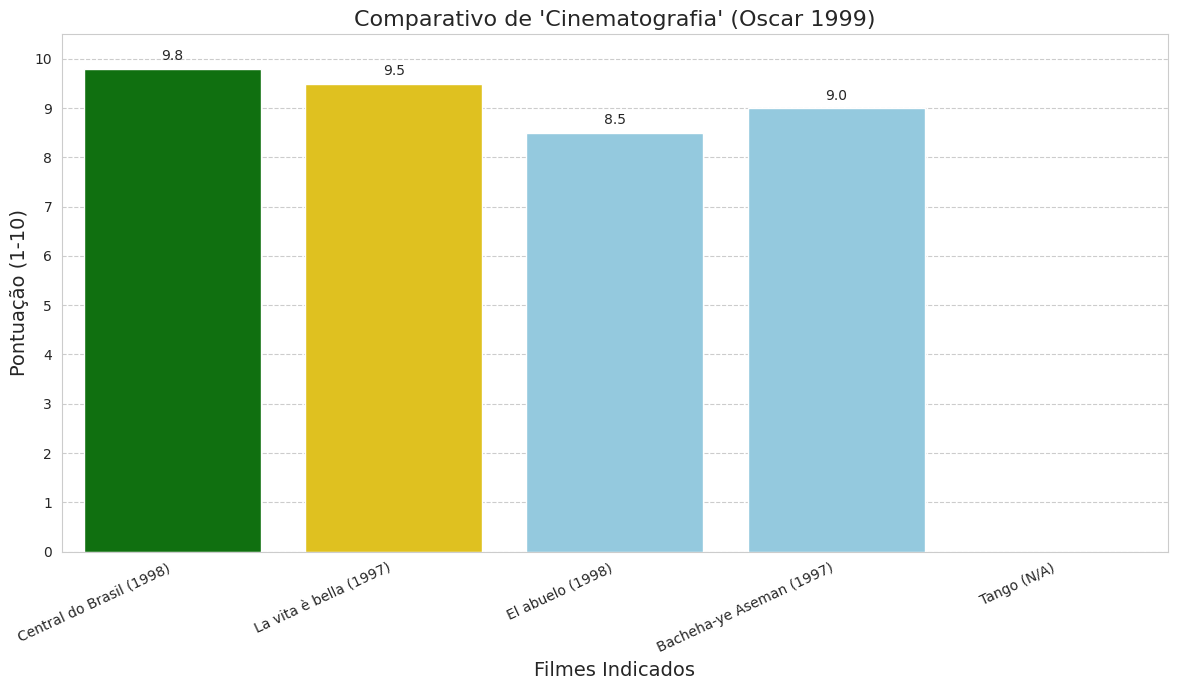

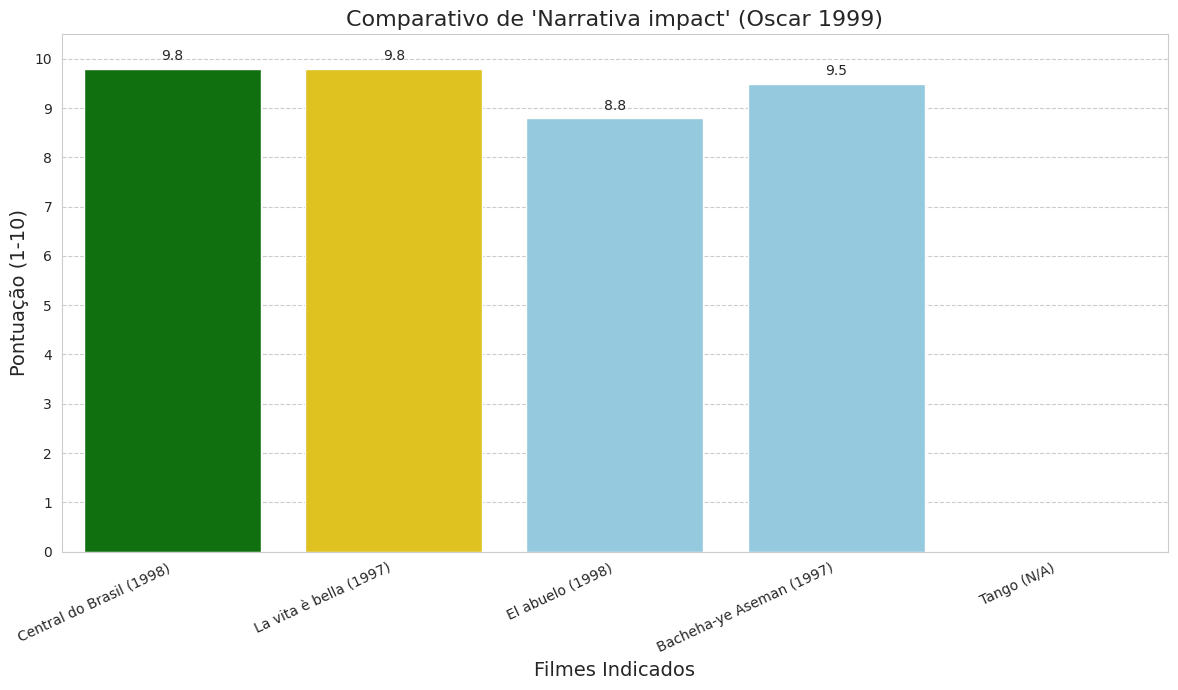

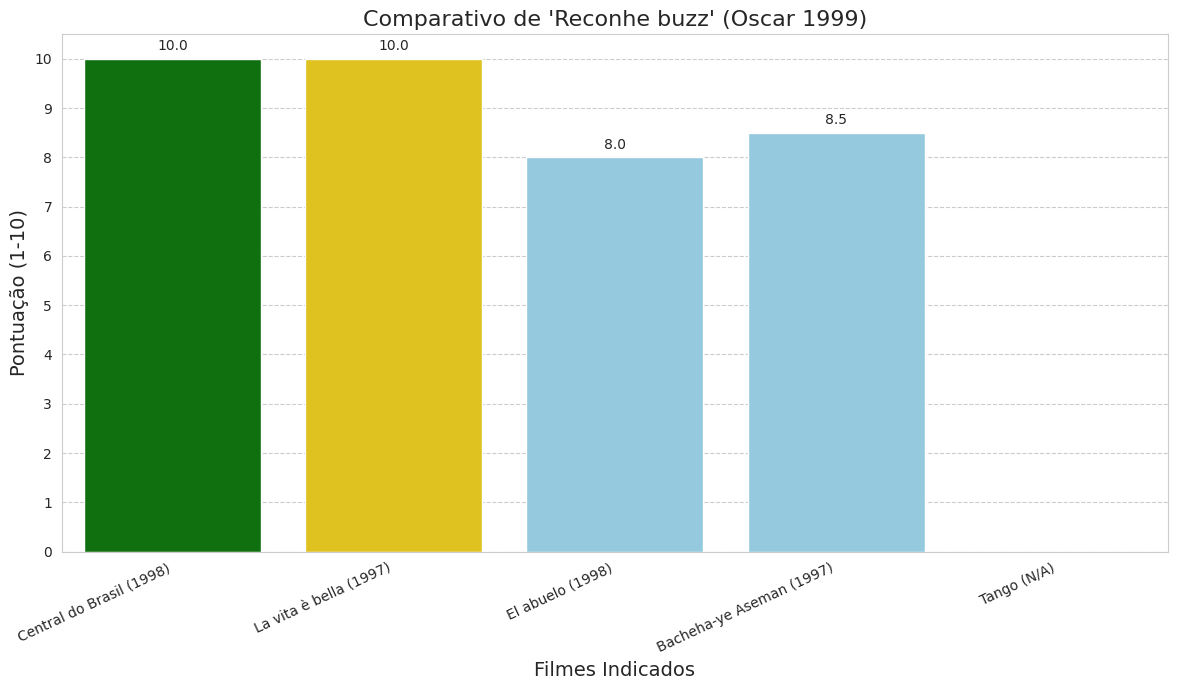

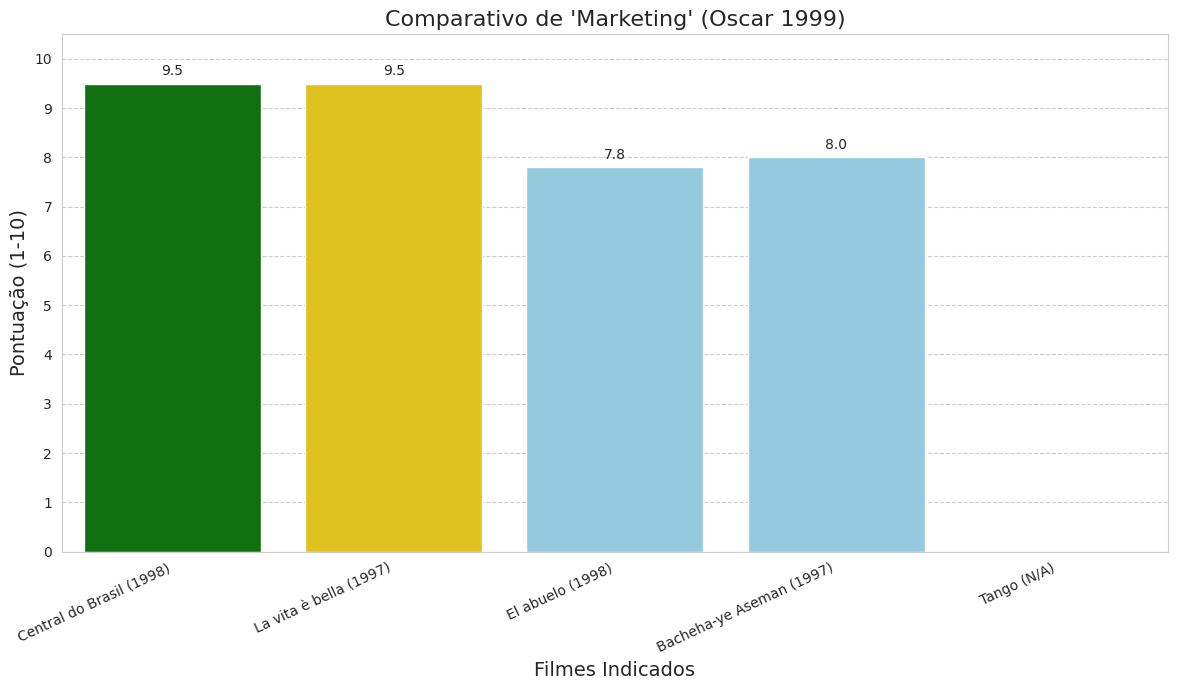

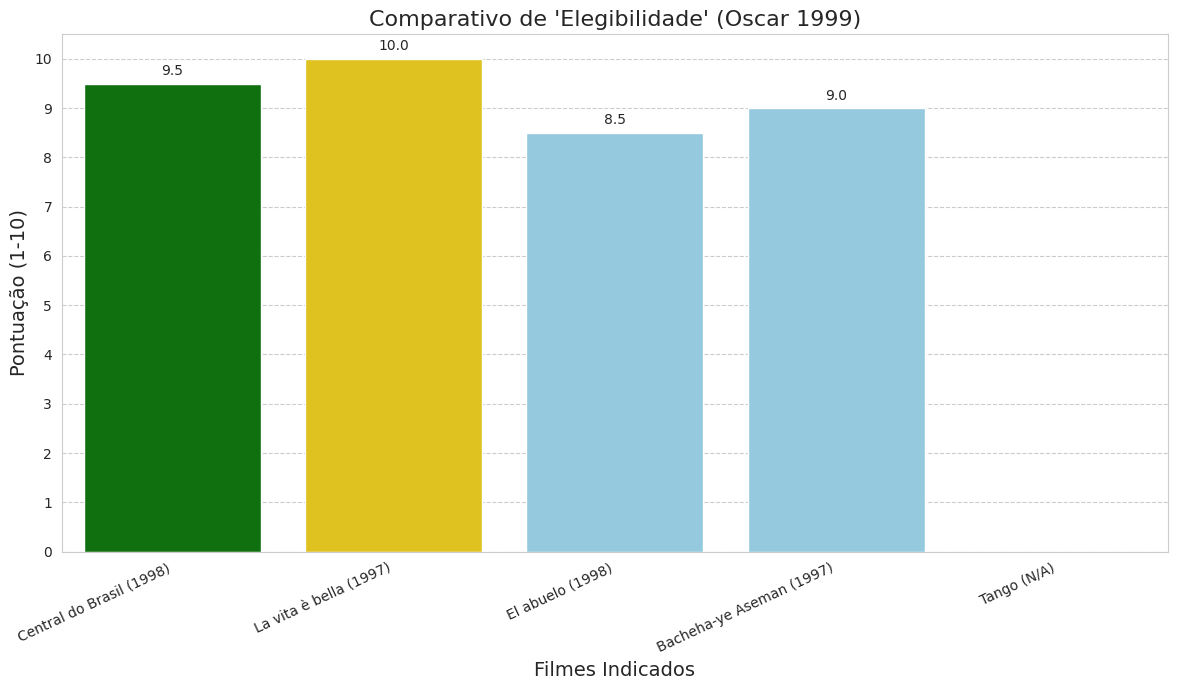

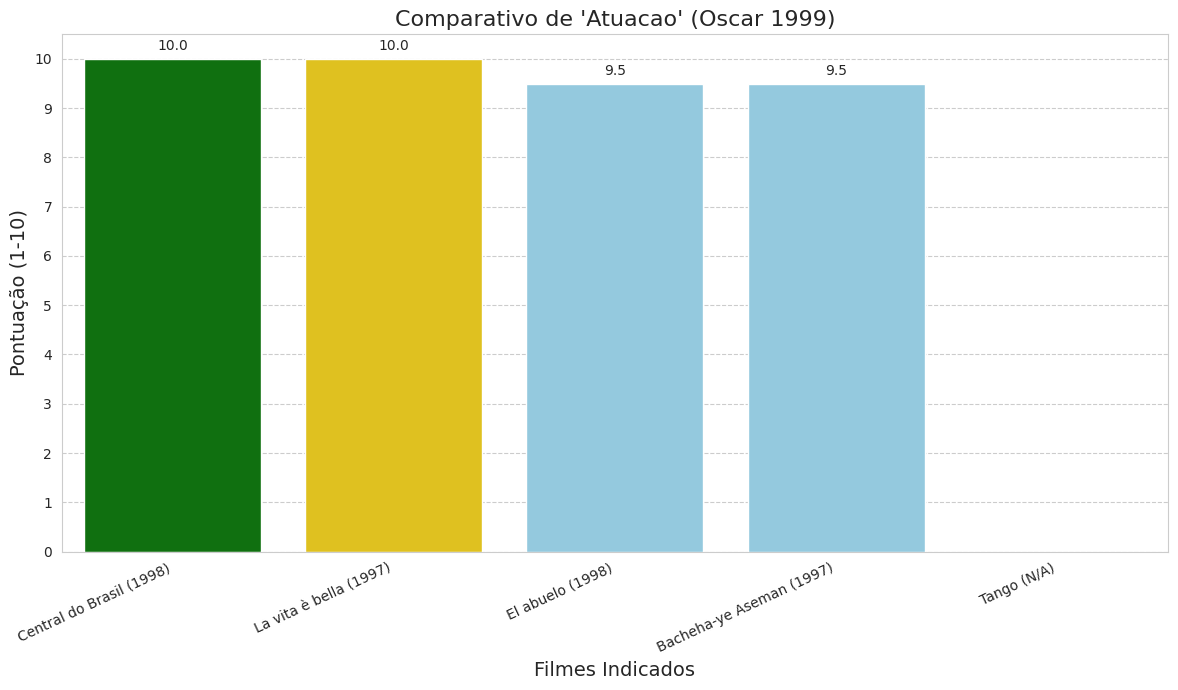


Legenda de cores dos gráficos:
🟩 Verde: Central do Brasil
🌟 Dourado: Filme Vencedor da Categoria
🟦 Azul Claro: Outros Concorrentes


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie # Certifique-se que já importou antes
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Oscar 1999 (Filmes de 1998) ---")
    print("Foco: Central do Brasil e seus concorrentes")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    filmes_para_analise_1999_data = {
        'titulo_referencia': [
            "Central do Brasil",
            "La vita è bella", # A Vida é Bela
            "El abuelo", # O Avô
            "Bacheha-ye Aseman", # Filhos do Paraíso / Children of Heaven
            "Tango" # Tango (Argentina)
        ],
        'id_tmdb': [666, 637, 69851, 21334, 24242],
        'pais_filme': ["Brasil", "Itália", "Espanha", "Irã", "Argentina"],
        'vencedor_categoria': [False, True, False, False, False]
    }
    df_lista_filmes_1999 = pd.DataFrame(filmes_para_analise_1999_data)

    # Reutilizando a função de busca do TMDB
    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""):
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except:
                        pass
                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0}

    print("Buscando dados do TMDB para os filmes do Oscar 1999...")
    dados_tmdb_coletados_1999 = []
    for index, row in df_lista_filmes_1999.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        data['id_tmdb'] = row['id_tmdb']
        data['pais_filme'] = row['pais_filme']
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia']
        dados_tmdb_coletados_1999.append(data)
        time.sleep(0.3)

    df_tmdb_1999 = pd.DataFrame(dados_tmdb_coletados_1999)
    print("\nDados coletados do TMDB:")
    print(df_tmdb_1999[['id_tmdb', 'titulo_tmdb', 'ano_lancamento_tmdb', 'pais_filme']].head().to_string())

    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")
    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    colunas_metricas_cat_csv_originais = [
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True)
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int)

    ids_para_analise_1999 = df_lista_filmes_1999['id_tmdb'].tolist()

    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]
    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv

    df_metricas_csv_filtrado_1999 = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise_1999)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado_1999) < len(ids_para_analise_1999):
        ids_encontrados_csv_1999 = df_metricas_csv_filtrado_1999['id'].unique()
        ids_faltantes_1999 = [id_tmdb for id_tmdb in ids_para_analise_1999 if id_tmdb not in ids_encontrados_csv_1999]
        print(f"⚠️ Atenção: {len(ids_faltantes_1999)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes_1999}")
        print(f"   Isso pode incluir 'Tango' (ID: 24242) se não estiver no seu CSV.")


    print(f"\nMétricas do seu CSV para os filmes selecionados de 1999 (antes do merge):")
    cols_preview_csv = ['id', 'title'] + [col for col in colunas_num_reais_no_csv if col in df_metricas_csv_filtrado_1999.columns][:2]
    print(df_metricas_csv_filtrado_1999[cols_preview_csv].head().to_string())

    df_analise_1999 = pd.merge(
        df_tmdb_1999,
        df_metricas_csv_filtrado_1999,
        left_on='id_tmdb',
        right_on='id',
        how='left'
    )
    df_analise_1999.drop(columns=['id', 'title'], inplace=True, errors='ignore')

    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")
    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)): return "N/A"
        if score == 0: return "N/A"
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv:
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_1999.columns:
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_1999[col_categorica_nome] = df_analise_1999[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_1999 para categorização (pós-merge).")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA E GRÁFICOS
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA E GRÁFICOS - OSCAR 1999 (Filmes de 1998) ---")

    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_1999.columns:
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_1999.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_1999.columns]

    if not df_analise_1999.empty:
        df_display_1999 = df_analise_1999[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display_1999.columns:
            df_display_1999['orcamento_tmdb'] = df_display_1999['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display_1999.columns:
            df_display_1999['receita_tmdb'] = df_display_1999['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display_1999.columns:
             df_display_1999['media_votos_tmdb'] = df_display_1999['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        def sort_order_1999(row):
            if row['id_tmdb'] == 666: return 0 # Central do Brasil
            if row['vencedor_categoria']: return 1
            return 2

        df_display_1999['ordem_sort'] = df_display_1999.apply(sort_order_1999, axis=1)
        df_display_sorted_1999 = df_display_1999.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print("\n--- Tabela Comparativa (Oscar 1999) ---")
        print(df_display_sorted_1999.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Oscar 1999) ---")
        central_row = df_analise_1999[df_analise_1999['id_tmdb'] == 666] # Central do Brasil
        vencedor_1999_row = df_analise_1999[df_analise_1999['vencedor_categoria'] == True]

        if not central_row.empty:
            titulo_central = central_row['titulo_referencia'].iloc[0]
            print(f"\n🇧🇷 {titulo_central} (Brasil):")
            print(f"   - Média de Votos TMDB: {central_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in central_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = central_row[col_num].iloc[0]
                    valor_cat = central_row[col_cat_gerada].iloc[0] if col_cat_gerada in central_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if not vencedor_1999_row.empty:
            titulo_vencedor = vencedor_1999_row['titulo_referencia'].iloc[0]
            print(f"\n🏆 Vencedor: {titulo_vencedor} ({vencedor_1999_row['pais_filme'].iloc[0]}):")
            print(f"   - Média de Votos TMDB: {vencedor_1999_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in vencedor_1999_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = vencedor_1999_row[col_num].iloc[0]
                    valor_cat = vencedor_1999_row[col_cat_gerada].iloc[0] if col_cat_gerada in vencedor_1999_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if colunas_num_reais_no_csv:
            print("\n📊 Comparativo de Médias das Métricas Personalizadas (entre os filmes de 1999 no seu CSV):")
            df_com_metricas_csv_1999 = df_analise_1999.dropna(subset=colunas_num_reais_no_csv)
            if not df_com_metricas_csv_1999.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_csv_1999.columns:
                        scores_validos = df_com_metricas_csv_1999[pd.to_numeric(df_com_metricas_csv_1999[col_num], errors='coerce').fillna(0) > 0][col_num]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0)")
            else:
                print("   Não há filmes com todas as métricas do CSV preenchidas para calcular médias agregadas.")

        # --- GRÁFICOS COMPARATIVOS ---
        print("\n\n--- 📊 Gerando Gráficos Comparativos para Oscar 1999 ---")
        if colunas_num_reais_no_csv:
            df_plot_1999 = df_analise_1999.copy()

            def criar_titulo_display_grafico_1999(row):
                titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
                ano = row.get('ano_lancamento_tmdb', '')
                return f"{titulo} ({ano if ano else 'N/A'})"

            df_plot_1999['titulo_display_grafico'] = df_plot_1999.apply(criar_titulo_display_grafico_1999, axis=1)

            id_central = 666
            id_vencedor_1999 = 637 # A Vida é Bela

            def get_sort_key_grafico_1999(row):
                if row['id_tmdb'] == id_central: return 0
                if row['vencedor_categoria'] == True: return 1
                return 2
            df_plot_1999['sort_key_grafico'] = df_plot_1999.apply(get_sort_key_grafico_1999, axis=1)
            df_plot_sorted_1999_grafico = df_plot_1999.sort_values(by='sort_key_grafico')

            cores_barras_1999 = []
            for _, row_plot in df_plot_sorted_1999_grafico.iterrows():
                if row_plot['id_tmdb'] == id_central:
                    cores_barras_1999.append('green')
                elif row_plot['vencedor_categoria'] == True:
                    cores_barras_1999.append('gold')
                else:
                    cores_barras_1999.append('skyblue')

            for metrica in colunas_num_reais_no_csv:
                if metrica in df_plot_sorted_1999_grafico.columns and df_plot_sorted_1999_grafico[metrica].notna().any() and (df_plot_sorted_1999_grafico[metrica] > 0).any():
                    plt.figure(figsize=(12, 7))
                    barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted_1999_grafico,
                                          palette=cores_barras_1999, hue='titulo_display_grafico', dodge=False, legend=False)

                    plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Oscar 1999)", fontsize=16)
                    plt.xlabel("Filmes Indicados", fontsize=14)
                    plt.ylabel("Pontuação (1-10)", fontsize=14)
                    plt.xticks(rotation=25, ha="right", fontsize=10)
                    plt.yticks(np.arange(0, 11, 1))
                    plt.ylim(0, 10.5)
                    plt.grid(axis='y', linestyle='--')

                    for p in barplot.patches:
                        if p.get_height() > 0:
                            barplot.annotate(format(p.get_height(), '.1f'),
                                           (p.get_x() + p.get_width() / 2., p.get_height()),
                                           ha = 'center', va = 'center',
                                           xytext = (0, 9),
                                           textcoords = 'offset points', fontsize=10)

                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"⚠️ A métrica '{metrica}' não possui dados válidos (>0) para plotagem ou não foi encontrada (pós-merge).")

            print("\nLegenda de cores dos gráficos:")
            print("🟩 Verde: Central do Brasil")
            print("🌟 Dourado: Filme Vencedor da Categoria")
            print("🟦 Azul Claro: Outros Concorrentes")
        else:
            print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada para gerar os gráficos.")
    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_1999 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")

### 👑(Oscar 2016)

--- Iniciando Análise Comparativa: Oscar 2016 (Filmes de Animação de 2015) ---
Foco: O Menino e o Mundo e seus concorrentes

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes do Oscar 2016 (Animação)...
Buscando: O Menino e o Mundo (ID: 223706)
Buscando: Inside Out (ID: 150540)
Buscando: Anomalisa (ID: 291270)
Buscando: Shaun the Sheep Movie (ID: 263109)
Buscando: When Marnie Was There (ID: 242828)

Dados coletados do TMDB:
   id_tmdb                 titulo_tmdb  ano_lancamento_tmdb      pais_filme_ref paises_producao_api
0   223706          O Menino e o Mundo                 2014              Brasil                [BR]
1   150540             Divertida Mente                 2015                 EUA                [US]
2   291270                   Anomalisa                 2015                 EUA                [US]
3   263109  Shaun, o Carneiro: O Filme                 2015  Reino Unido/França            [GB, FR]
4   242828       As Memór

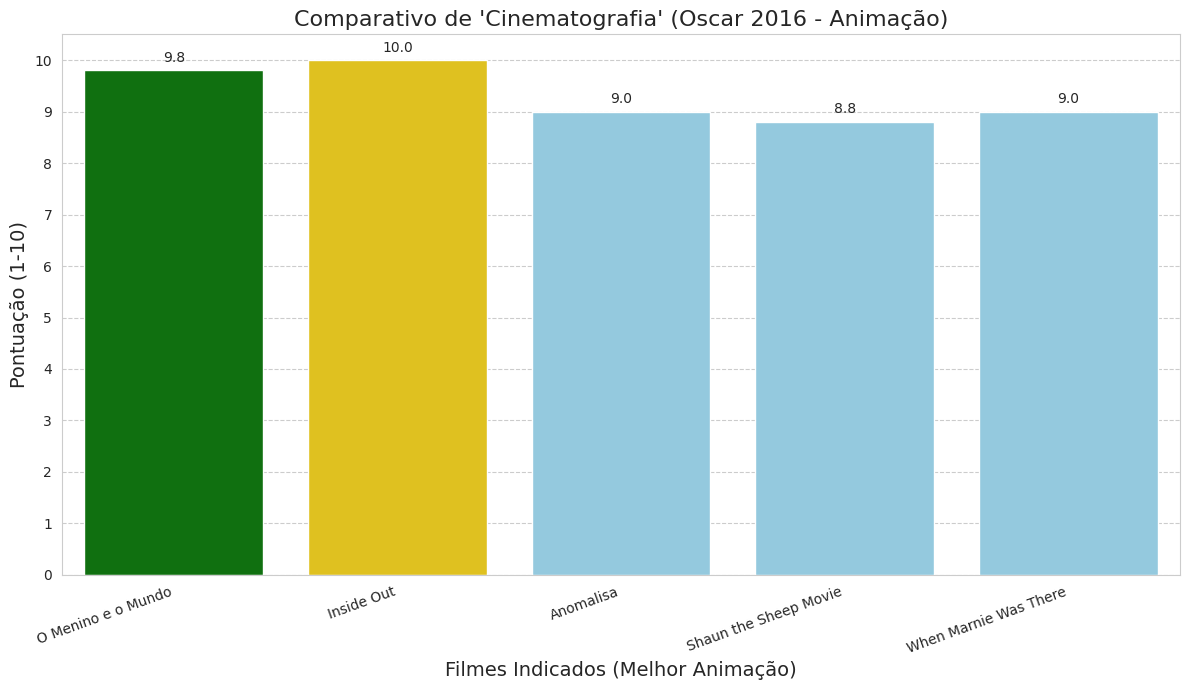


--- Gráfico para: Narrativa impact ---


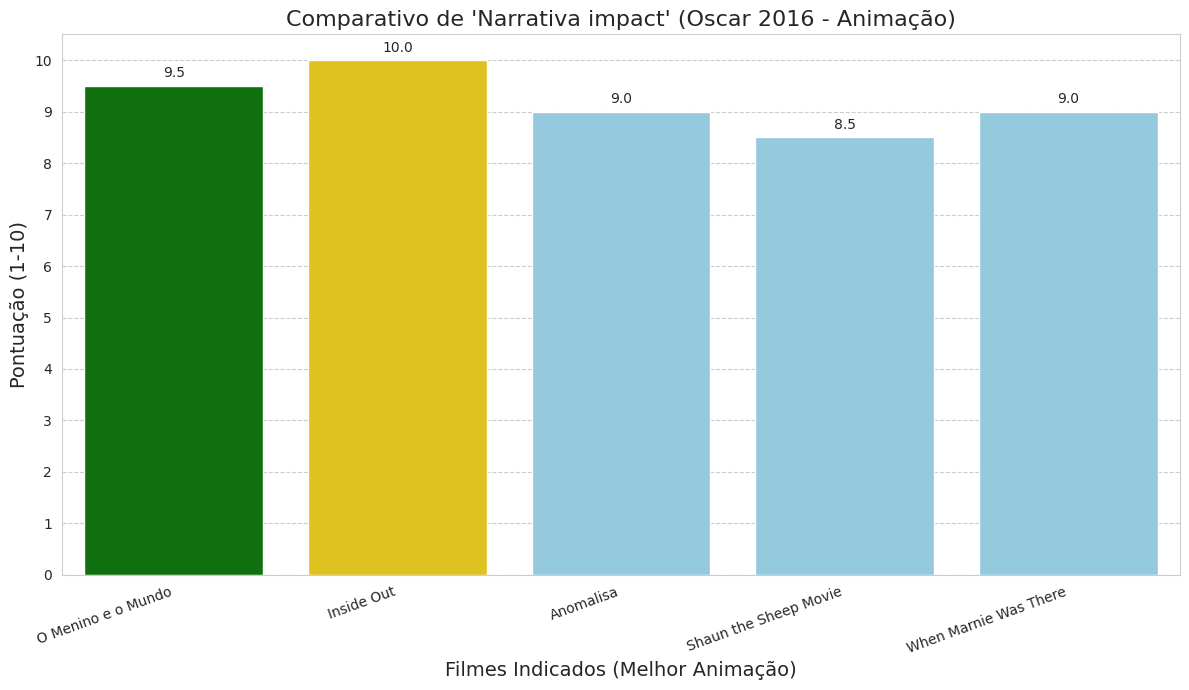


--- Gráfico para: Reconhe buzz ---


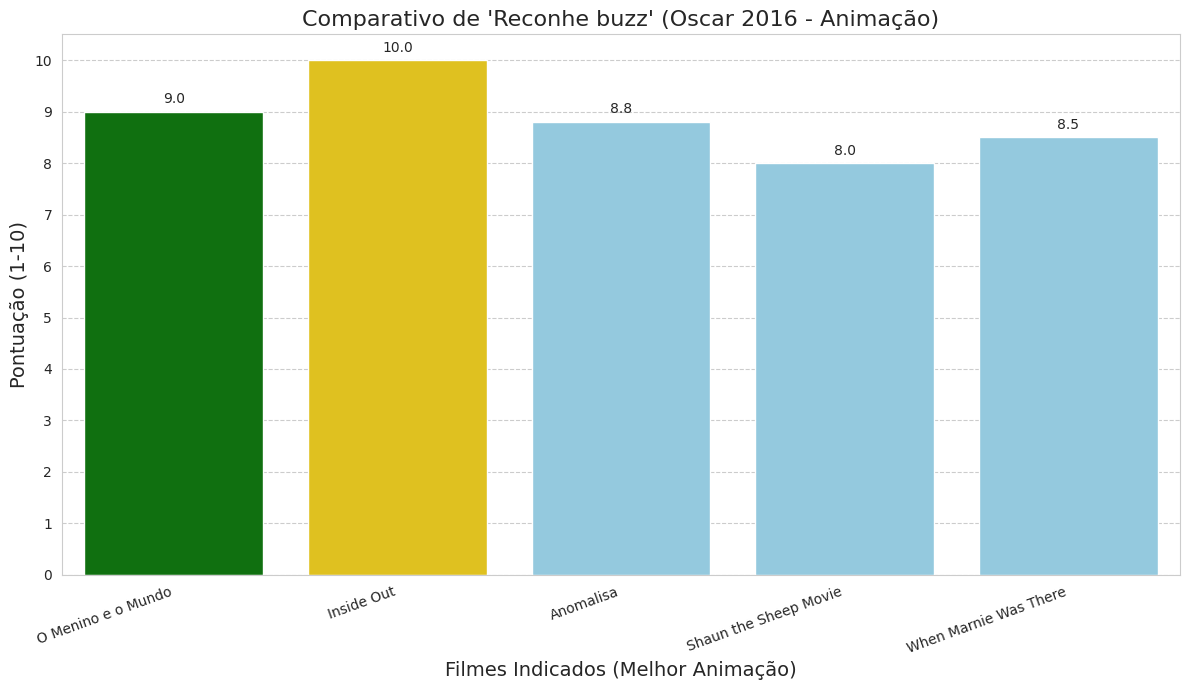


--- Gráfico para: Marketing ---


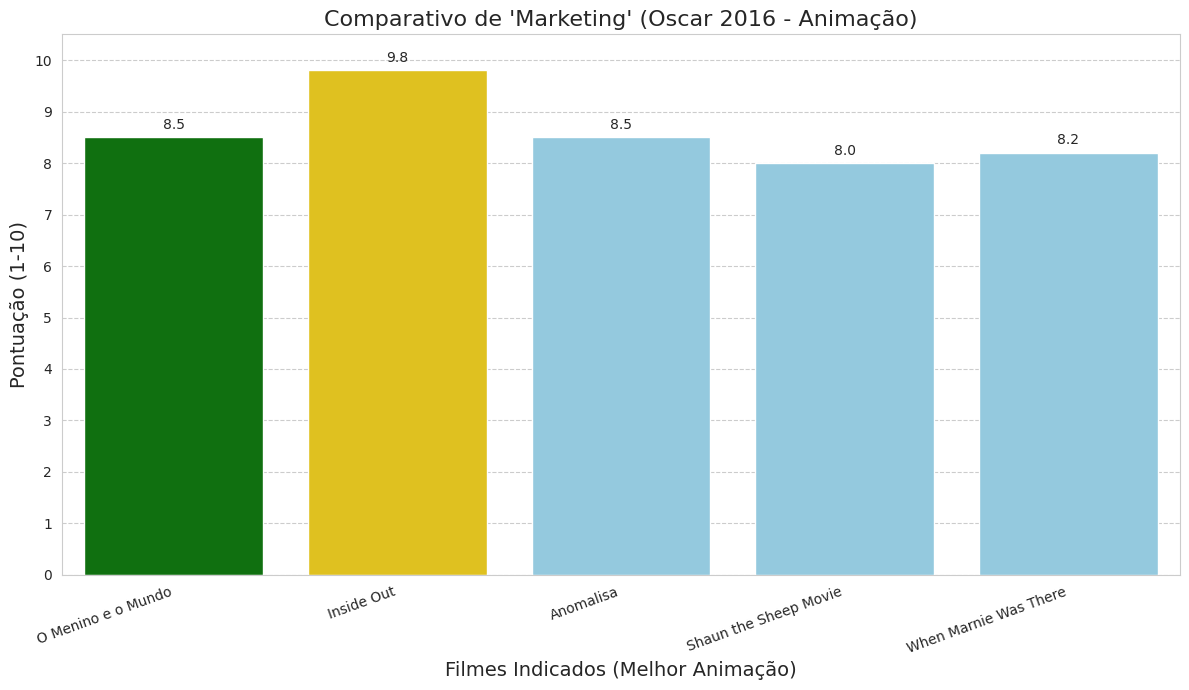


--- Gráfico para: Elegibilidade ---


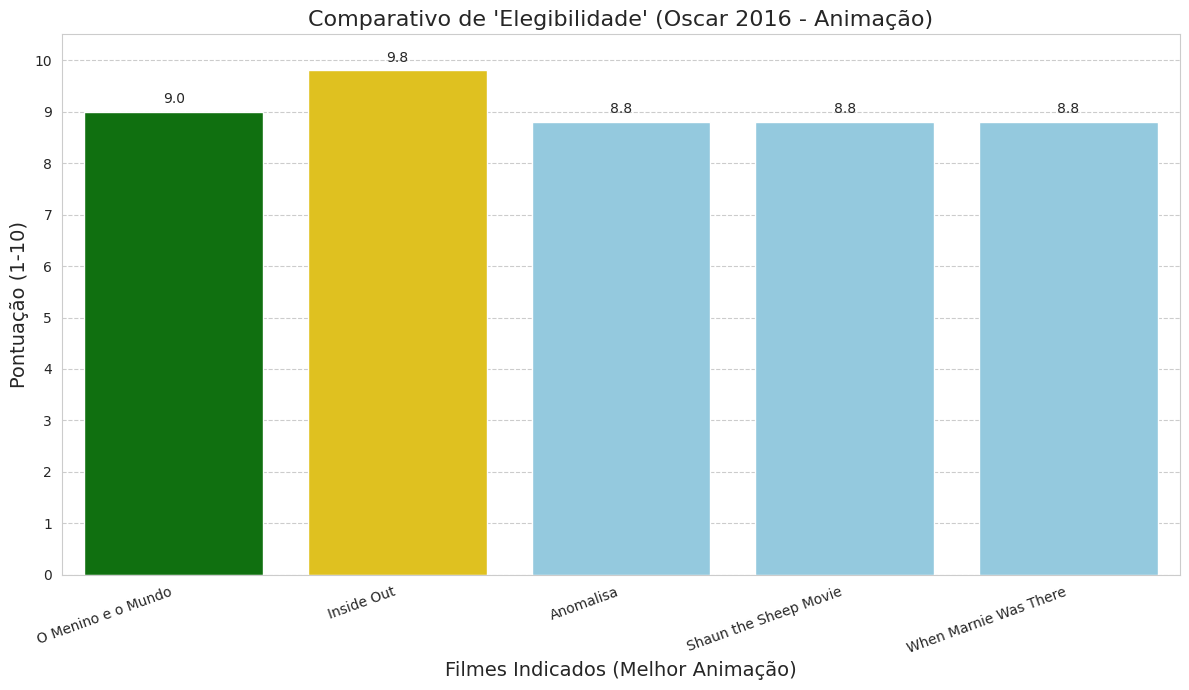


--- Gráfico para: Atuacao ---


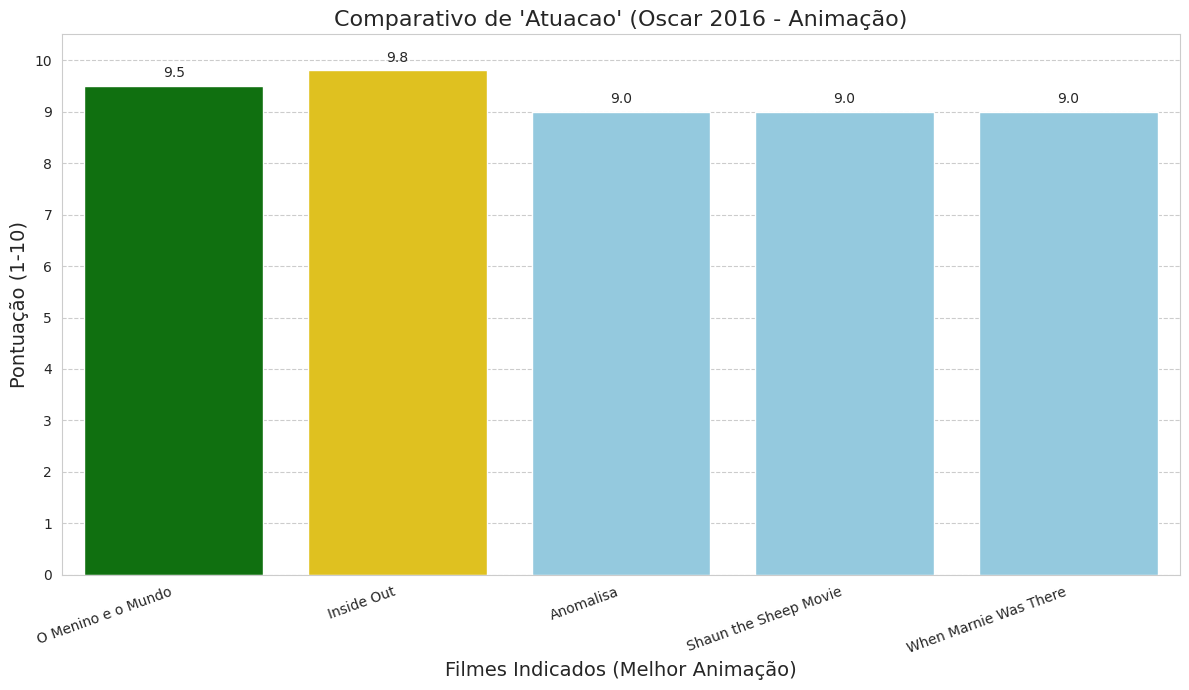


Legenda de cores dos gráficos:
🟩 Verde: O Menino e o Mundo
🌟 Dourado: Filme Vencedor da Categoria (Melhor Animação)
🟦 Azul Claro: Outros Concorrentes


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie # Certifique-se que já importou antes
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Oscar 2016 (Filmes de Animação de 2015) ---")
    print("Foco: O Menino e o Mundo e seus concorrentes")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    filmes_para_analise_2016_data = {
        'titulo_referencia': [
            "O Menino e o Mundo",
            "Inside Out", # Divertida Mente
            "Anomalisa",
            "Shaun the Sheep Movie", # Shaun, o Carneiro
            "When Marnie Was There"  # As Memórias de Marnie / Omoide no Marnie
        ],
        'id_tmdb': [223706, 150540, 291270, 263109, 242828],
        'pais_filme': ["Brasil", "EUA", "EUA", "Reino Unido/França", "Japão"], # Ajustar conforme TMDB se necessário
        'vencedor_categoria': [False, True, False, False, False] # Categoria: Melhor Animação
    }
    df_lista_filmes_2016 = pd.DataFrame(filmes_para_analise_2016_data)

    # Reutilizando a função de busca do TMDB
    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""):
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except:
                        pass
                # Para animações, 'production_countries' pode ser mais relevante que 'pais_filme' hardcoded
                paises_api = [country['iso_3166_1'] for country in getattr(detalhes, 'production_countries', [])]

                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento,
                    'paises_producao_api': paises_api
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0, 'paises_producao_api': []}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0, 'paises_producao_api': []}

    print("Buscando dados do TMDB para os filmes do Oscar 2016 (Animação)...")
    dados_tmdb_coletados_2016 = []
    for index, row in df_lista_filmes_2016.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        data['id_tmdb'] = row['id_tmdb'] # Garante o ID original
        data['pais_filme_ref'] = row['pais_filme'] # País de referência da nossa lista
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia']
        dados_tmdb_coletados_2016.append(data)
        time.sleep(0.3)

    df_tmdb_2016 = pd.DataFrame(dados_tmdb_coletados_2016)
    print("\nDados coletados do TMDB:")
    # Adicionando paises_producao_api para visualização
    print(df_tmdb_2016[['id_tmdb', 'titulo_tmdb', 'ano_lancamento_tmdb', 'pais_filme_ref', 'paises_producao_api']].head().to_string())


    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")
    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num' # 'atuacao_num' pode ser menos relevante para animação, mas manteremos
    ]
    colunas_metricas_cat_csv_originais = [
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True)
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int)

    ids_para_analise_2016 = df_lista_filmes_2016['id_tmdb'].tolist()

    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]
    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv

    df_metricas_csv_filtrado_2016 = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise_2016)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado_2016) < len(ids_para_analise_2016):
        ids_encontrados_csv_2016 = df_metricas_csv_filtrado_2016['id'].unique()
        ids_faltantes_2016 = [id_tmdb for id_tmdb in ids_para_analise_2016 if id_tmdb not in ids_encontrados_csv_2016]
        print(f"⚠️ Atenção: {len(ids_faltantes_2016)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes_2016}")

    print(f"\nMétricas do seu CSV para os filmes selecionados de 2016 (antes do merge):")
    cols_preview_csv = ['id', 'title'] + [col for col in colunas_num_reais_no_csv if col in df_metricas_csv_filtrado_2016.columns][:2]
    print(df_metricas_csv_filtrado_2016[cols_preview_csv].head().to_string())

    df_analise_2016 = pd.merge(
        df_tmdb_2016,
        df_metricas_csv_filtrado_2016,
        left_on='id_tmdb',
        right_on='id',
        how='left'
    )
    df_analise_2016.drop(columns=['id', 'title'], inplace=True, errors='ignore')

    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")
    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)): return "N/A"
        if score == 0: return "N/A"
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv:
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_2016.columns:
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_2016[col_categorica_nome] = df_analise_2016[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_2016 para categorização (pós-merge).")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA E GRÁFICOS
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA E GRÁFICOS - OSCAR 2016 (Melhor Animação) ---")

    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme_ref', 'paises_producao_api', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_2016.columns:
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_2016.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_2016.columns]

    if not df_analise_2016.empty:
        df_display_2016 = df_analise_2016[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display_2016.columns:
            df_display_2016['orcamento_tmdb'] = df_display_2016['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display_2016.columns:
            df_display_2016['receita_tmdb'] = df_display_2016['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display_2016.columns:
             df_display_2016['media_votos_tmdb'] = df_display_2016['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        def sort_order_2016(row):
            if row['id_tmdb'] == 223706: return 0 # O Menino e o Mundo
            if row['vencedor_categoria']: return 1
            return 2

        df_display_2016['ordem_sort'] = df_display_2016.apply(sort_order_2016, axis=1)
        df_display_sorted_2016 = df_display_2016.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print("\n--- Tabela Comparativa (Oscar 2016 - Melhor Animação) ---")
        print(df_display_sorted_2016.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Oscar 2016 - Melhor Animação) ---")
        menino_row = df_analise_2016[df_analise_2016['id_tmdb'] == 223706]
        vencedor_2016_row = df_analise_2016[df_analise_2016['vencedor_categoria'] == True]

        if not menino_row.empty:
            titulo_menino = menino_row['titulo_referencia'].iloc[0]
            print(f"\n🇧🇷 {titulo_menino} (Brasil):")
            print(f"   - Média de Votos TMDB: {menino_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in menino_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = menino_row[col_num].iloc[0]
                    valor_cat = menino_row[col_cat_gerada].iloc[0] if col_cat_gerada in menino_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if not vencedor_2016_row.empty:
            titulo_vencedor = vencedor_2016_row['titulo_referencia'].iloc[0]
            # Usar pais_filme_ref para o país de referência que definimos
            pais_vencedor = vencedor_2016_row['pais_filme_ref'].iloc[0]
            print(f"\n🏆 Vencedor: {titulo_vencedor} ({pais_vencedor}):")
            print(f"   - Média de Votos TMDB: {vencedor_2016_row['media_votos_tmdb'].iloc[0]:.1f}")
            for col_num in colunas_num_reais_no_csv:
                if col_num in vencedor_2016_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = vencedor_2016_row[col_num].iloc[0]
                    valor_cat = vencedor_2016_row[col_cat_gerada].iloc[0] if col_cat_gerada in vencedor_2016_row.columns else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num if pd.notna(valor_num) else 'N/A'} ({valor_cat})")

        if colunas_num_reais_no_csv:
            print("\n📊 Comparativo de Médias das Métricas Personalizadas (entre os filmes de Animação de 2016 no seu CSV):")
            df_com_metricas_csv_2016 = df_analise_2016.dropna(subset=colunas_num_reais_no_csv)
            if not df_com_metricas_csv_2016.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_csv_2016.columns:
                        scores_validos = df_com_metricas_csv_2016[pd.to_numeric(df_com_metricas_csv_2016[col_num], errors='coerce').fillna(0) > 0][col_num]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0)")
            else:
                print("   Não há filmes com todas as métricas do CSV preenchidas para calcular médias agregadas.")

        # --- GRÁFICOS COMPARATIVOS ---
        print("\n\n--- 📊 Gerando Gráficos Comparativos para Oscar 2016 (Melhor Animação) ---")
        if colunas_num_reais_no_csv:
            df_plot_2016 = df_analise_2016.copy()

            def criar_titulo_display_grafico_2016(row):
                titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
                # O ano já está no título de referência ou TMDB, não precisa adicionar de novo explicitamente aqui se já estiver lá
                # ano = row.get('ano_lancamento_tmdb', '')
                # return f"{titulo} ({ano if ano else 'N/A'})"
                return titulo # Usar o título de referência que já pode conter o ano ou ser mais claro

            df_plot_2016['titulo_display_grafico'] = df_plot_2016.apply(criar_titulo_display_grafico_2016, axis=1)

            id_menino_mundo = 223706
            id_vencedor_2016 = 150540 # Divertida Mente

            def get_sort_key_grafico_2016(row):
                if row['id_tmdb'] == id_menino_mundo: return 0
                if row['vencedor_categoria'] == True: return 1
                return 2
            df_plot_2016['sort_key_grafico'] = df_plot_2016.apply(get_sort_key_grafico_2016, axis=1)
            df_plot_sorted_2016_grafico = df_plot_2016.sort_values(by='sort_key_grafico')

            cores_barras_2016 = []
            for _, row_plot in df_plot_sorted_2016_grafico.iterrows():
                if row_plot['id_tmdb'] == id_menino_mundo:
                    cores_barras_2016.append('green')
                elif row_plot['vencedor_categoria'] == True:
                    cores_barras_2016.append('gold')
                else:
                    cores_barras_2016.append('skyblue')

            for metrica in colunas_num_reais_no_csv:
                # A métrica 'atuacao_num' pode ser menos relevante para animação, mas plotaremos se existir
                print(f"\n--- Gráfico para: {metrica.replace('_num', '').replace('_', ' ').capitalize()} ---")
                if metrica in df_plot_sorted_2016_grafico.columns and df_plot_sorted_2016_grafico[metrica].notna().any() and (df_plot_sorted_2016_grafico[metrica] > 0).any():
                    plt.figure(figsize=(12, 7))
                    barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted_2016_grafico,
                                          palette=cores_barras_2016, hue='titulo_display_grafico', dodge=False, legend=False)

                    plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Oscar 2016 - Animação)", fontsize=16)
                    plt.xlabel("Filmes Indicados (Melhor Animação)", fontsize=14)
                    plt.ylabel("Pontuação (1-10)", fontsize=14)
                    plt.xticks(rotation=20, ha="right", fontsize=10) # Rotação menor
                    plt.yticks(np.arange(0, 11, 1))
                    plt.ylim(0, 10.5)
                    plt.grid(axis='y', linestyle='--')

                    for p in barplot.patches:
                        if p.get_height() > 0:
                            barplot.annotate(format(p.get_height(), '.1f'),
                                           (p.get_x() + p.get_width() / 2., p.get_height()),
                                           ha = 'center', va = 'center',
                                           xytext = (0, 9),
                                           textcoords = 'offset points', fontsize=10)

                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"⚠️ A métrica '{metrica}' não possui dados válidos (>0) para plotagem ou não foi encontrada (pós-merge).")

            print("\nLegenda de cores dos gráficos:")
            print("🟩 Verde: O Menino e o Mundo")
            print("🌟 Dourado: Filme Vencedor da Categoria (Melhor Animação)")
            print("🟦 Azul Claro: Outros Concorrentes")
        else:
            print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada para gerar os gráficos.")
    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_2016 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")

### 👑(Oscar 2024)

--- Iniciando Análise Comparativa: Filmes de Destaque de 2024 (Foco: Ainda Estou Aqui - VENCEDOR!) ---

--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---
Buscando dados do TMDB para os filmes de 2024...
Buscando: Ainda Estou Aqui (ID: 1000837)
Buscando: The Girl With The Needle (ID: 1232827)
Buscando: Emilia Pérez (ID: 974950)
Buscando: The Seed of the Sacred Fig (ID: 1278263)
Buscando: Flow (ID: 823219)

Dados coletados do TMDB:
   id_tmdb                 titulo_tmdb  ano_lancamento_tmdb          pais_filme_ref
0  1000837            Ainda Estou Aqui                 2024                  Brasil
1  1232827          A Garota da Agulha                 2024               Dinamarca
2   974950                Emilia Pérez                 2024                  França
3  1278263  A Semente do Fruto Sagrado                 2024            Irã/Alemanha
4   823219                        Flow                 2024  Letônia/Bélgica/França


--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Data

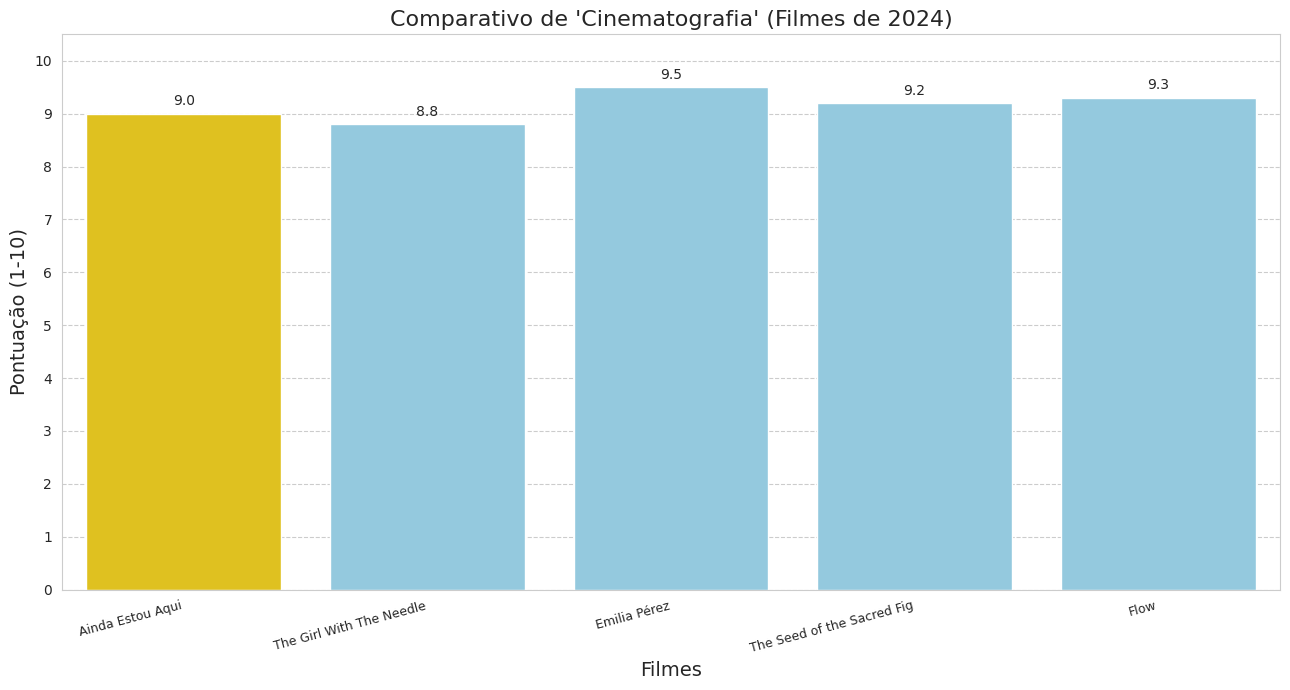


--- Gráfico para: Narrativa impact ---


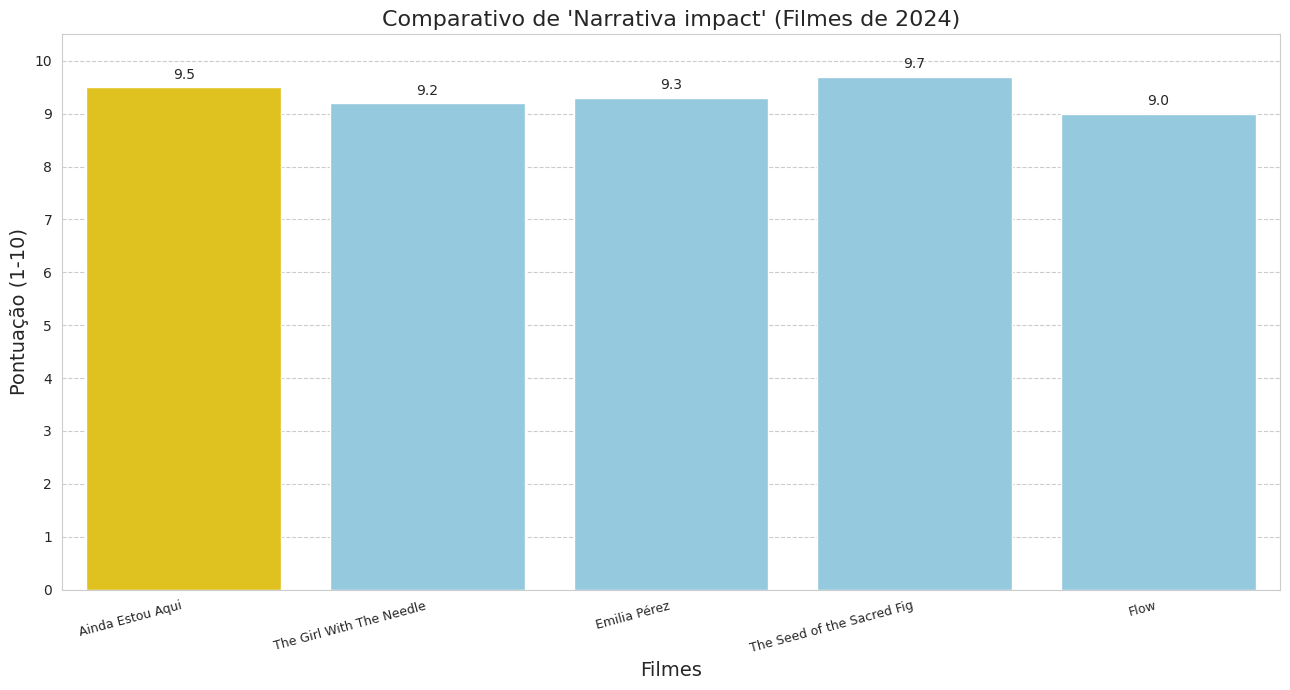


--- Gráfico para: Reconhe buzz ---


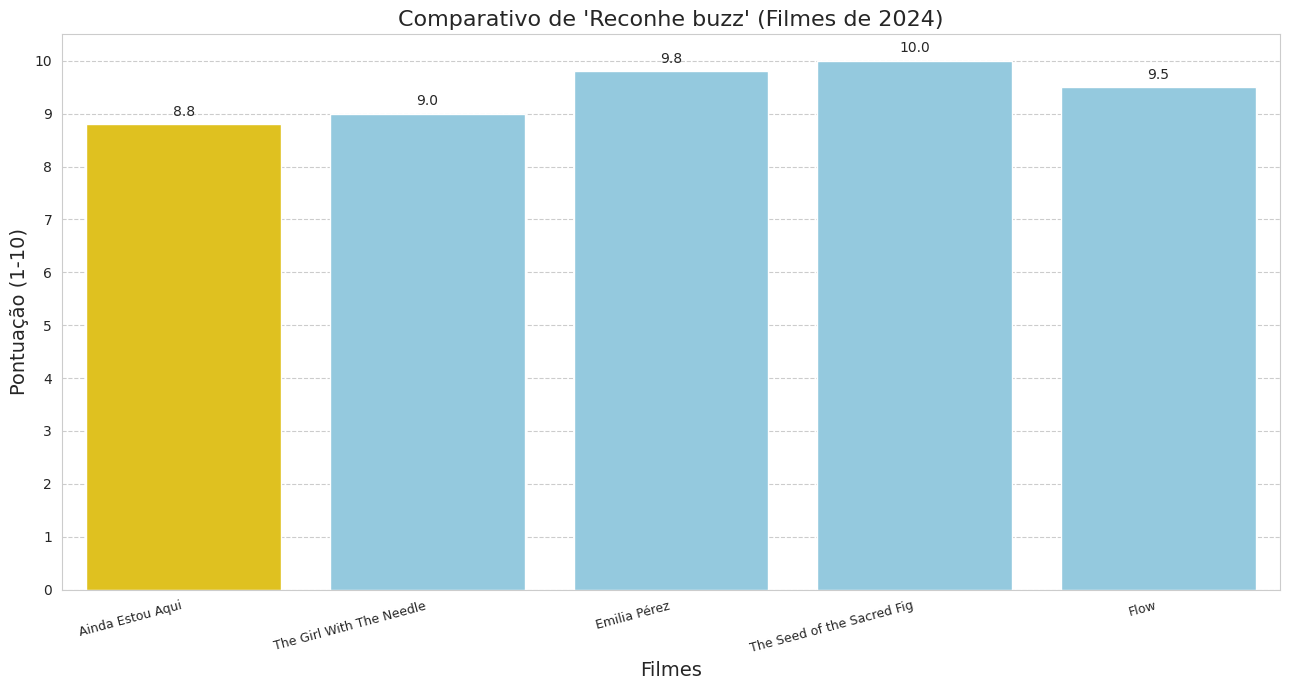


--- Gráfico para: Marketing ---


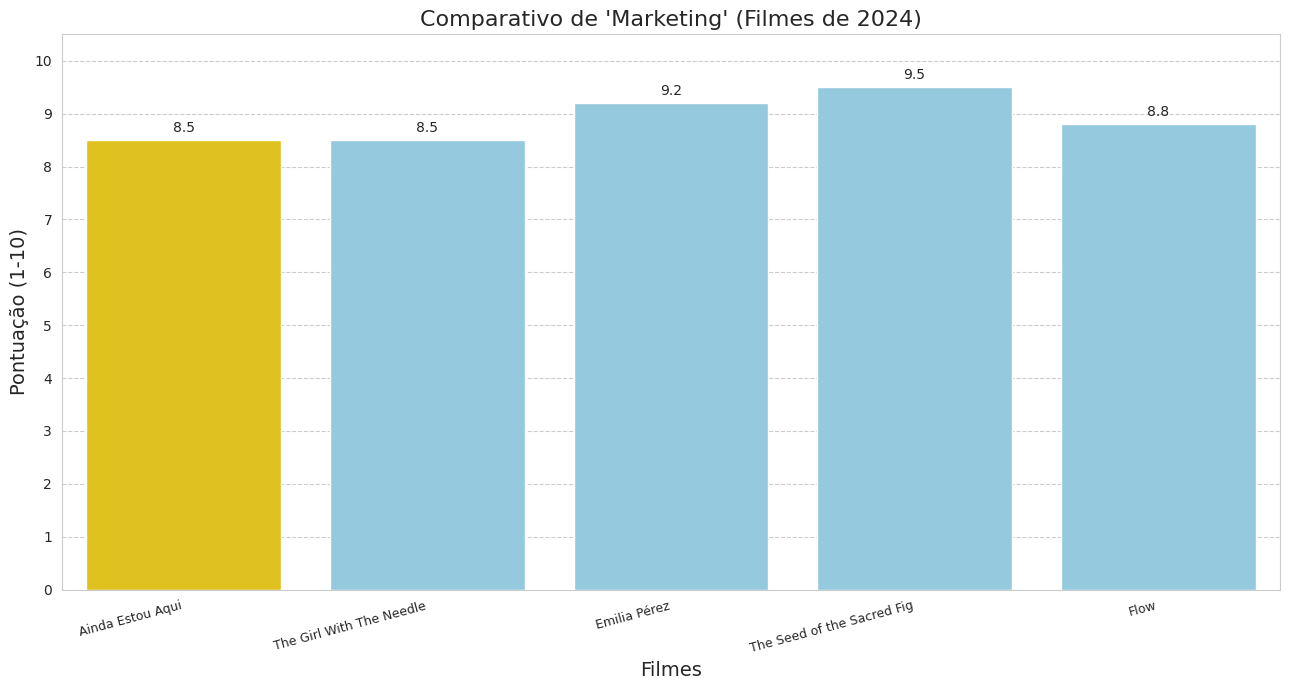


--- Gráfico para: Elegibilidade ---


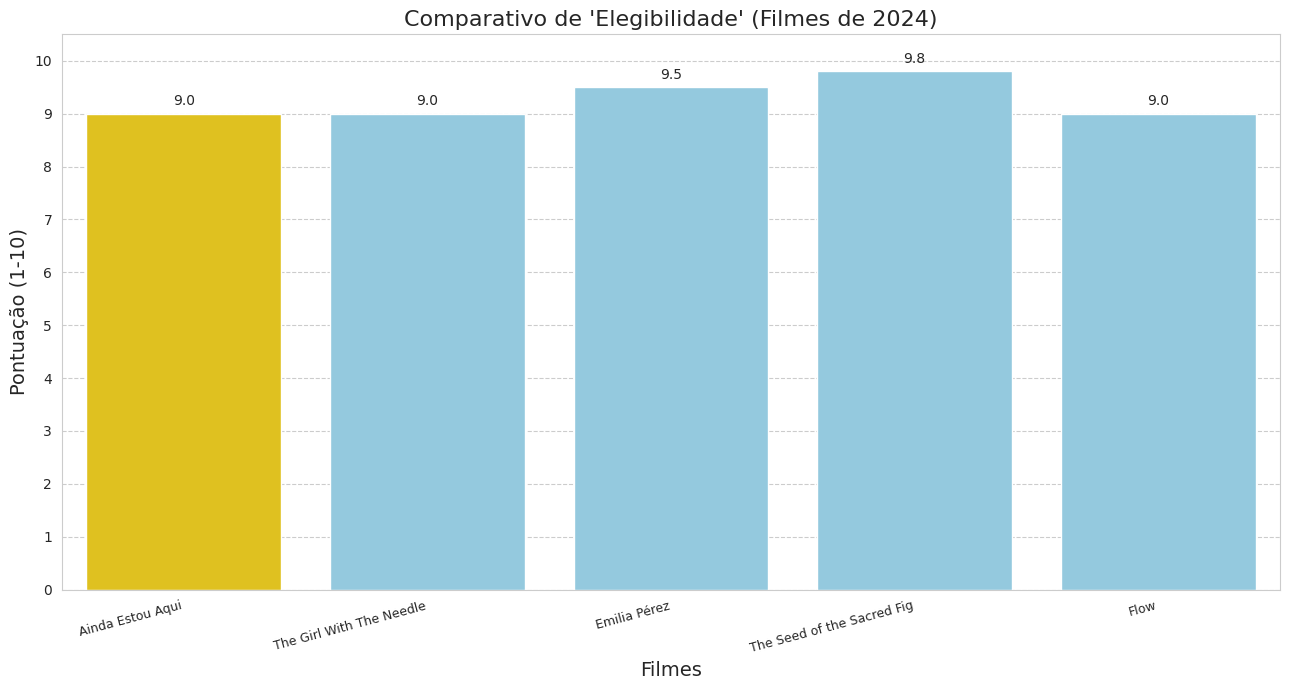


--- Gráfico para: Atuacao ---


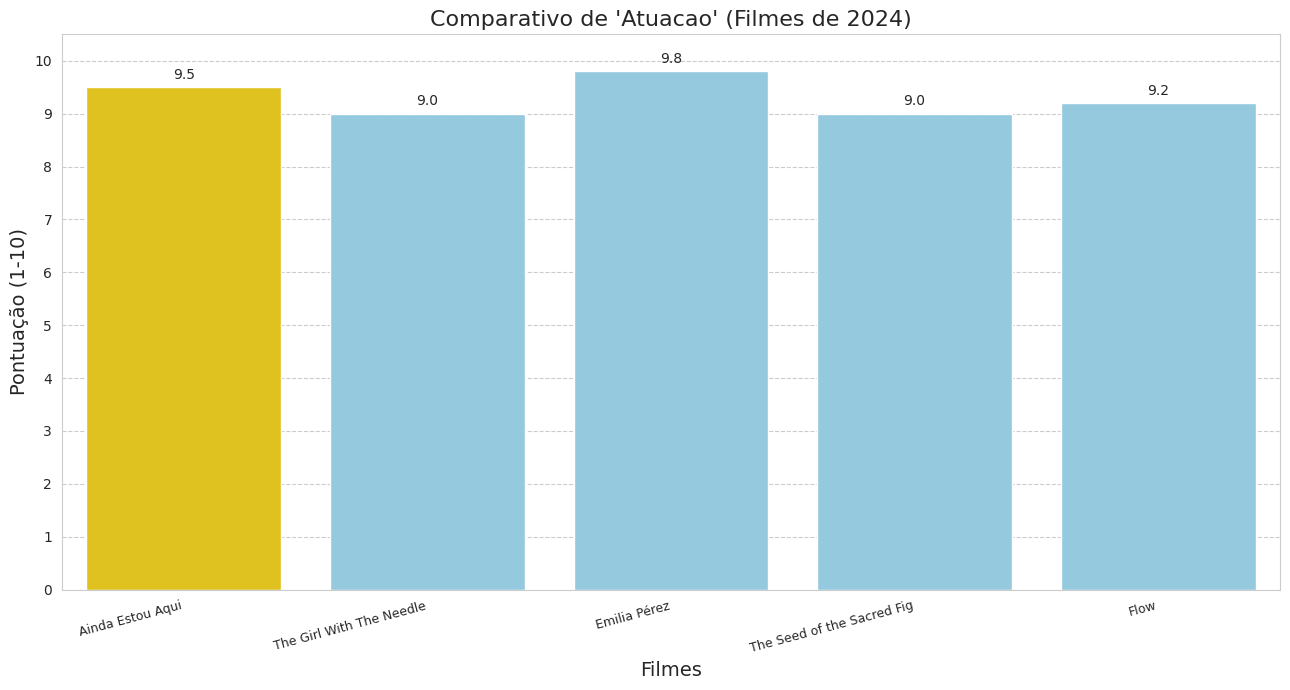


Legenda de cores dos gráficos:
🌟 Dourado: Ainda Estou Aqui (Vencedor do Grupo e Filme Brasileiro)
🟦 Azul Claro: Outros Filmes Comparados


In [ ]:
import pandas as pd
from tmdbv3api import TMDb, Movie # Certifique-se que já importou antes
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



if 'df_metricas_usuario_csv' in locals() and df_metricas_usuario_csv is not None:
    print("--- Iniciando Análise Comparativa: Filmes de Destaque de 2024 (Foco: Ainda Estou Aqui - VENCEDOR!) ---")

    # ==============================================================================
    # ETAPA 1: DEFINIR FILMES E BUSCAR DADOS DO TMDB
    # ==============================================================================
    print("\n--- ETAPA 1: DEFININDO FILMES E BUSCANDO DADOS DO TMDB ---")

    # AJUSTE FEITO AQUI: "Ainda Estou Aqui" é o vencedor.
    filmes_para_analise_2024_data = {
        'titulo_referencia': [
            "Ainda Estou Aqui",
            "The Girl With The Needle",
            "Emilia Pérez",
            "The Seed of the Sacred Fig",
            "Flow"
        ],
        'id_tmdb': [1000837, 1232827, 974950, 1278263, 823219],
        'pais_filme': ["Brasil", "Dinamarca", "França", "Irã/Alemanha", "Letônia/Bélgica/França"],
        'vencedor_categoria': [True, False, False, False, False] # "Ainda Estou Aqui" marcado como True
    }
    df_lista_filmes_2024 = pd.DataFrame(filmes_para_analise_2024_data)

    # Reutilizando a função de busca do TMDB
    def buscar_dados_tmdb_selecionados(id_filme_tmdb, titulo_ref=""):
        try:
            detalhes = movie_api.details(id_filme_tmdb)
            if detalhes:
                ano_lancamento = 0
                if hasattr(detalhes, 'release_date') and detalhes.release_date and isinstance(detalhes.release_date, str):
                    try:
                        ano_lancamento = int(detalhes.release_date.split('-')[0])
                    except:
                        pass
                paises_api = [country['iso_3166_1'] for country in getattr(detalhes, 'production_countries', [])]
                return {
                    'id_tmdb': detalhes.id,
                    'titulo_tmdb': detalhes.title,
                    'titulo_original_tmdb': detalhes.original_title,
                    'orcamento_tmdb': getattr(detalhes, 'budget', 0),
                    'receita_tmdb': getattr(detalhes, 'revenue', 0),
                    'media_votos_tmdb': getattr(detalhes, 'vote_average', 0),
                    'total_votos_tmdb': getattr(detalhes, 'vote_count', 0),
                    'popularidade_tmdb': getattr(detalhes, 'popularity', 0),
                    'generos_tmdb': [g['name'] for g in getattr(detalhes, 'genres', [])],
                    'ano_lancamento_tmdb': ano_lancamento,
                    'paises_producao_api': paises_api
                }
            else:
                print(f"⚠️ Nenhum detalhe retornado do TMDB para ID {id_filme_tmdb} ({titulo_ref})")
                return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_FALHA-{titulo_ref}", 'ano_lancamento_tmdb': 0, 'paises_producao_api': []}
        except Exception as e:
            print(f"🚨 Erro ao buscar ID {id_filme_tmdb} ({titulo_ref}) no TMDB: {e}")
            return {'id_tmdb': id_filme_tmdb, 'titulo_tmdb': f"TMDB_ERRO-{titulo_ref}", 'ano_lancamento_tmdb': 0, 'paises_producao_api': []}

    print("Buscando dados do TMDB para os filmes de 2024...")
    dados_tmdb_coletados_2024 = []
    for index, row in df_lista_filmes_2024.iterrows():
        print(f"Buscando: {row['titulo_referencia']} (ID: {row['id_tmdb']})")
        data = buscar_dados_tmdb_selecionados(row['id_tmdb'], row['titulo_referencia'])
        data['id_tmdb'] = row['id_tmdb']
        data['pais_filme_ref'] = row['pais_filme']
        data['vencedor_categoria'] = row['vencedor_categoria']
        data['titulo_referencia'] = row['titulo_referencia']
        dados_tmdb_coletados_2024.append(data)
        time.sleep(0.3)

    df_tmdb_2024 = pd.DataFrame(dados_tmdb_coletados_2024)
    print("\nDados coletados do TMDB:")
    print(df_tmdb_2024[['id_tmdb', 'titulo_tmdb', 'ano_lancamento_tmdb', 'pais_filme_ref']].head().to_string())

    # ==============================================================================
    # ETAPA 2: PREPARAR E INTEGRAR DADOS DO SEU CSV (Dataset_Oscar.csv)
    # ==============================================================================
    print("\n\n--- ETAPA 2: PREPARANDO E INTEGRANDO DADOS DO 'Dataset_Oscar.csv' ---")
    colunas_metricas_num_csv = [
        'cinematografia_num', 'narrativa_impact_num', 'reconhe_buzz_num',
        'marketing_num', 'elegibilidade_num', 'atuacao_num'
    ]
    colunas_metricas_cat_csv_originais = [
        'genero', 'cinematografia', 'narrativa_impact', 'reconhe_buzz',
        'marketing_visbilidade', 'elegibilidade_Timing', 'atuacao'
    ]

    df_metricas_usuario_csv_copia = df_metricas_usuario_csv.copy()
    df_metricas_usuario_csv_copia.dropna(subset=['id'], inplace=True)
    df_metricas_usuario_csv_copia['id'] = df_metricas_usuario_csv_copia['id'].astype(int)

    ids_para_analise_2024 = df_lista_filmes_2024['id_tmdb'].tolist()

    colunas_num_reais_no_csv = [col for col in colunas_metricas_num_csv if col in df_metricas_usuario_csv_copia.columns]
    colunas_cat_reais_no_csv = [col for col in colunas_metricas_cat_csv_originais if col in df_metricas_usuario_csv_copia.columns]
    colunas_para_selecionar_csv = ['id', 'title'] + colunas_num_reais_no_csv + colunas_cat_reais_no_csv

    df_metricas_csv_filtrado_2024 = df_metricas_usuario_csv_copia[df_metricas_usuario_csv_copia['id'].isin(ids_para_analise_2024)][colunas_para_selecionar_csv]

    if len(df_metricas_csv_filtrado_2024) < len(ids_para_analise_2024):
        ids_encontrados_csv_2024 = df_metricas_csv_filtrado_2024['id'].unique()
        ids_faltantes_2024 = [id_tmdb for id_tmdb in ids_para_analise_2024 if id_tmdb not in ids_encontrados_csv_2024]
        print(f"⚠️ Atenção: {len(ids_faltantes_2024)} filme(s) não encontrado(s) no 'Dataset_Oscar.csv' pela coluna 'id'.")
        print(f"   IDs não encontrados no CSV: {ids_faltantes_2024}")

    print(f"\nMétricas do seu CSV para os filmes selecionados de 2024 (antes do merge):")
    cols_preview_csv = ['id', 'title'] + [col for col in colunas_num_reais_no_csv if col in df_metricas_csv_filtrado_2024.columns][:2]
    print(df_metricas_csv_filtrado_2024[cols_preview_csv].head().to_string())

    df_analise_2024 = pd.merge(
        df_tmdb_2024,
        df_metricas_csv_filtrado_2024,
        left_on='id_tmdb',
        right_on='id',
        how='left'
    )
    df_analise_2024.drop(columns=['id', 'title'], inplace=True, errors='ignore')

    # ==============================================================================
    # ETAPA 3: CATEGORIZAR MÉTRICAS NUMÉRICAS (1-10) DO SEU CSV
    # ==============================================================================
    print("\n\n--- ETAPA 3: CATEGORIZANDO SUAS MÉTRICAS NUMÉRICAS (1-10) ---")
    def categorizar_score(score):
        if pd.isna(score) or not isinstance(score, (int, float, np.number)): return "N/A"
        if score == 0: return "N/A"
        elif score <= 2: return "1. Muito Ruim 😱"
        elif score <= 4: return "2. Ruim 🙁"
        elif score <= 6: return "3. Regular 😐"
        elif score <= 8: return "4. Bom 😊"
        elif score <= 10: return "5. Excelente 🌟"
        else: return "Score Inválido"

    if colunas_num_reais_no_csv:
        for metrica_num_col in colunas_num_reais_no_csv:
            if metrica_num_col in df_analise_2024.columns:
                col_categorica_nome = metrica_num_col.replace('_num', '_cat_gerada')
                df_analise_2024[col_categorica_nome] = df_analise_2024[metrica_num_col].apply(categorizar_score)
                print(f"   Coluna categórica '{col_categorica_nome}' criada para '{metrica_num_col}'.")
            else:
                 print(f"   Aviso: Coluna '{metrica_num_col}' não encontrada em df_analise_2024 para categorização (pós-merge).")

    # ==============================================================================
    # ETAPA 4: EXIBIR TABELA COMPARATIVA E GRÁFICOS
    # ==============================================================================
    print("\n\n--- ETAPA 4: TABELA COMPARATIVA E GRÁFICOS - FILMES DE 2024 ---")

    colunas_para_exibir = ['id_tmdb', 'titulo_tmdb', 'titulo_referencia', 'pais_filme_ref', 'vencedor_categoria',
                           'ano_lancamento_tmdb', 'orcamento_tmdb', 'receita_tmdb', 'media_votos_tmdb']

    if colunas_num_reais_no_csv:
        for col_num in colunas_num_reais_no_csv:
            if col_num in df_analise_2024.columns:
                colunas_para_exibir.append(col_num)
                col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                if col_cat_gerada in df_analise_2024.columns:
                    colunas_para_exibir.append(col_cat_gerada)

    colunas_para_exibir_finais = [col for col in colunas_para_exibir if col in df_analise_2024.columns]

    if not df_analise_2024.empty:
        df_display_2024 = df_analise_2024[colunas_para_exibir_finais].copy()

        if 'orcamento_tmdb' in df_display_2024.columns:
            df_display_2024['orcamento_tmdb'] = df_display_2024['orcamento_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'receita_tmdb' in df_display_2024.columns:
            df_display_2024['receita_tmdb'] = df_display_2024['receita_tmdb'].apply(lambda x: f"{x:,.0f}" if x > 0 else "N/D")
        if 'media_votos_tmdb' in df_display_2024.columns:
             df_display_2024['media_votos_tmdb'] = df_display_2024['media_votos_tmdb'].apply(lambda x: f"{x:.1f}" if pd.notna(x) and x > 0 else "N/A")

        def sort_order_2024(row):
            if row['id_tmdb'] == 1000837: return 0 # Ainda Estou Aqui
            # Se "Ainda Estou Aqui" é o vencedor, ele já será o primeiro.
            # Se outro filme fosse o vencedor E NÃO FOSSE o filme brasileiro, esta linha seria útil:
            # elif row['vencedor_categoria']: return 1
            return 2 # Outros filmes

        df_display_2024['ordem_sort'] = df_display_2024.apply(sort_order_2024, axis=1)
        # Se o filme brasileiro é o vencedor, a segunda condição de sort não é estritamente necessária para 'vencedor_categoria'
        # mas mantê-la não prejudica e seria útil se o vencedor fosse outro.
        df_display_sorted_2024 = df_display_2024.sort_values(by=['ordem_sort', 'titulo_tmdb']).drop(columns=['ordem_sort'])

        print("\n--- Tabela Comparativa (Filmes de 2024) ---")
        print(df_display_sorted_2024.to_string(index=False))

        print("\n\n--- Análise Descritiva Rápida (Filmes de 2024) ---")
        ainda_aqui_row = df_analise_2024[df_analise_2024['id_tmdb'] == 1000837]

        # Como "Ainda Estou Aqui" é o vencedor, a lógica de "vencedor_2024_row" pegaria o mesmo filme.
        # Vamos focar em "Ainda Estou Aqui" e depois na média dos outros.

        if not ainda_aqui_row.empty:
            titulo_ainda_aqui = ainda_aqui_row['titulo_referencia'].iloc[0]
            print(f"\n🇧🇷🏆 {titulo_ainda_aqui} (Brasil - VENCEDOR DO GRUPO):") # Adicionado emoji de troféu

            media_votos_val = ainda_aqui_row['media_votos_tmdb'].iloc[0]
            media_votos_disp = f"{media_votos_val:.1f}" if pd.notna(media_votos_val) and isinstance(media_votos_val, (float, int)) else "N/A"
            print(f"   - Média de Votos TMDB: {media_votos_disp}")

            for col_num in colunas_num_reais_no_csv:
                if col_num in ainda_aqui_row.columns:
                    col_cat_gerada = col_num.replace('_num', '_cat_gerada')
                    valor_num = ainda_aqui_row[col_num].iloc[0]
                    valor_cat = ainda_aqui_row[col_cat_gerada].iloc[0] if col_cat_gerada in ainda_aqui_row.columns else "N/A"

                    valor_num_disp = f"{valor_num:.1f}" if pd.notna(valor_num) and isinstance(valor_num, (float, int)) else "N/A"
                    print(f"   - {col_num.replace('_num', '').capitalize()}: {valor_num_disp} ({valor_cat})")

        # Análise dos outros concorrentes
        outros_concorrentes_2024 = df_analise_2024[df_analise_2024['id_tmdb'] != 1000837]
        if not outros_concorrentes_2024.empty and colunas_num_reais_no_csv:
            print("\n🌍 Médias das Métricas Personalizadas (Outros Concorrentes de 2024 no seu CSV):")
            df_com_metricas_outros = outros_concorrentes_2024.dropna(subset=colunas_num_reais_no_csv)
            if not df_com_metricas_outros.empty:
                for col_num in colunas_num_reais_no_csv:
                    if col_num in df_com_metricas_outros.columns:
                        scores_numeric = pd.to_numeric(df_com_metricas_outros[col_num], errors='coerce')
                        scores_validos = scores_numeric[scores_numeric > 0]
                        if not scores_validos.empty:
                            media_metrica = scores_validos.mean()
                            print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': {media_metrica:.2f} (escala 1-10)")
                        else:
                             print(f"  - Média para '{col_num.replace('_num', '').capitalize()}': N/A (sem scores > 0 nos concorrentes)")
            else:
                print("   Não há outros concorrentes com todas as métricas do CSV preenchidas para calcular médias agregadas.")


        # --- GRÁFICOS COMPARATIVOS ---
        print("\n\n--- 📊 Gerando Gráficos Comparativos para Filmes de 2024 ---")
        if colunas_num_reais_no_csv:
            df_plot_2024 = df_analise_2024.copy()

            def criar_titulo_display_grafico_2024(row):
                titulo = row.get('titulo_referencia', row.get('titulo_tmdb', 'Título Desconhecido'))
                return titulo

            df_plot_2024['titulo_display_grafico'] = df_plot_2024.apply(criar_titulo_display_grafico_2024, axis=1)

            id_ainda_aqui = 1000837

            def get_sort_key_grafico_2024(row):
                if row['id_tmdb'] == id_ainda_aqui: return 0 # Filme brasileiro/vencedor primeiro
                # Como Ainda Estou Aqui é o vencedor, não precisamos de outra condição para vencedor_categoria aqui para ordenação
                return 1 # Outros filmes
            df_plot_2024['sort_key_grafico'] = df_plot_2024.apply(get_sort_key_grafico_2024, axis=1)
            df_plot_sorted_2024_grafico = df_plot_2024.sort_values(by='sort_key_grafico')

            cores_barras_2024 = []
            for _, row_plot in df_plot_sorted_2024_grafico.iterrows():
                if row_plot['id_tmdb'] == id_ainda_aqui: # Como é o vencedor e o brasileiro
                    cores_barras_2024.append('gold') # Dourado para o vencedor (que é o brasileiro)
                # Não haverá outro vencedor, então os demais são concorrentes
                else:
                    cores_barras_2024.append('skyblue')


            for metrica in colunas_num_reais_no_csv:
                print(f"\n--- Gráfico para: {metrica.replace('_num', '').replace('_', ' ').capitalize()} ---")
                if metrica in df_plot_sorted_2024_grafico.columns and \
                   df_plot_sorted_2024_grafico[metrica].notna().any() and \
                   (pd.to_numeric(df_plot_sorted_2024_grafico[metrica], errors='coerce').fillna(0) > 0).any():

                    plt.figure(figsize=(13, 7))
                    barplot = sns.barplot(x='titulo_display_grafico', y=metrica, data=df_plot_sorted_2024_grafico,
                                          palette=cores_barras_2024, hue='titulo_display_grafico', dodge=False, legend=False)

                    plt.title(f"Comparativo de '{metrica.replace('_num', '').replace('_', ' ').capitalize()}' (Filmes de 2024)", fontsize=16)
                    plt.xlabel("Filmes", fontsize=14)
                    plt.ylabel("Pontuação (1-10)", fontsize=14)
                    plt.xticks(rotation=15, ha="right", fontsize=9)
                    plt.yticks(np.arange(0, 11, 1))
                    plt.ylim(0, 10.5)
                    plt.grid(axis='y', linestyle='--')

                    for p in barplot.patches:
                        altura_barra = p.get_height()
                        if pd.notna(altura_barra) and altura_barra > 0:
                            barplot.annotate(format(altura_barra, '.1f'),
                                           (p.get_x() + p.get_width() / 2., altura_barra),
                                           ha = 'center', va = 'center',
                                           xytext = (0, 9),
                                           textcoords = 'offset points', fontsize=10)

                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"⚠️ A métrica '{metrica}' não possui dados válidos (>0 ou não-NaN) para plotagem ou não foi encontrada (pós-merge).")

            print("\nLegenda de cores dos gráficos:")
            print("🌟 Dourado: Ainda Estou Aqui (Vencedor do Grupo e Filme Brasileiro)")
            print("🟦 Azul Claro: Outros Filmes Comparados")
        else:
            print("ℹ️ Nenhuma métrica numérica personalizada foi encontrada para gerar os gráficos.")
    else:
        print("🚨 Análise final não pôde ser gerada pois o DataFrame df_analise_2024 está vazio ou não foi criado corretamente.")
else:
    print("🚨 DataFrame 'df_metricas_usuario_csv' (Dataset_Oscar.csv) não foi carregado ou está vazio.")

# Considerações Finais

Porque Filmes Brasileiros não ganham tanto Oscar?
Vamos ver alguns exemplos que mostram o potencial do nosso cinema:

Exemplos de Excelência Brasileira
"O Pagador de Promessas" (1963): Esse filme recebeu avaliações incríveis, mostrando um nível altíssimo de qualidade. A média de votos dele foi maior que a do filme que ganhou o Oscar na época, "Les dimanches de Ville d'Avray", que teve notas um pouco menores em cinematografia (8.5) e narrativa (8.8) na nossa avaliação. Isso indica que, em termos de impacto e reconhecimento inicial (ele ganhou a Palma de Ouro!), a produção brasileira tinha muita força e competência.

"Central do Brasil" (1999): As notas desse filme ficaram bem próximas da perfeição, quase empatando com o vencedor "La vita è bella". A pequena diferença na métrica "Elegibilidade" (9.5 contra 10.0 do vencedor) pode ter sido um fator sutil, mas decisivo, por causa das regras da premiação.

"O Menino e o Mundo" (2016): Mais uma vez, tivemos um desempenho excelente (Cinematografia 9.8, Impacto Narrativo 9.5), mesmo competindo com um gigante como "Divertida Mente", que teve um desempenho impecável em todas as áreas e um investimento gigantesco em marketing.

De modo geral, as médias das métricas que definimos no Dataset Adicional para os filmes brasileiros indicados estão sempre na categoria "Excelente". Isso prova que o Brasil envia para o Oscar obras de reconhecido valor artístico e técnico. No entanto, existem algumas nuances que criam uma barreira para a vitória.

A Competição Internacional é Pesada
É importante lembrar que nossos filmes competem com produções de peso:

"La vita è bella" (1999): Além de ser um filme de altíssima qualidade, ele virou um fenômeno cultural e arrecadou uma bilheteria expressiva (US$ 230 milhões). E o orçamento dele era bem maior (US$ 20 milhões) do que o de "Central do Brasil" (US$ 2.9 milhões). Esse impacto massivo provavelmente influenciou os votantes.

"Divertida Mente" (2016): Sendo um produto da Disney, ele teve um orçamento astronômico (US$ 175 milhões) e uma estrutura de marketing global que gerou muita repercussão e receita.

"Karakter" (1998): Este filme superou "O Que É Isso, Companheiro?" em quase todas as métricas do nosso dataset adicional e ainda teve um orçamento maior, o que ampliou suas possibilidades internacionais.

Marketing, "Buzz" e Visibilidade no Cenário Global
As campanhas de divulgação fazem toda a diferença:

Métricas de Marketing
Embora os filmes brasileiros tenham pontuações favoráveis em marketing na nossa análise ("O Pagador de Promessas" - 8.5; "Central do Brasil" - 9.5), a verdade é que o tamanho e o alcance dessas campanhas geralmente não se comparam aos de grandes estúdios ou produções europeias que contam com um forte apoio institucional e distribuição internacional. A descrição de "O Quatrilho" (1996) ressalta que, "Embora modesta para os padrões de grandes estúdios, essa campanha foi crucial," o que ilustra bem esse desafio.

Orçamento e Receita (TMDB)
Os dados de orçamento e receita, quando disponíveis, mostram uma clara diferença. Filmes com mais investimento conseguem bancar campanhas de marketing mais agressivas e ter uma maior penetração no mercado norte-americano, o que é crucial para o Oscar.

Critérios de Elegibilidade e o Momento Certo
As métricas de "Elegibilidade" para os filmes brasileiros indicados são sempre altas, o que indica que eles cumprem os requisitos formais e, muitas vezes, estão alinhados com os temas e estilos que a Academia valoriza em períodos específicos.

Conclusão e Solução
Em resumo, as produções brasileiras que são indicadas ao Oscar mostram, de forma crescente, muita excelência artística e técnica, conforme nossas pesquisas e dados coletados. No entanto, o principal obstáculo para a vitória final parece estar menos na qualidade intrínseca das obras e mais em uma combinação de fatores:

Concorrência internacional acirrada: Os filmes que ganham, muitas vezes, são verdadeiras obras-primas ou fenômenos culturais de alcance global.

Diferença nos Recursos de Marketing e Distribuição: Filmes com orçamentos gigantescos e o apoio de grandes distribuidoras conseguem fazer campanhas de "For Your Consideration" muito mais robustas, ganhando uma visibilidade maior entre os votantes da Academia.

Repercussão em Larga Escala: Ser reconhecido em festivais é fundamental, mas o "buzz" gerado por um sucesso de bilheteria nos EUA ou uma campanha de marketing de grande impacto pode ser decisivo.

Sintonia com as Sensibilidades da Academia: A votação é subjetiva e favorece filmes que, por diversos motivos (temáticos, narrativos, emocionais), criam uma conexão mais profunda com a maioria dos votantes em um determinado ano.

A própria indicação já é um reconhecimento muito significativo do valor do cinema brasileiro. Para conseguir a vitória, além de manter a excelência artística, parece ser necessário um esforço estratégico conjunto e, talvez, algumas circunstâncias favoráveis para superar as barreiras de marketing, distribuição e a força dos concorrentes globais no contexto específico de cada edição da premiação.